### 00_check.ipynb
목적:
- Kaggle KBO 시즌 단위 타자/투수 데이터 로드
- 컬럼/결측치/기간 필터링(최신 5개년) 등 "분석 전 기본 점검" 수행
- 분석 파일(09_..._CodeArchive)로 넘어가기 전 데이터 상태를 확인하는 스모크 테스트 노트북

In [2]:
import pandas as pd

In [4]:
# 각각 season별 데이터 불러오기
bat = pd.read_csv('../data/raw/kbo_batting_stats_by_season_1982-2025.csv')
pitch = pd.read_csv('../data/raw/kbo_pitching_stats_by_season_1982-2025.csv')

# 로드 확인(행/열 개수)
print("bat shape:", bat.shape)
print("pitch shape:", pitch.shape)

bat shape: (9731, 39)
pitch shape: (7727, 42)


In [5]:
# 컬럼 개수/이름 일부만 확인 (전체 출력은 길어서 생략)
print("bat columns count:", len(bat.columns))
print("pitch columns count:", len(pitch.columns))

bat.columns[:10], pitch.columns[:10]

bat columns count: 39
pitch columns count: 42


(Index(['Id', 'Name', 'Birthdate', 'Handedness', 'School', 'Draft', 'Year',
        'Team', 'Age', 'Pos.'],
       dtype='object'),
 Index(['Id', 'Name', 'Birthdate', 'Handedness', 'School', 'Draft', 'Year',
        'Team', 'Age', 'Pos.'],
       dtype='object'))

In [6]:
# 데이터 샘플 확인 (상위 5행)
bat.head()

Id Name      Birthdate Handedness       School        Draft  Year Team  \
0  1001  구천서  1963년 08월 15일       우투우타  옥산초-경운중-신일고  82 OB 창단 멤버  1982   OB   
1  1001  구천서  1963년 08월 15일       우투우타  옥산초-경운중-신일고  82 OB 창단 멤버  1983   OB   
2  1001  구천서  1963년 08월 15일       우투우타  옥산초-경운중-신일고  82 OB 창단 멤버  1984   OB   
3  1001  구천서  1963년 08월 15일       우투우타  옥산초-경운중-신일고  82 OB 창단 멤버  1985   OB   
4  1001  구천서  1963년 08월 15일       우투우타  옥산초-경운중-신일고  82 OB 창단 멤버  1986   OB   

   Age Pos.  ...  GDP  SH  SF    AVG    OBP    SLG    OPS  R/ePA   wRC+   WAR  
0   19   2B  ...    3   7   0  0.308  0.405  0.421  0.826  0.035  138.9  2.95  
1   20   2B  ...    5  13   2  0.279  0.360  0.406  0.766  0.017  122.9  1.93  
2   21   2B  ...    6   8   3  0.229  0.324  0.279  0.603 -0.023   79.6  0.89  
3   22   2B  ...    3  10   2  0.235  0.354  0.292  0.646 -0.014   88.3  1.72  
4   23   2B  ...    0   1   3  0.205  0.301  0.282  0.583 -0.038   63.1  0.22  

[5 rows x 39 columns]

In [7]:
pitch.head()

Id Name      Birthdate Handedness            School        Draft  Year  \
0  1038  박영진  1958년 07월 27일       우투우타         대구상고-성균관대  82 삼성 창단 멤버  1982   
1  1038  박영진  1958년 07월 27일       우투우타         대구상고-성균관대  82 삼성 창단 멤버  1984   
2  1057  김동철  1960년 06월 05일       우투우타               동산고  82 삼미 창단 멤버  1982   
3  1059  김용남  1958년 02월 26일       우투우타  군산초-군산중-군산상고-한양대  82 해태 창단 멤버  1982   
4  1059  김용남  1958년 02월 26일       우투우타  군산초-군산중-군산상고-한양대  82 해태 창단 멤버  1983   

  Team  Age Pos.  ...  SO  ROE  BK  WP    ERA    RA9   rRA9   FIP  WHIP   WAR  
0   삼성   24    P  ...   3  NaN   1   0   8.64   9.72   9.72  6.51  2.40 -0.17  
1   삼성   26    P  ...   0  NaN   0   0  18.00  18.00  18.00  2.43  4.00 -0.06  
2   삼미   22    P  ...  19  NaN   1   2   7.06   8.13   8.13  6.04  1.90 -1.33  
3   해태   24    P  ...  85  NaN   0   4   3.09   4.27   4.27  3.17  1.25  3.34  
4   해태   25    P  ...  80  NaN   0   1   2.83   3.33   3.33  2.56  1.11  4.58  

[5 rows x 42 columns]

In [8]:
# Team/Year 조합이 어떤 형태로 존재하는지 확인
bat[['Team', 'Year']].drop_duplicates().head()

Team  Year
0   OB  1982
1   OB  1983
2   OB  1984
3   OB  1985
4   OB  1986

In [9]:
pitch[['Team', 'Year']].drop_duplicates().head()

Team  Year
0   삼성  1982
1   삼성  1984
2   삼미  1982
3   해태  1982
4   해태  1983

In [11]:
# 결측치 상위 항목 확인
bat.isna().sum().sort_values(ascending=False).head(10)

Draft         35
OPS           15
SLG           15
AVG           15
Handedness     1
Id             0
SO             0
SB             0
CS             0
BB             0
dtype: int64

In [12]:
pitch.isna().sum().sort_values(ascending=False).head(10)

ROE           4327
2B            4327
3B            4327
ERA             17
RA9             17
rRA9            15
WAR             15
Draft           10
Handedness       4
WHIP             1
dtype: int64

In [13]:
# 분석 기간: 최신 5개년 (팀 프로젝트 상황에 따라 3~5년으로 조정 가능)
YEAR_FROM, YEAR_TO = 2021, 2025

bat = bat[bat['Year'].between(YEAR_FROM, YEAR_TO)].copy()
pitch = pitch[pitch['Year'].between(YEAR_FROM, YEAR_TO)].copy()

print("filtered bat shape:", bat.shape)
print("filtered pitch shape:", pitch.shape)


filtered bat shape: (1473, 39)
filtered pitch shape: (1439, 42)


In [14]:
# 필터 후 결측치 재점검 (핵심 지표 위주로 다시 보기)
bat.isna().sum().sort_values(ascending=False).head(10)

OPS    2
SLG    2
AVG    2
Id     0
SO     0
RBI    0
SB     0
CS     0
BB     0
HP     0
dtype: int64

In [15]:
pitch.isna().sum().sort_values(ascending=False).head(10)

WAR     1
rRA9    1
RA9     1
ERA     1
HP      0
rRA     0
TBF     0
H       0
2B      0
3B      0
dtype: int64

In [16]:
# 타격 핵심 지표 분포 확인 (출루/장타/파워/볼넷/타석)
bat[['OBP','SLG','HR','2B','3B','BB','PA']].describe()

OBP          SLG           HR           2B           3B  \
count  1473.000000  1471.000000  1473.000000  1473.000000  1473.000000   
mean      0.292424     0.311000     3.932111     7.632722     0.695859   
std       0.117974     0.169026     6.646510     9.214101     1.386989   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.229500     0.000000     0.000000     0.000000   
50%       0.313000     0.328000     1.000000     4.000000     0.000000   
75%       0.354000     0.400000     5.000000    12.000000     1.000000   
max       1.000000     3.000000    50.000000    46.000000    11.000000   

                BB           PA  
count  1473.000000  1473.000000  
mean     17.873727   191.008147  
std      20.712356   193.684705  
min       0.000000     1.000000  
25%       1.000000    23.000000  
50%       9.000000   113.000000  
75%      30.000000   326.000000  
max     109.000000   670.000000

In [17]:
# 투구 핵심 지표 분포 확인 (ERA/WHIP/IP/WAR)
pitch[['ERA','WHIP','IP','WAR']].describe()

ERA         WHIP           IP          WAR
count  1438.000000  1439.000000  1439.000000  1438.000000
mean      6.724033     2.080890    44.094719     0.646349
std       8.660832     5.289731    45.579329     1.380642
min       0.000000     0.000000     0.000000    -1.660000
25%       3.560000     1.330000     9.000000    -0.130000
50%       4.825000     1.550000    31.000000     0.100000
75%       6.850000     1.940000    62.000000     0.940000
max      99.990000    99.990000   197.100000     8.380000

In [18]:
# 목적:
# - 팀 전체 WAR 중 상위 3명(타자) WAR이 차지하는 비율을 계산
# - "스타 의존형 팀인가?"를 보는 간단한 지표로 활용 가능

team_war = bat.groupby(['Team', 'Year'])['WAR'].sum()

top3_war = (
    bat.sort_values('WAR', ascending=False)
       .groupby(['Team', 'Year'])
       .head(3)
       .groupby(['Team', 'Year'])['WAR']
       .sum()
)

share = (top3_war / team_war).sort_values(ascending=False)
share.head(20)


Team  Year
키움    2025    1.752793
      2024    1.133637
      2023    1.080136
한화    2021    1.035582
키움    2022    0.940637
한화    2023    0.898644
SSG   2024    0.856766
한화    2022    0.776190
SSG   2025    0.736912
롯데    2022    0.729198
삼성    2022    0.712778
KIA   2021    0.711556
삼성    2023    0.706170
      2021    0.684123
      2024    0.668327
두산    2025    0.643551
KT    2025    0.641148
NC    2021    0.637427
      2022    0.635647
SSG   2023    0.616659
Name: WAR, dtype: float64

---
### 01_eda_hanwha.ipynb
목적:
- KBO 시즌 단위 데이터에서 "한화"만 추출 (2023~2025)
- 타자/투수 핵심 지표의 연도별 분포 및 변화(EDA) 확인
- 연도별 describe 결과를 CSV로 저장해 공유/검증용 근거 확보

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# 데이터 로드
bat = pd.read_csv('../data/raw/kbo_batting_stats_by_season_1982-2025.csv')
pitch = pd.read_csv('../data/raw/kbo_pitching_stats_by_season_1982-2025.csv')

# 분석 범위: 한화, 2023~2025
YEAR_FROM, YEAR_TO = 2023, 2025
TEAM = '한화'

In [22]:
# 한화 타자/투수 데이터 필터링
hanwha_bat = bat[(bat['Team'] == TEAM) & (bat['Year'].between(YEAR_FROM, YEAR_TO))].copy()
hanwha_pitch = pitch[(pitch['Team'] == TEAM) & (pitch['Year'].between(YEAR_FROM, YEAR_TO))].copy()

# 필터링 결과 확인 (행/열)
print("hanwha_bat shape:", hanwha_bat.shape)
print("hanwha_pitch shape:", hanwha_pitch.shape)

hanwha_bat shape: (84, 39)
hanwha_pitch shape: (83, 42)


In [23]:
# 타격: 공격 생산성/출루/장타/파워/삼진/출전량 중심
bat_cols = ['PA','G','OBP','SLG','HR','BB','R/ePA','WAR','wRC+','AVG','GDP','AB','H','SO']

# 투구: 등판 유형 + 성과(ERA/FIP/WHIP/WAR) + 결과(삼진/볼넷/피안타) 중심
pitch_cols = ['G','IP','TBF','GS','GR','ERA','FIP','WHIP','WAR','SO','BB','H','W','L','S','HD']

# 혹시 컬럼 누락이 있으면(데이터 버전 차이 등) 빠르게 점검 가능
# [c for c in bat_cols if c not in hanwha_bat.columns]
# [c for c in pitch_cols if c not in hanwha_pitch.columns]

In [24]:
# 연도별 분포 요약(사분위수/평균/표준편차 등)
hanwha_bat_desc = hanwha_bat.groupby('Year')[bat_cols].describe()
hanwha_pitch_desc = hanwha_pitch.groupby('Year')[pitch_cols].describe()

# 팀 공유용 CSV 저장 (엑셀에서 바로 열 수 있게 utf-8-sig 권장)
hanwha_bat_desc.to_csv('hanwha_bat_yearly_describe_2023_2025.csv', encoding='utf-8-sig')
hanwha_pitch_desc.to_csv('hanwha_pitch_yearly_describe_2023_2025.csv', encoding='utf-8-sig')

hanwha_bat_desc.head()

PA                                                             G  \
     count        mean         std  min   25%    50%    75%    max count   
Year                                                                       
2023  31.0  181.548387  188.658393  2.0  14.0  113.0  313.0  596.0  31.0   
2024  26.0  219.307692  192.452544  1.0  55.0  151.5  367.5  601.0  26.0   
2025  27.0  205.444444  186.600217  1.0  22.0  196.0  295.5  624.0  27.0   

                 ...      H           SO                                    \
           mean  ...    75%    max count       mean        std  min    25%   
Year             ...                                                         
2023  58.096774  ...  68.50  153.0  31.0  37.483871  36.862692  0.0   5.50   
2024  70.269231  ...  88.75  143.0  26.0  41.423077  36.290134  1.0  16.25   
2025  68.777778  ...  77.00  169.0  27.0  38.444444  34.157253  0.0   7.00   

                         
       50%   75%    max  
Year                     
2023  33.0  57.0  127.0  
2024  31.5  57.5  129.0  
2025  37.0  57.0  125.0  

[3 rows x 112 columns]

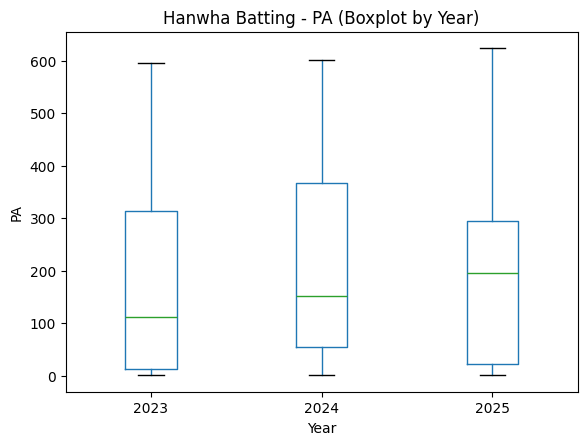

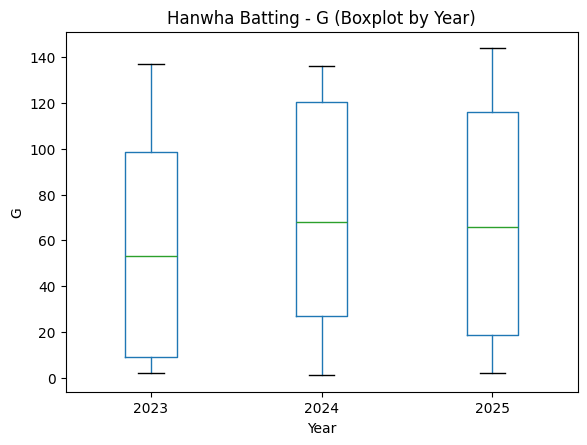

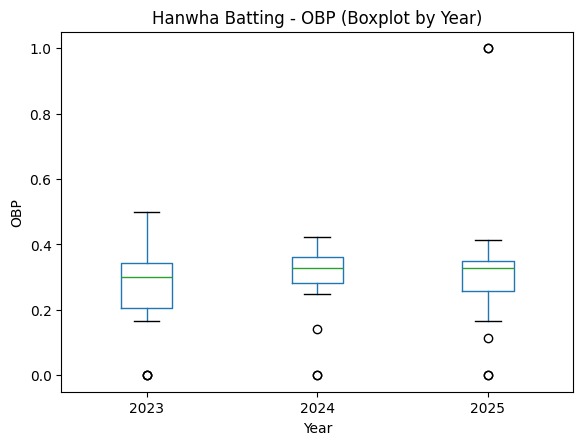

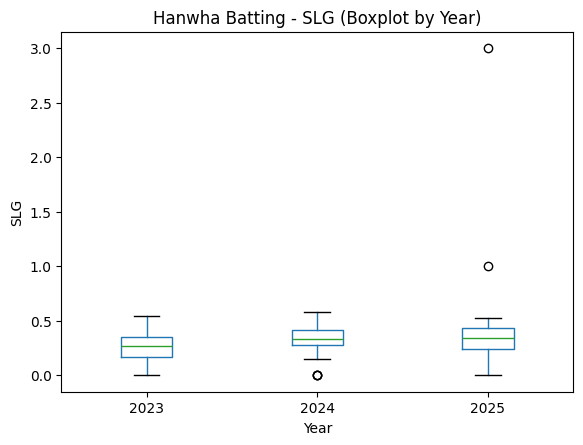

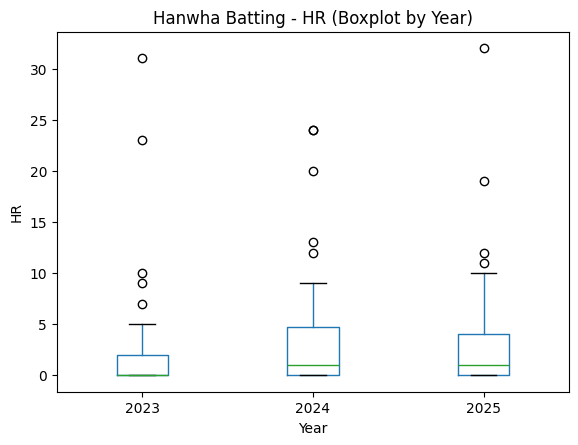

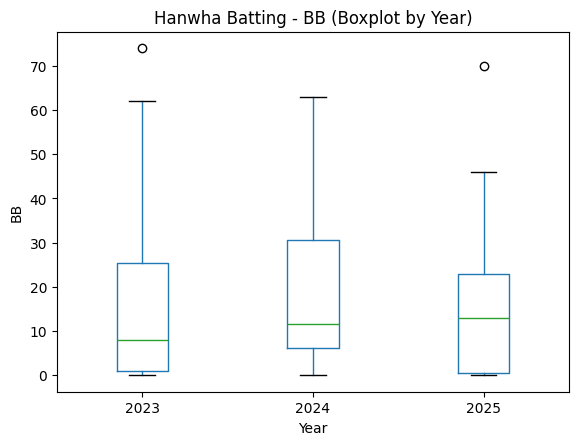

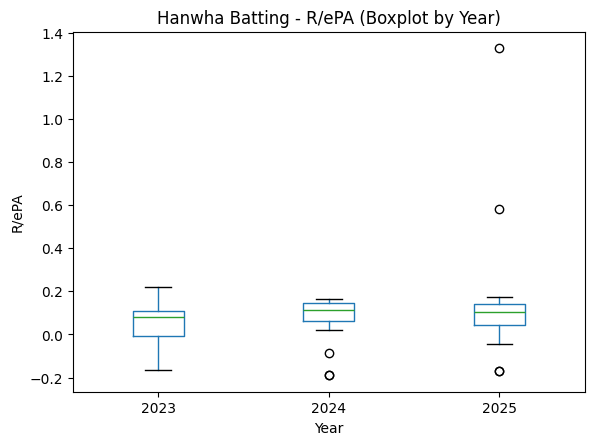

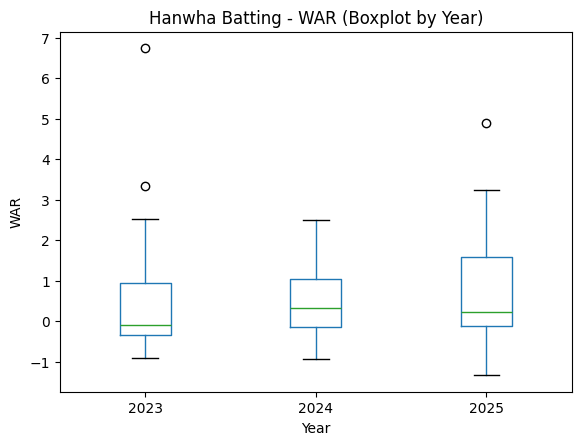

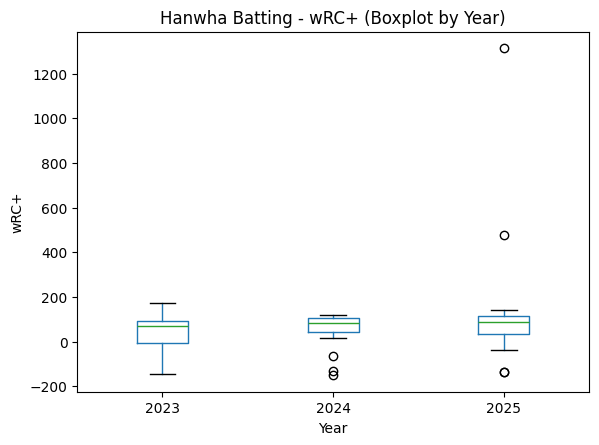

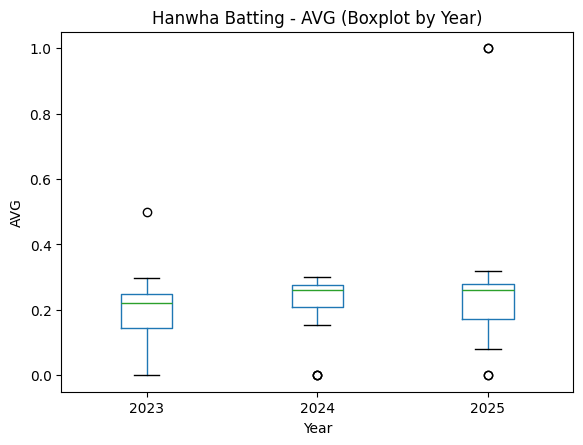

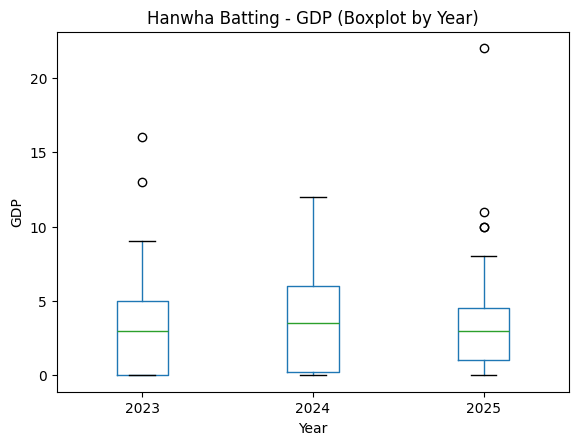

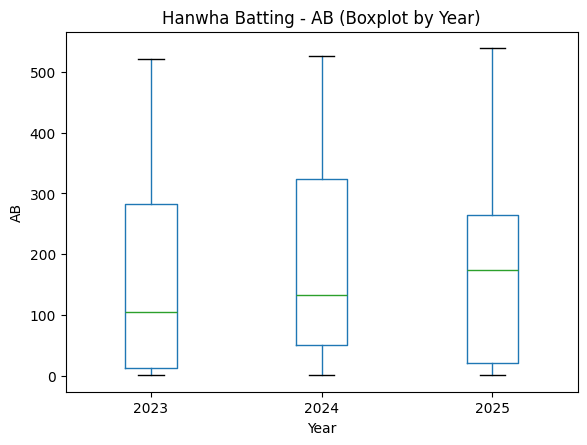

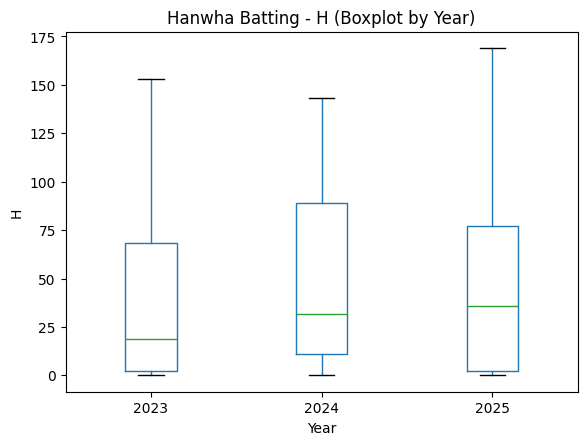

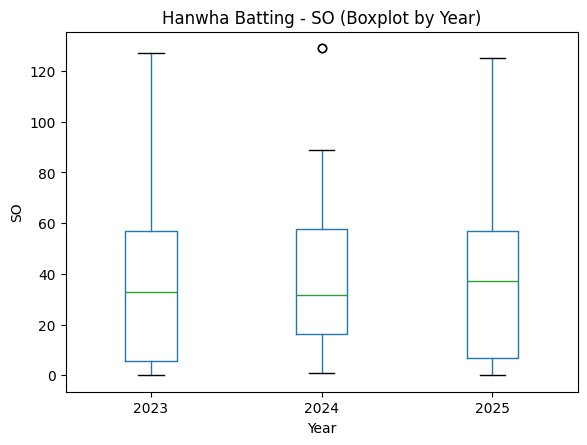

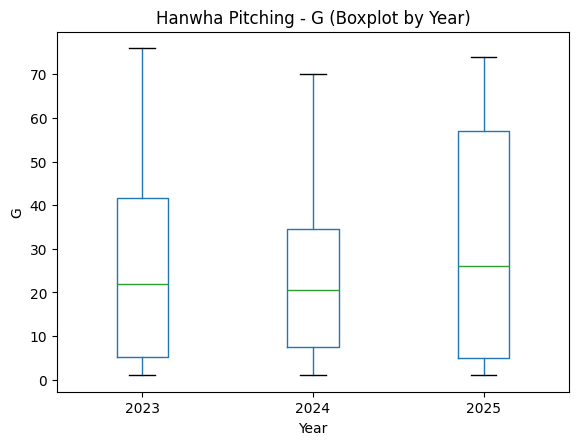

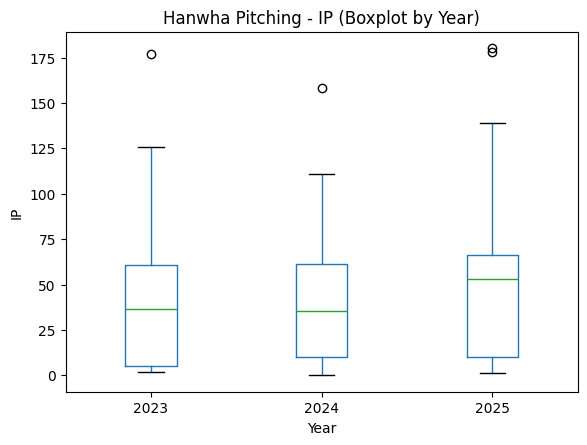

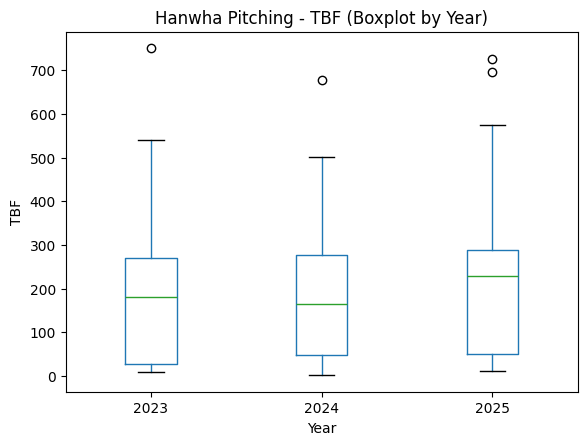

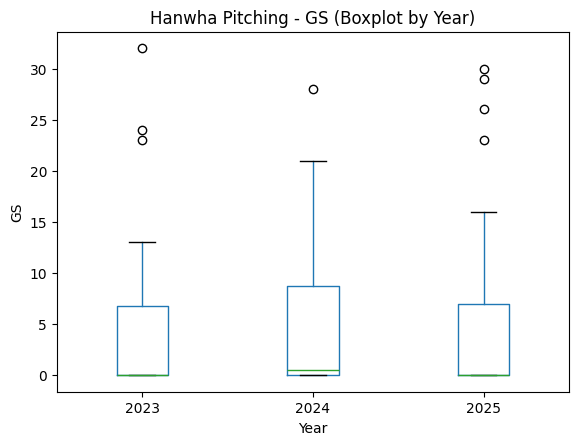

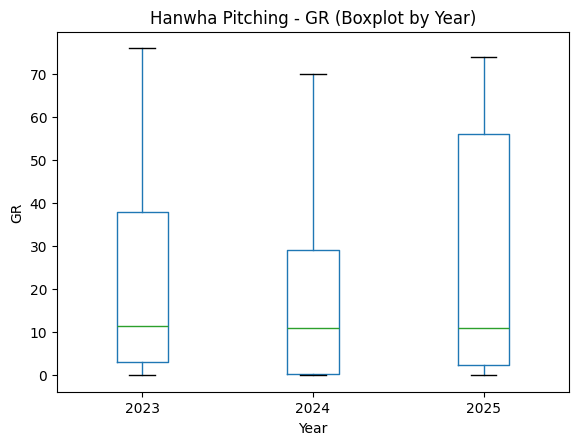

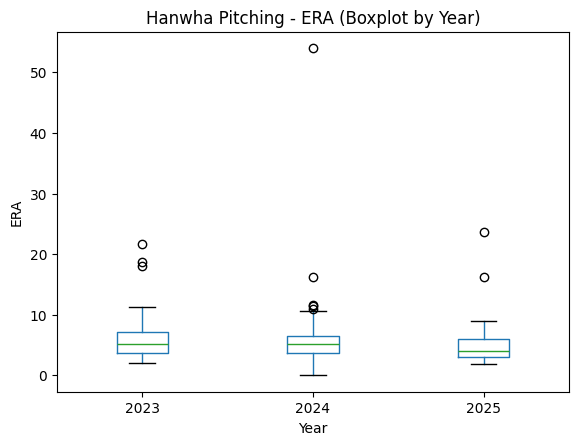

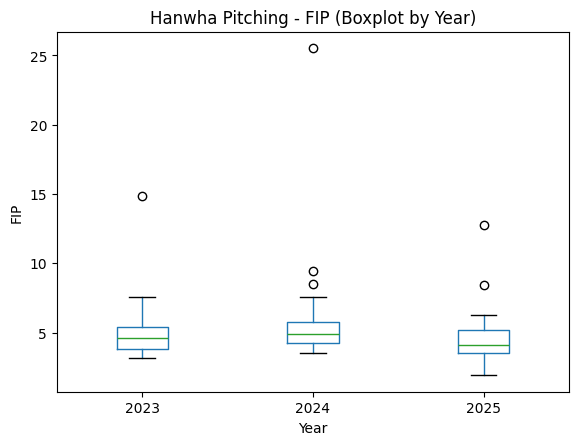

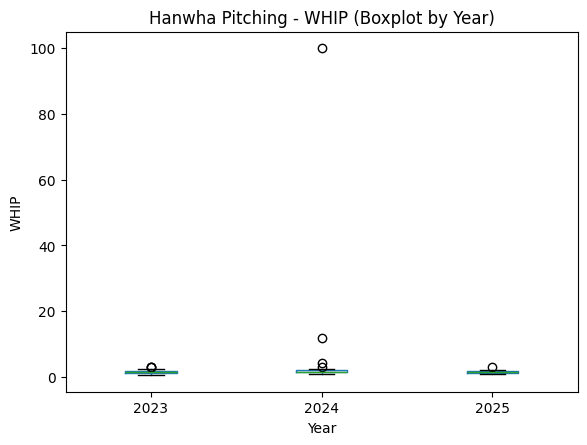

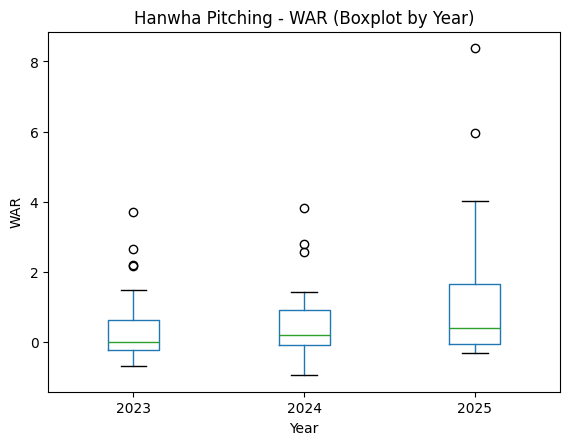

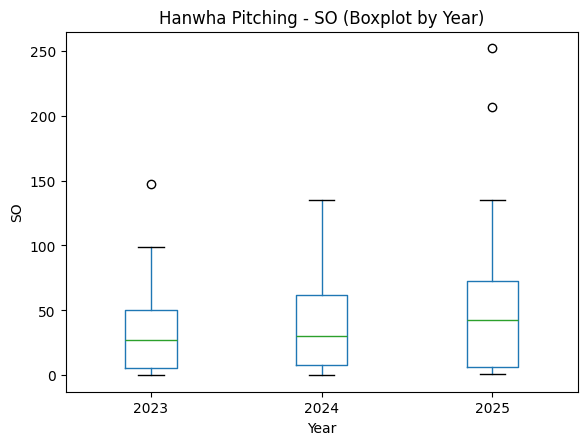

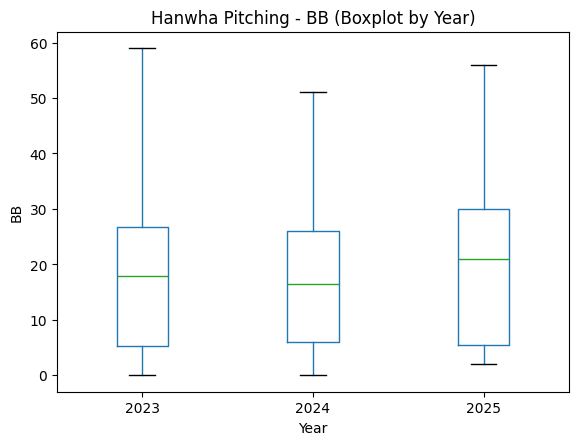

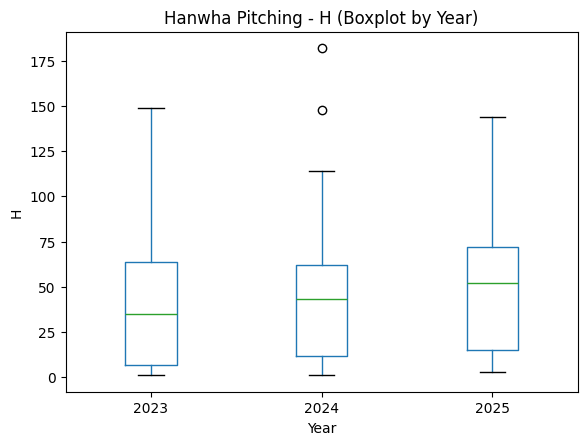

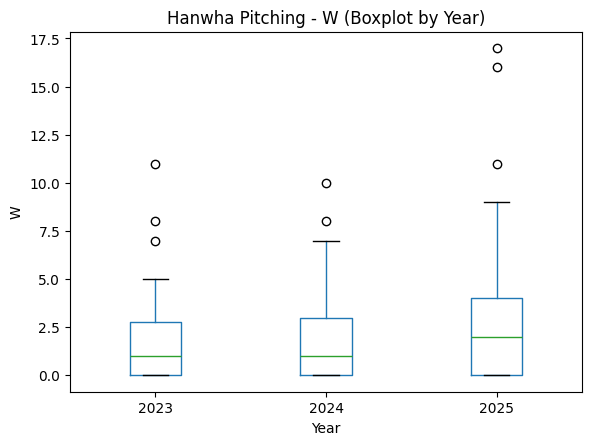

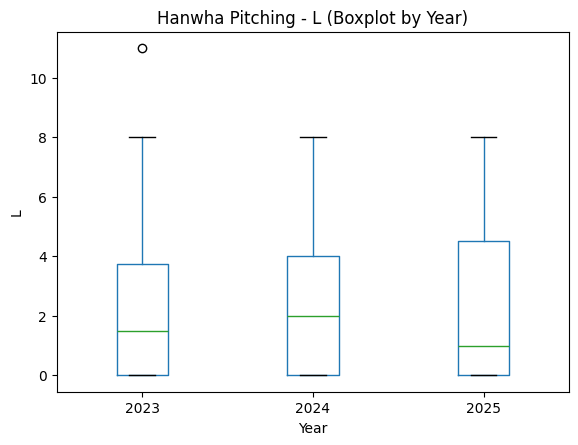

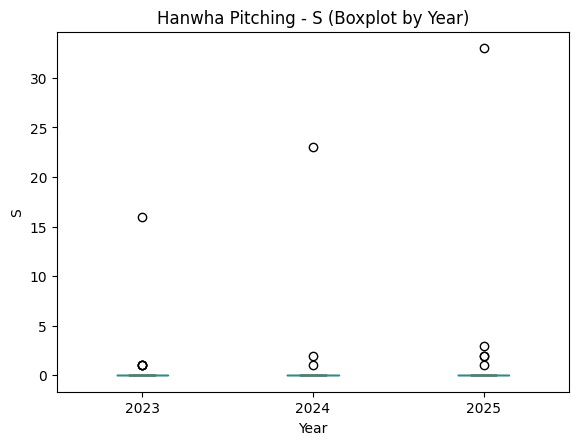

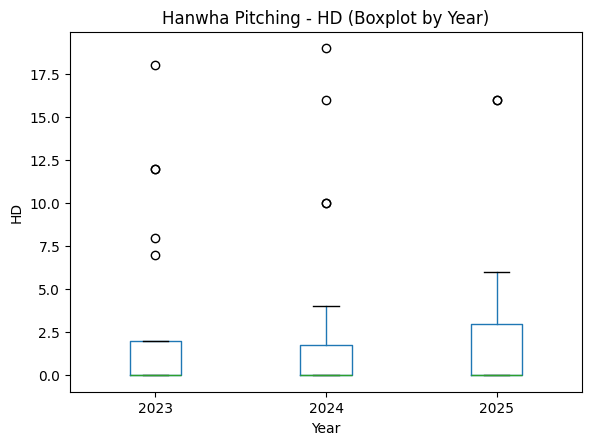

In [25]:
# 박스플롯: 연도별 분포(중앙값/사분위수/이상치)를 한 번에 확인
def boxplot_by_year(df, cols, title_prefix):
    for col in cols:
        df.boxplot(column=col, by='Year', grid=False)
        plt.title(f'{title_prefix} - {col} (Boxplot by Year)')
        plt.suptitle('')
        plt.xlabel('Year')
        plt.ylabel(col)
        plt.show()

boxplot_by_year(hanwha_bat, bat_cols, "Hanwha Batting")
boxplot_by_year(hanwha_pitch, pitch_cols, "Hanwha Pitching")

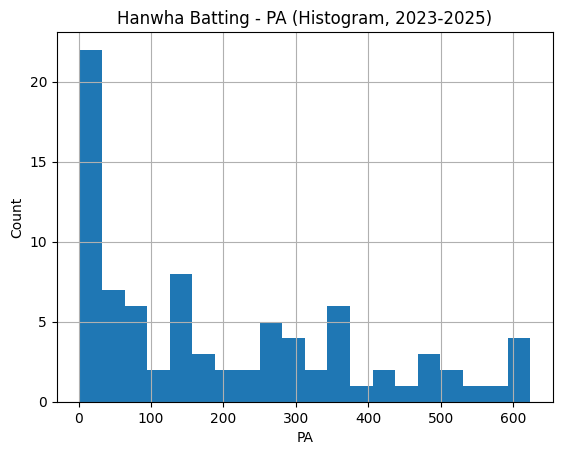

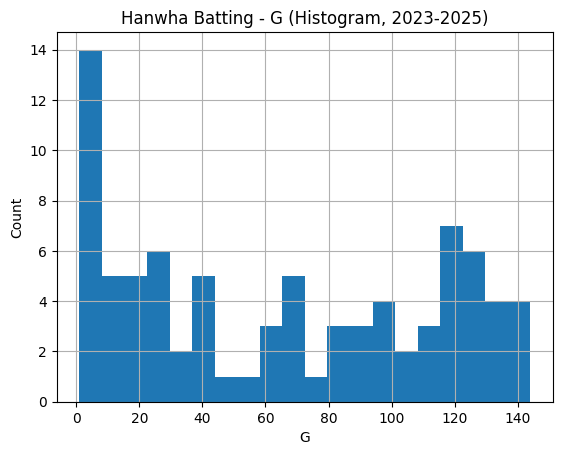

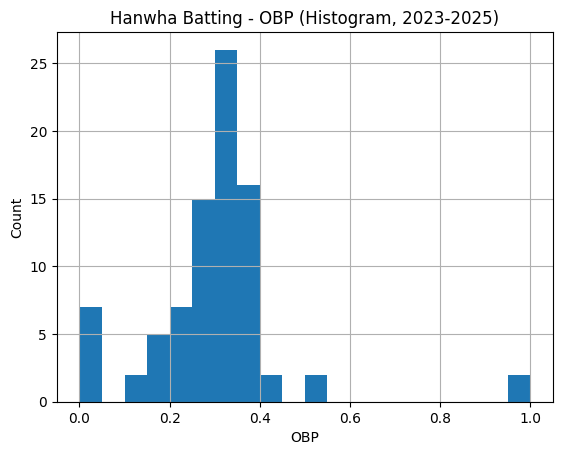

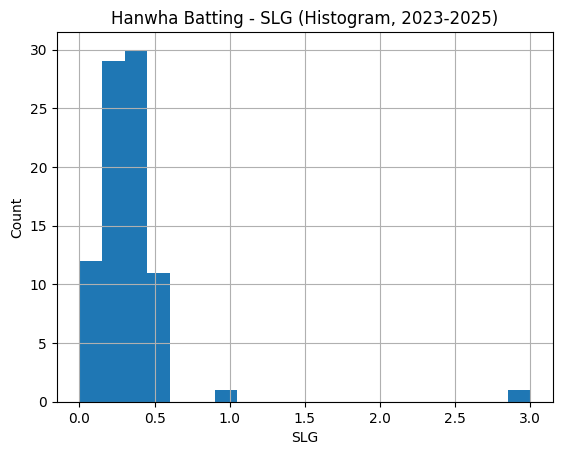

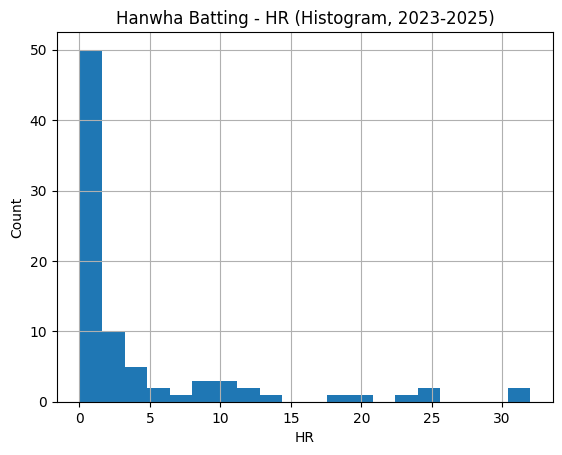

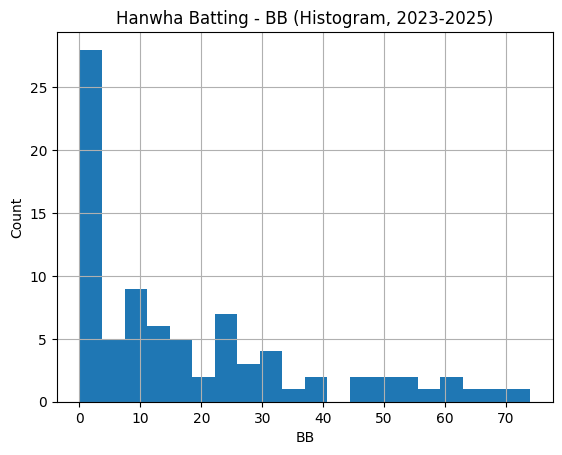

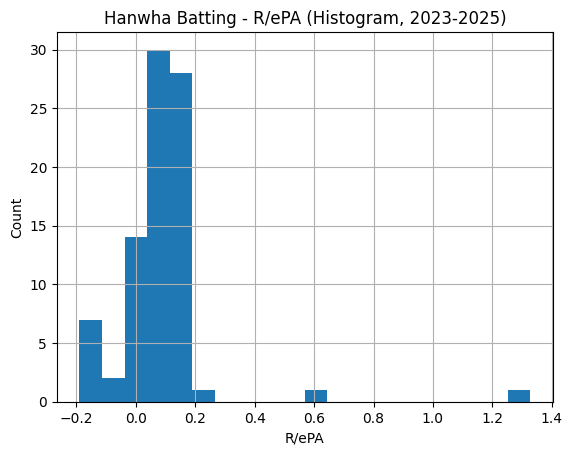

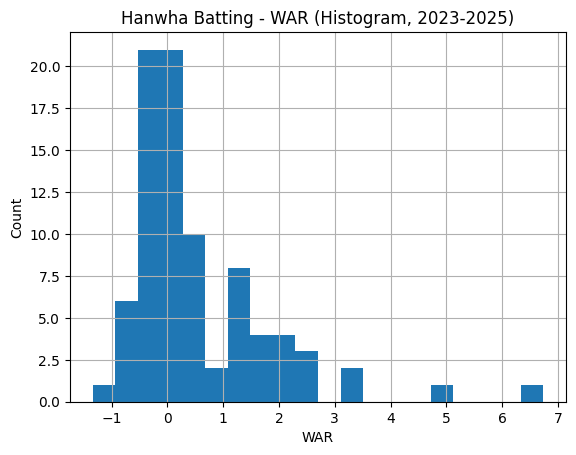

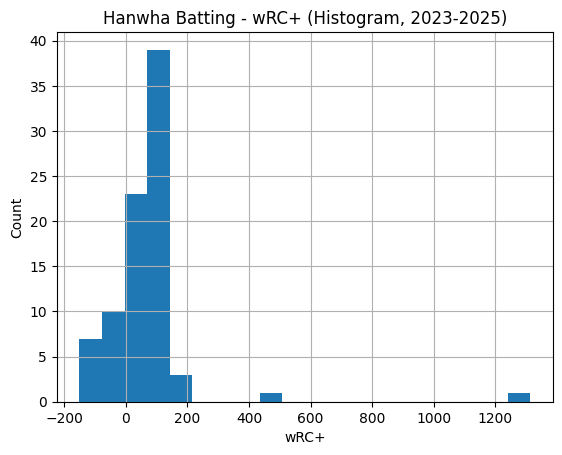

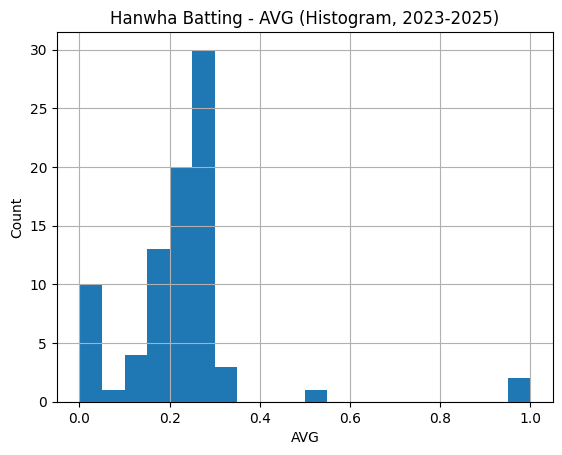

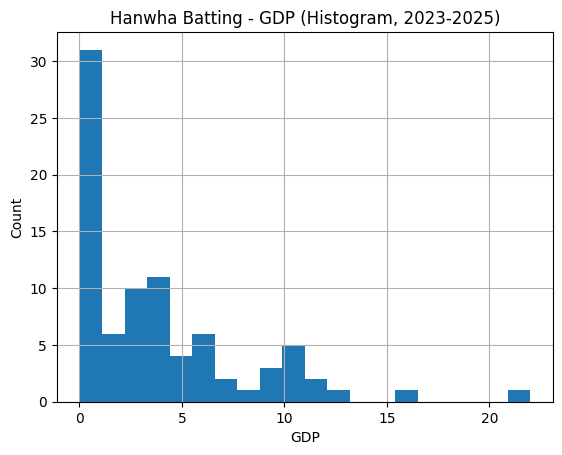

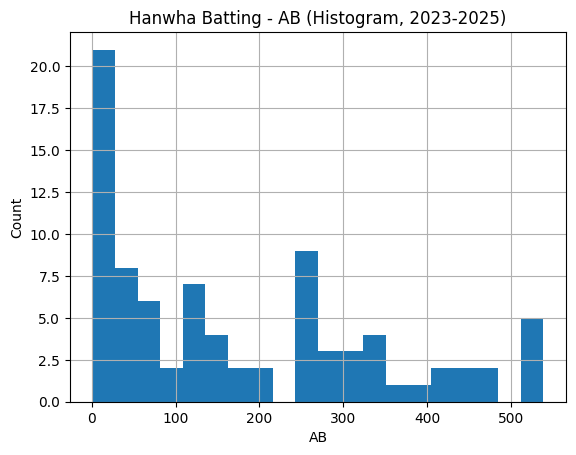

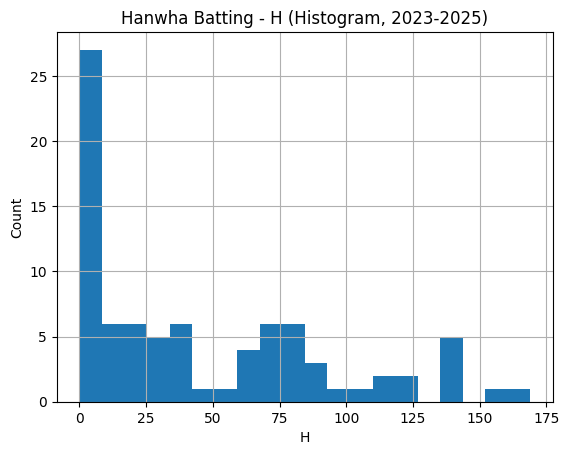

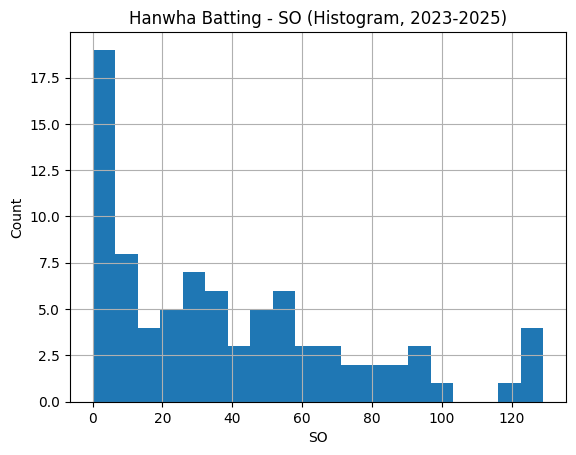

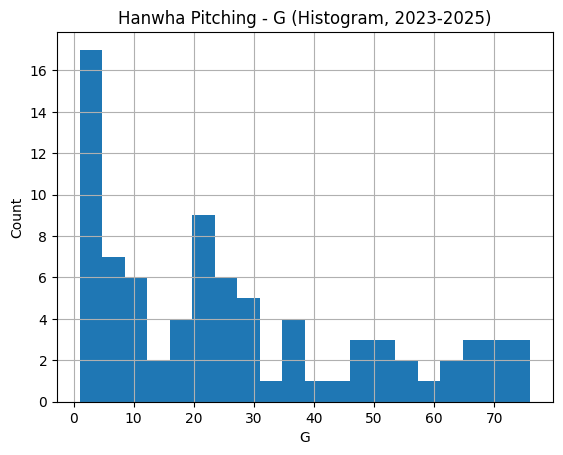

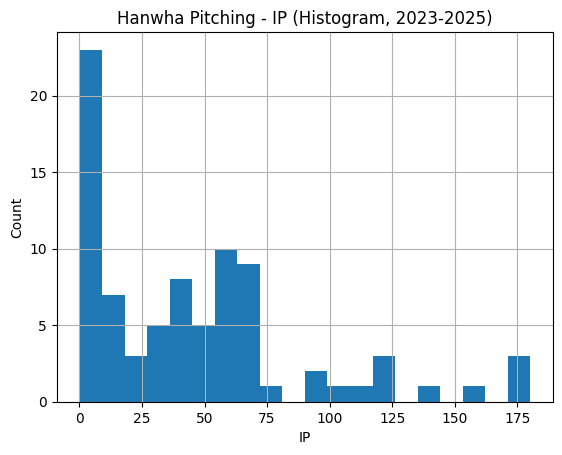

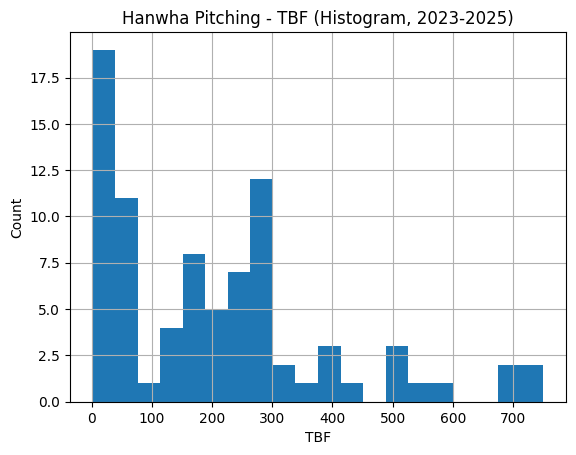

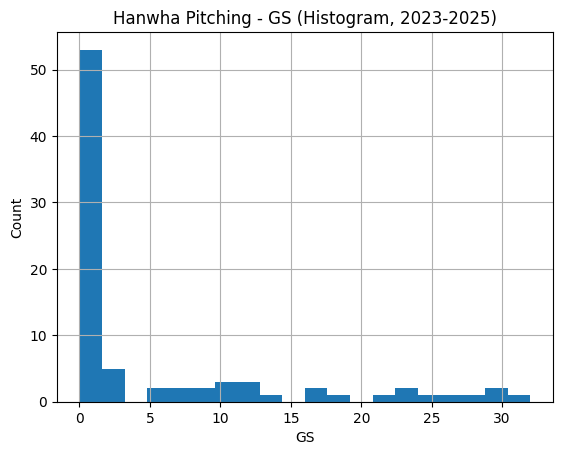

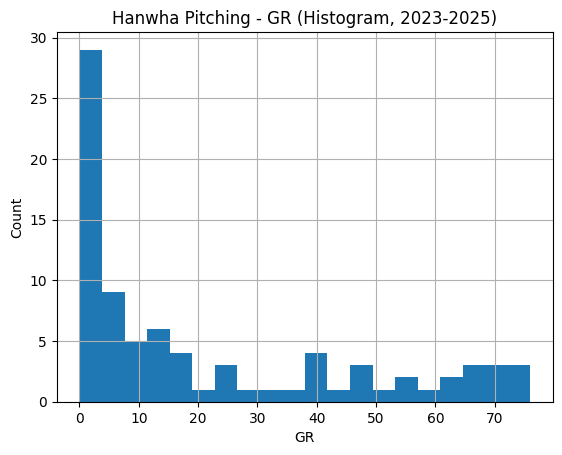

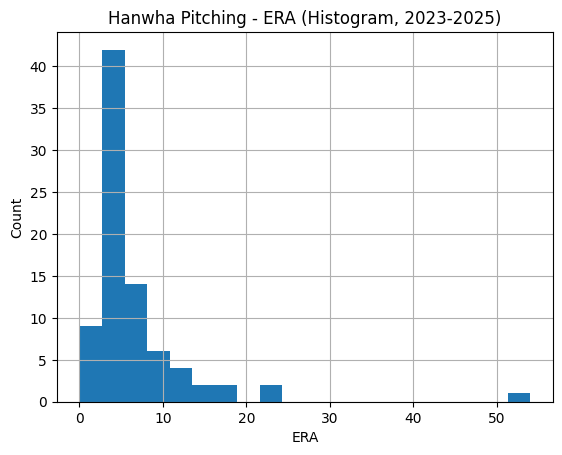

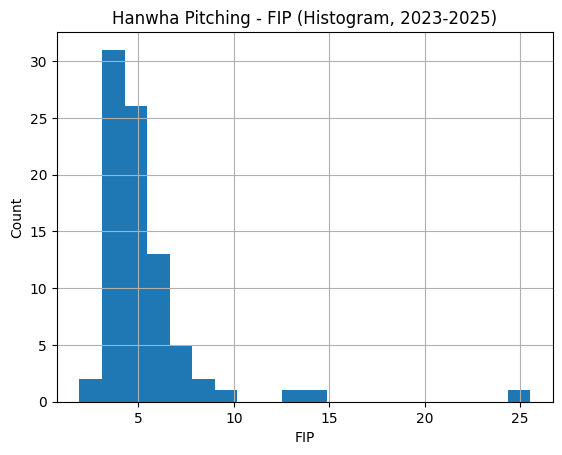

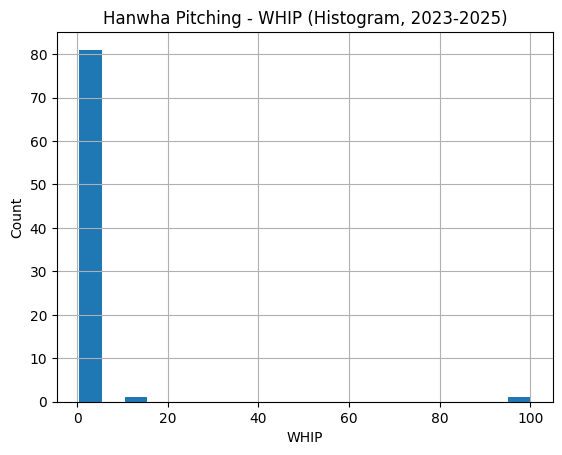

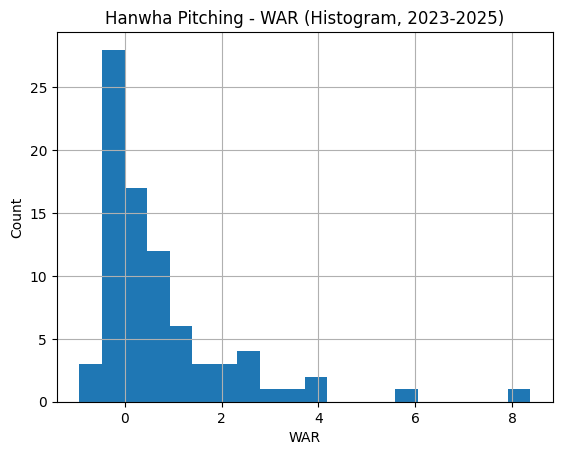

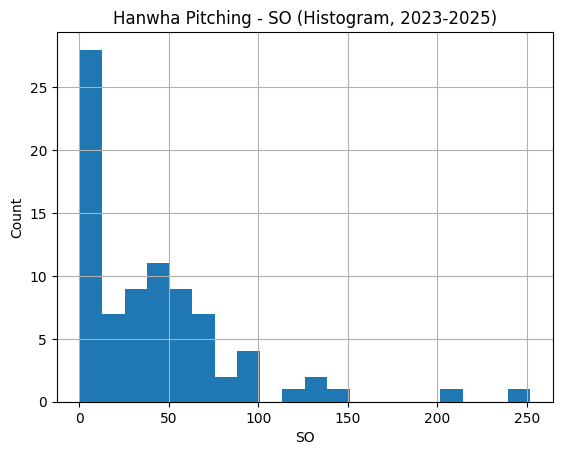

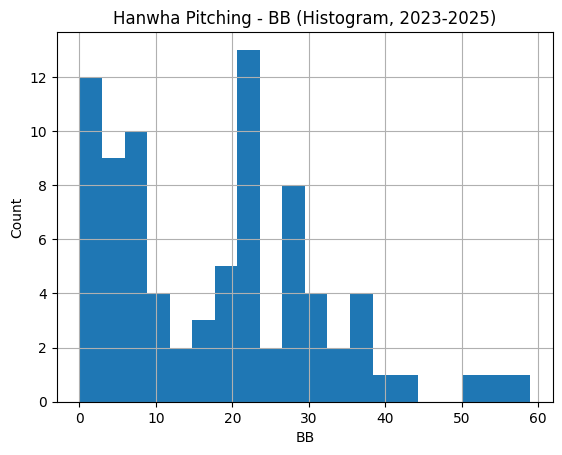

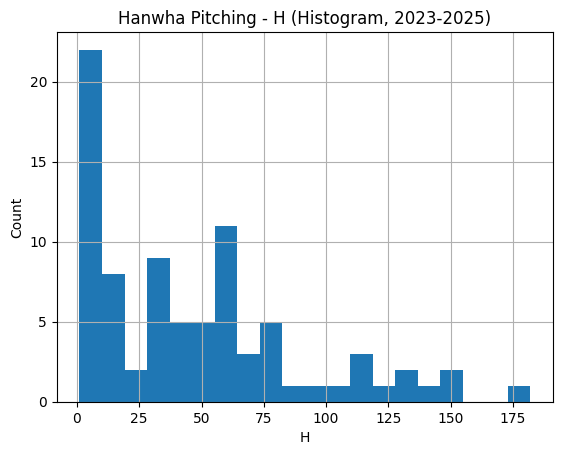

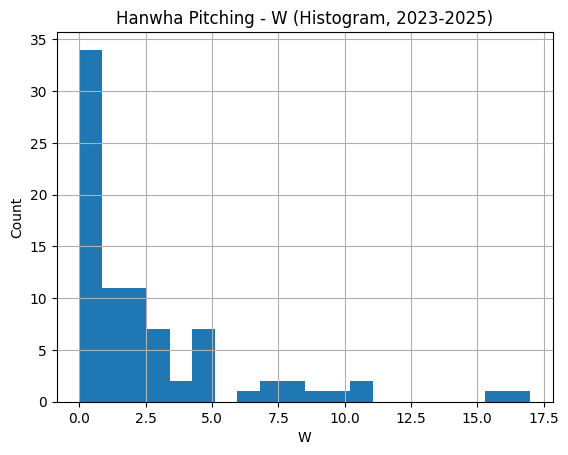

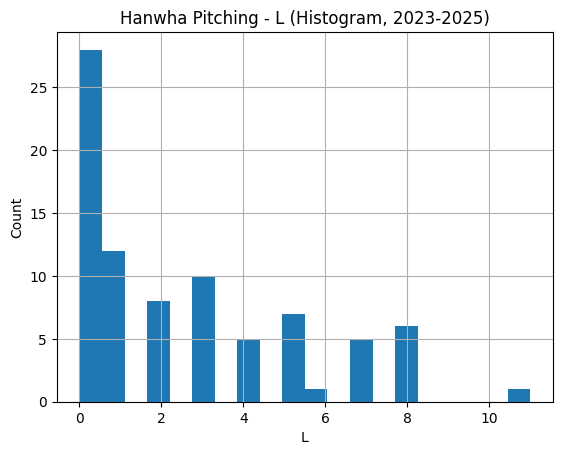

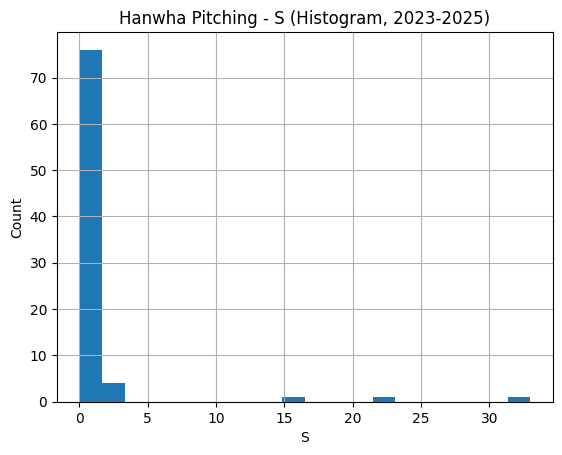

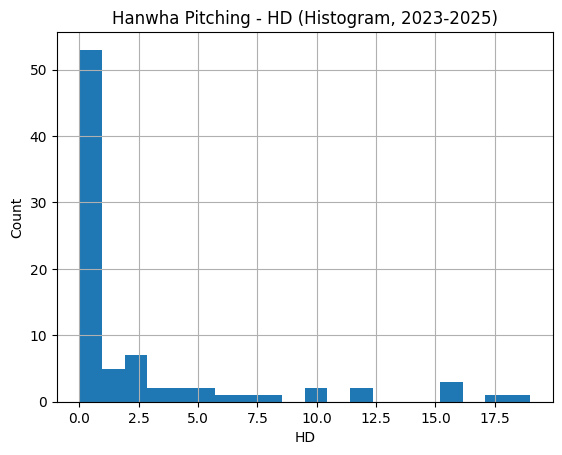

In [26]:
# 히스토그램: 전체기간(2023~2025) 분포를 빠르게 파악
def hist_all(df, cols, title_prefix, bins=20):
    for col in cols:
        df[col].dropna().hist(bins=bins)
        plt.title(f'{title_prefix} - {col} (Histogram, {YEAR_FROM}-{YEAR_TO})')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

hist_all(hanwha_bat, bat_cols, "Hanwha Batting")
hist_all(hanwha_pitch, pitch_cols, "Hanwha Pitching")


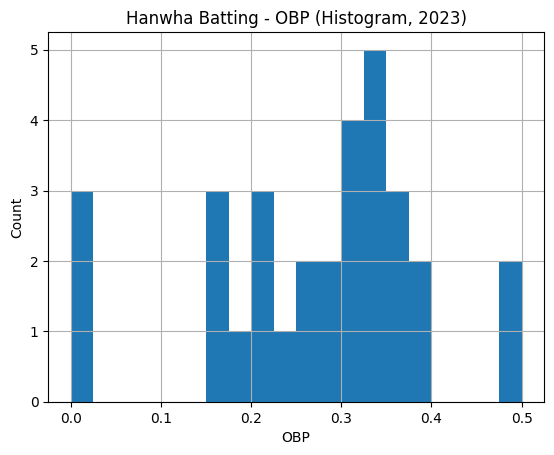

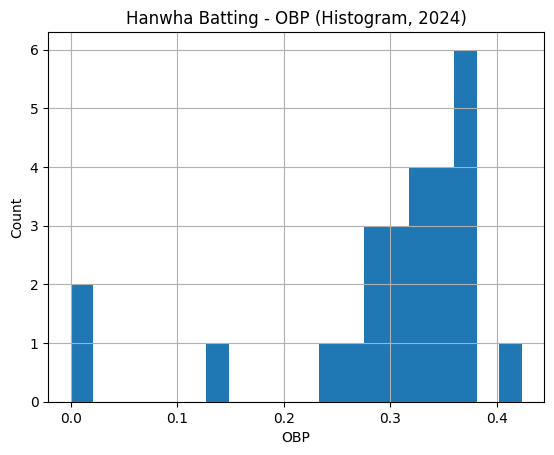

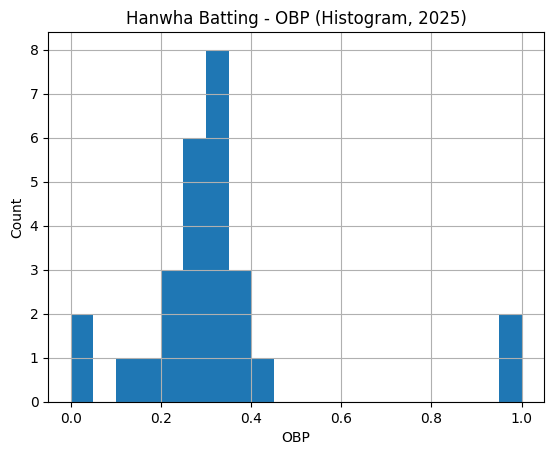

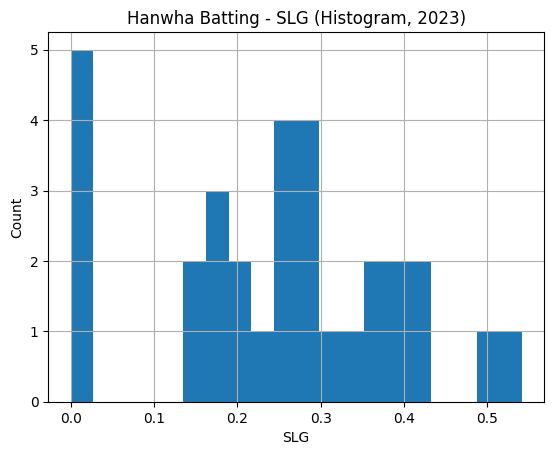

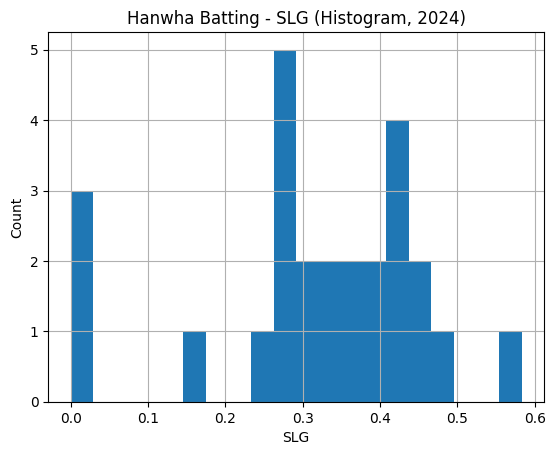

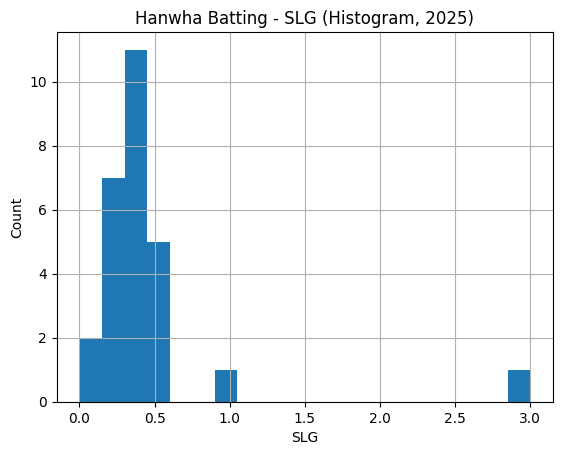

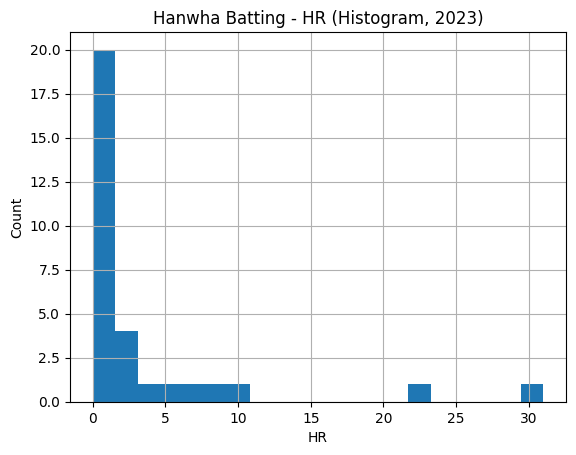

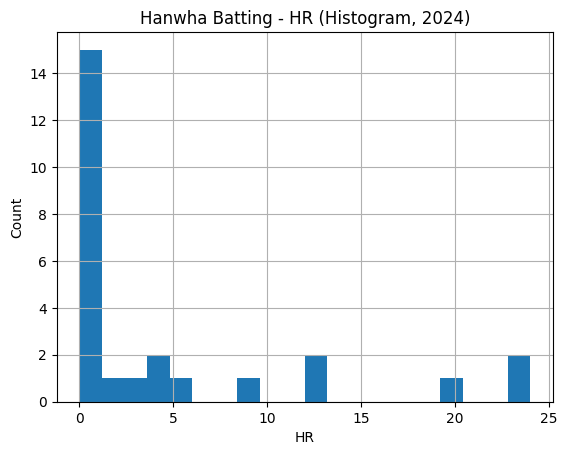

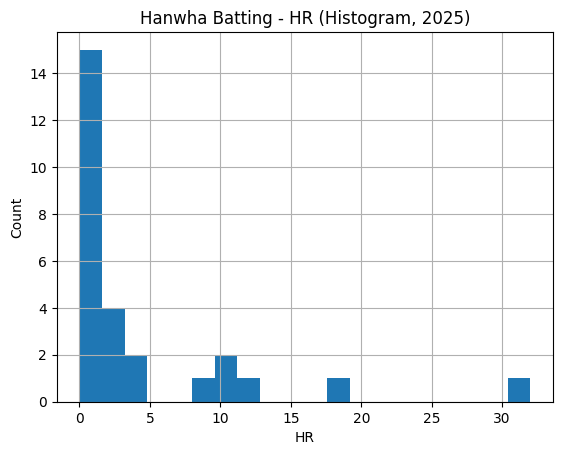

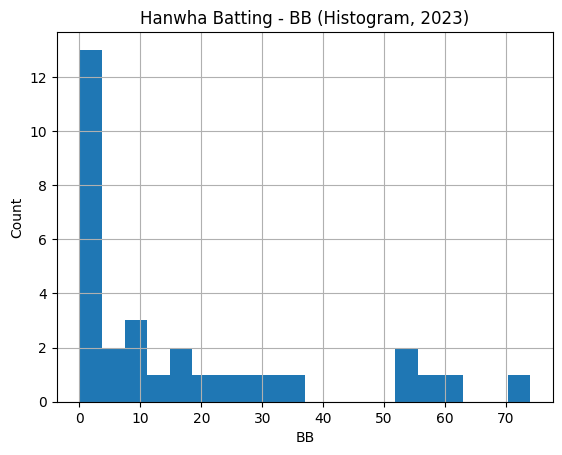

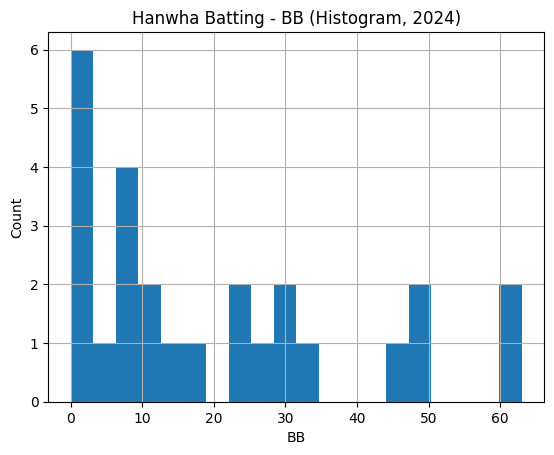

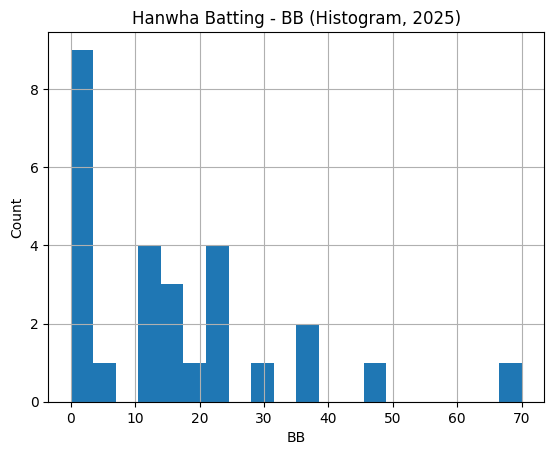

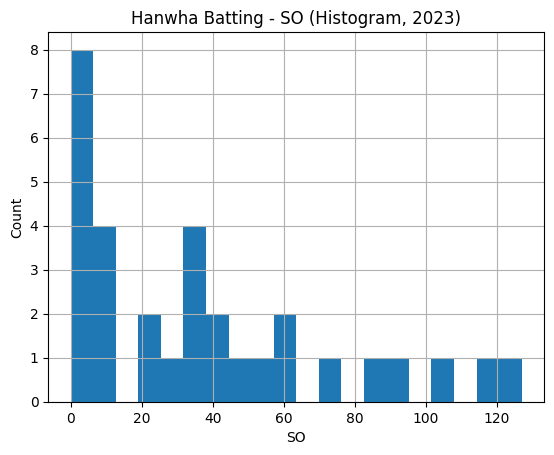

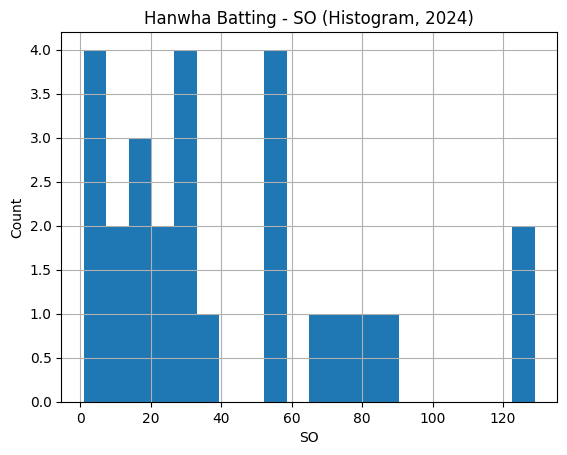

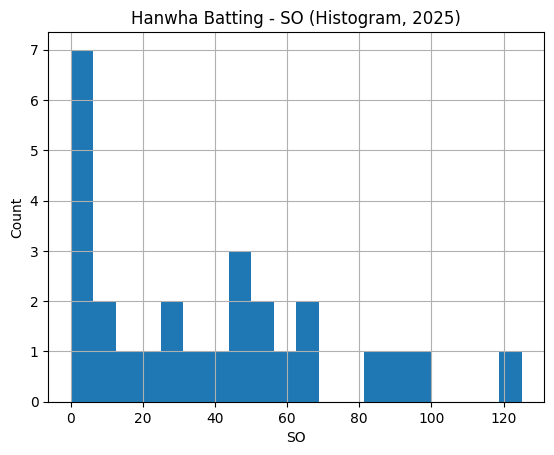

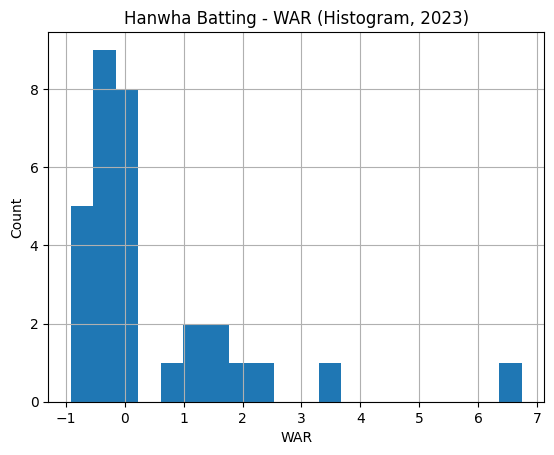

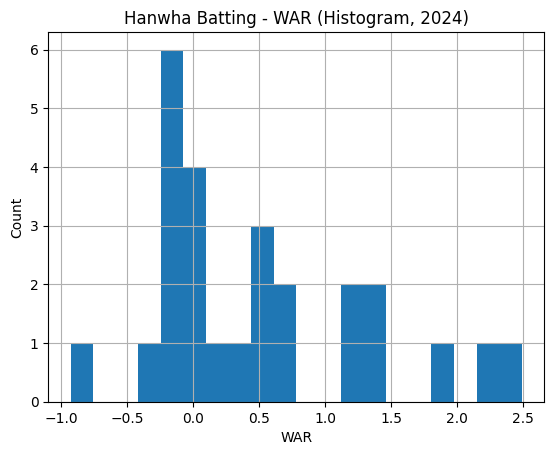

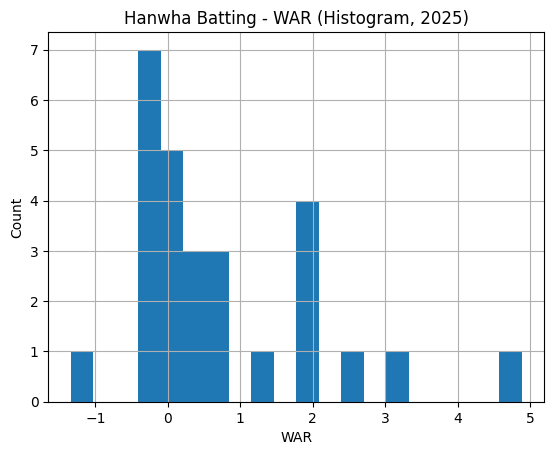

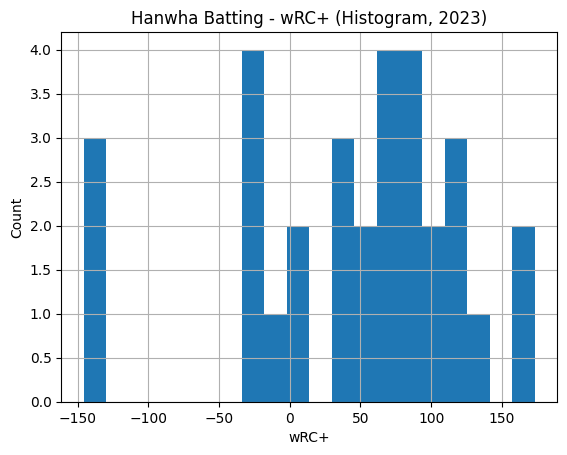

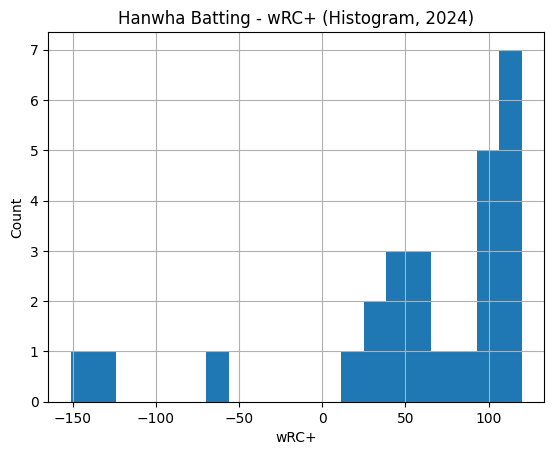

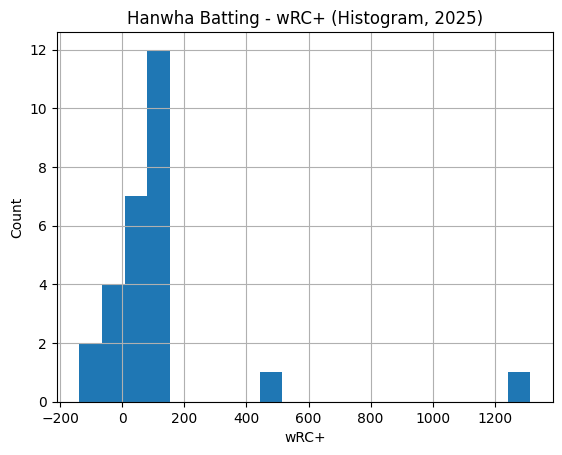

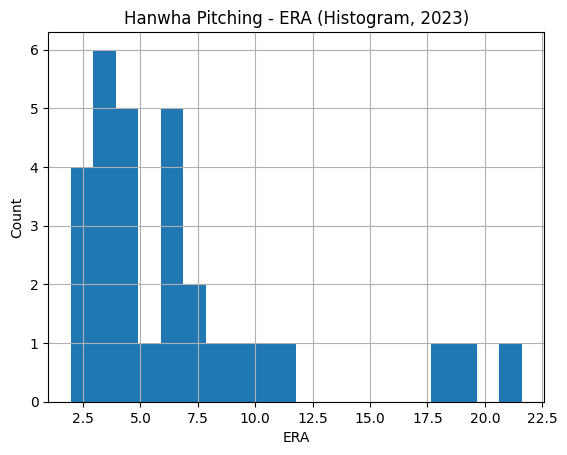

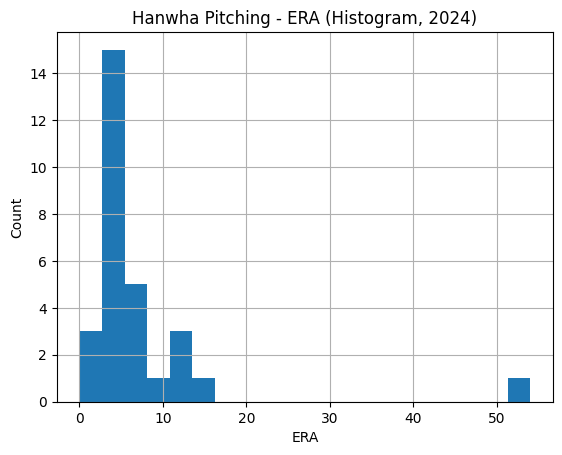

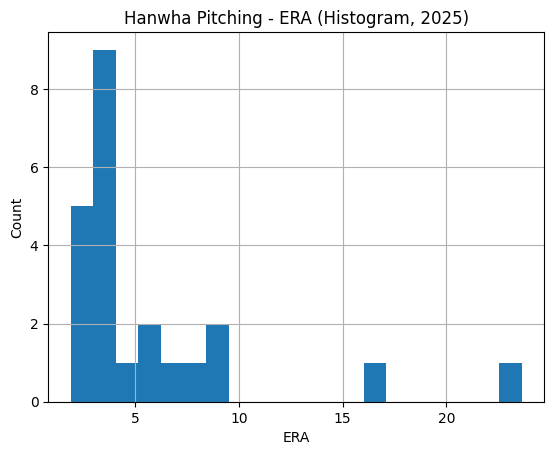

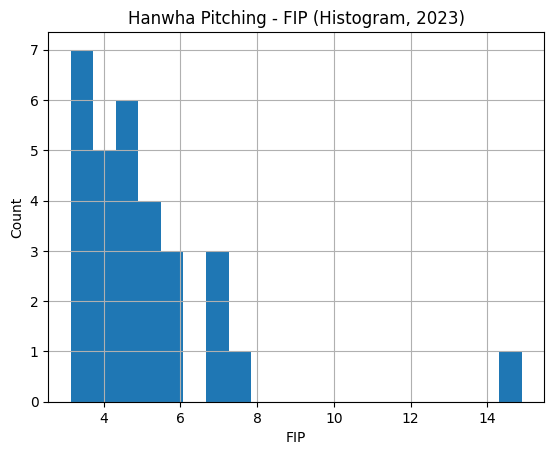

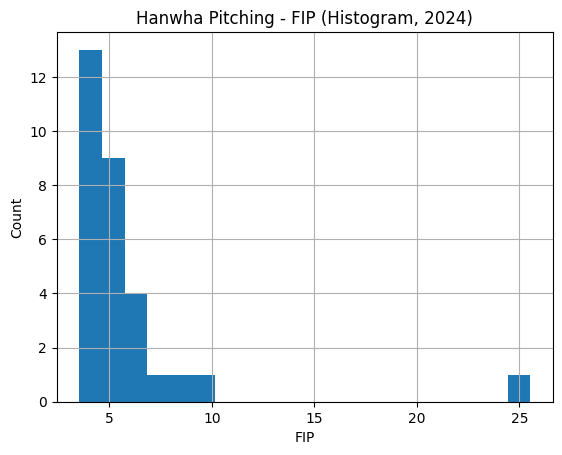

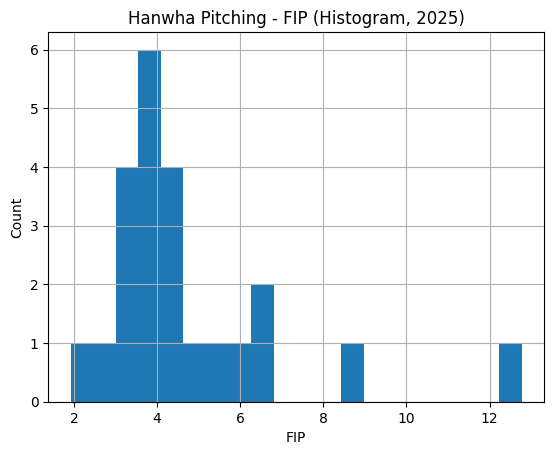

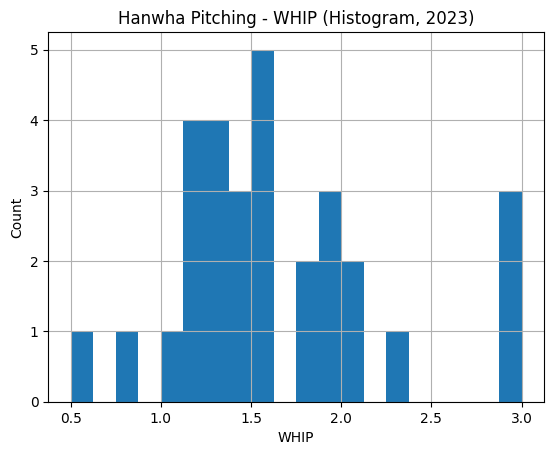

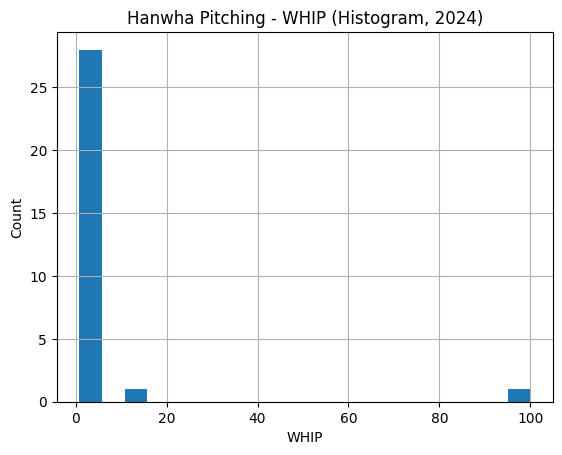

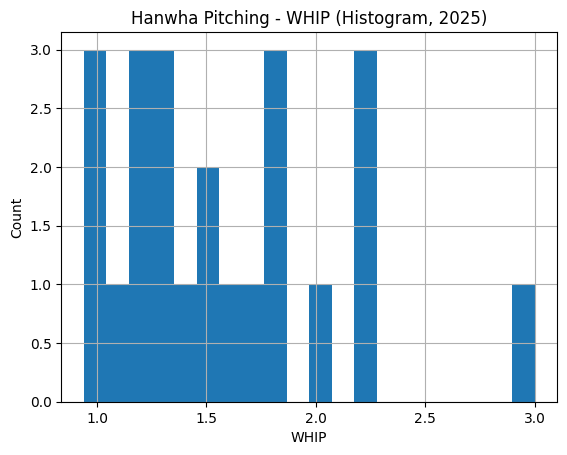

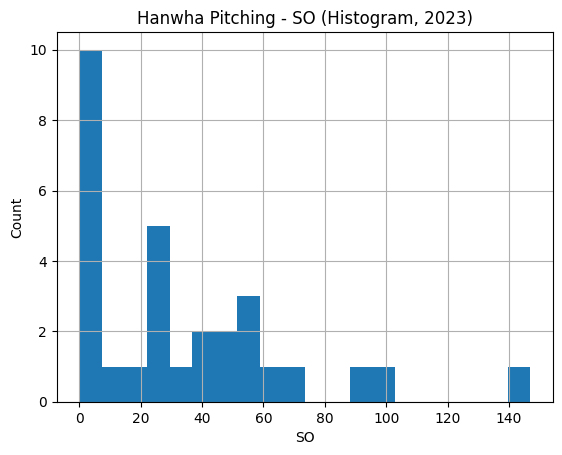

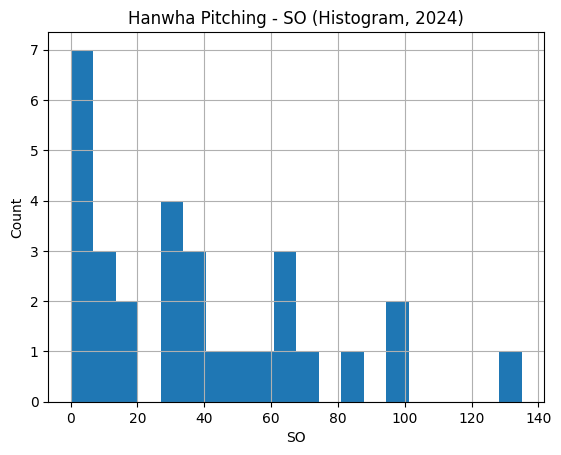

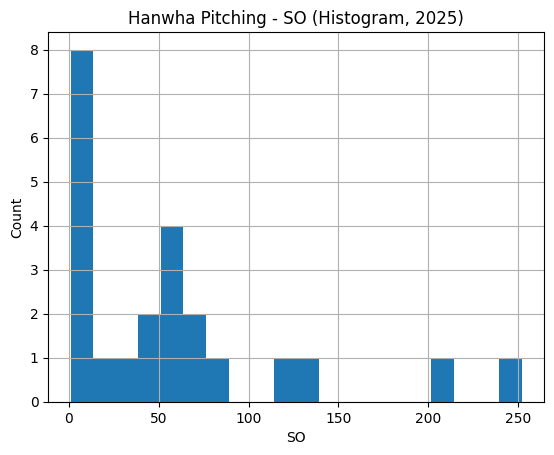

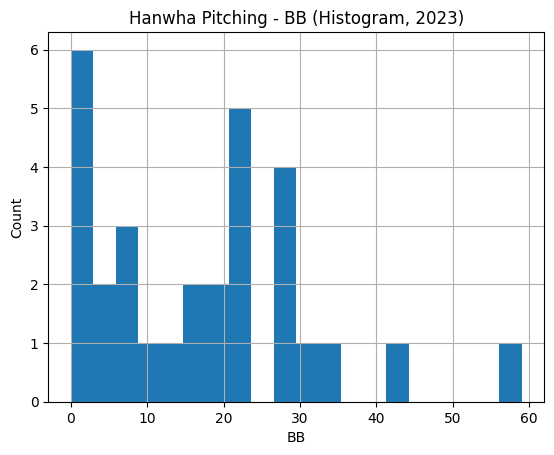

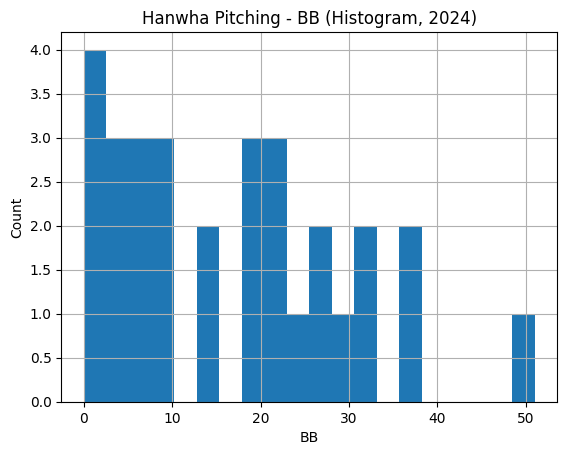

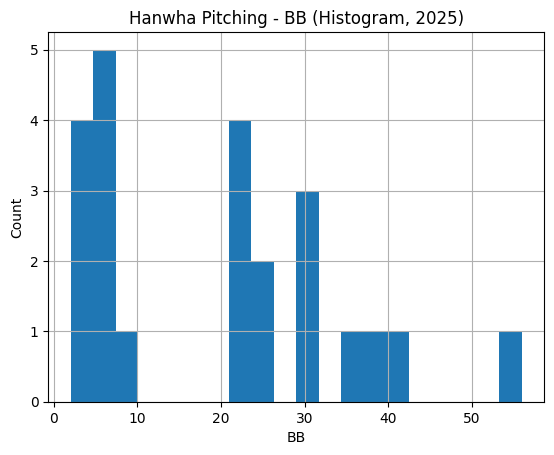

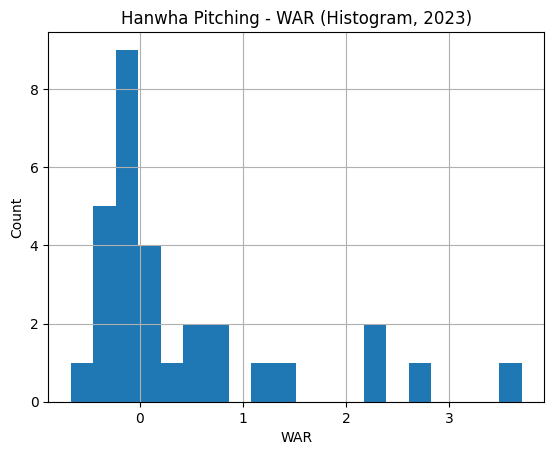

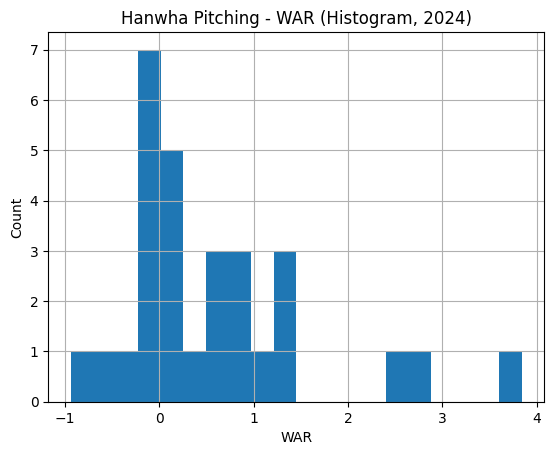

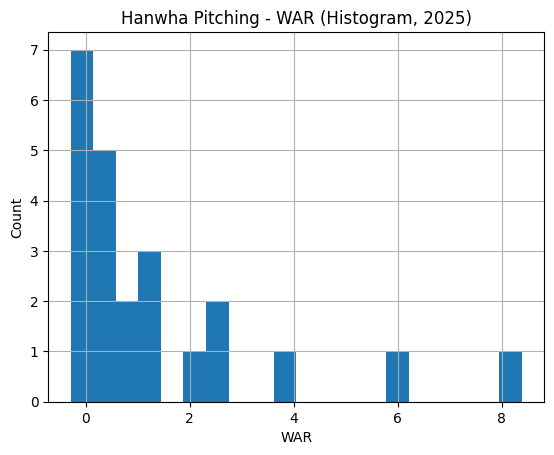

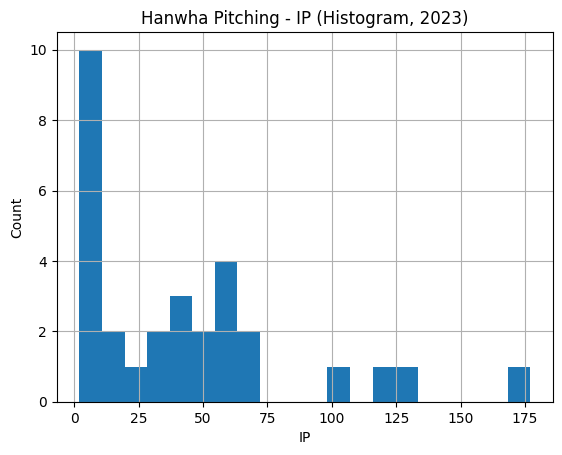

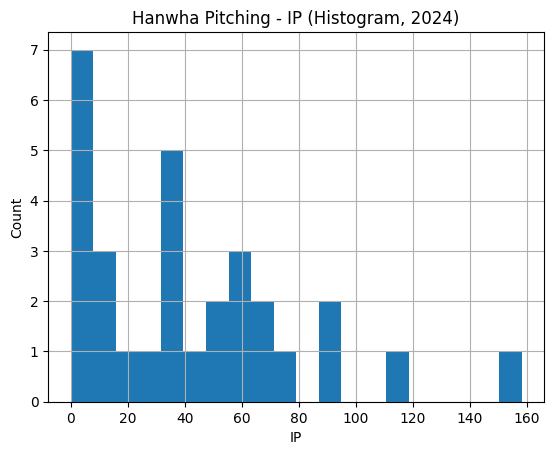

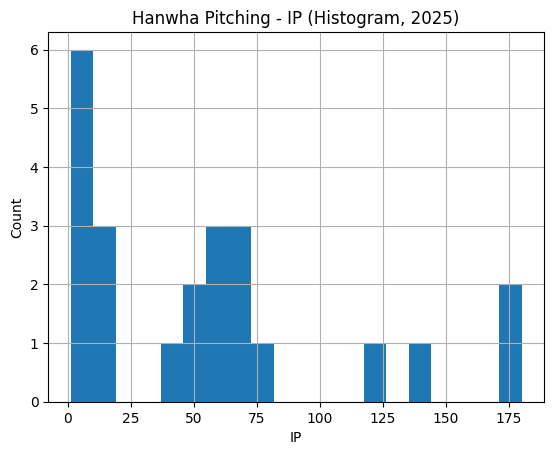

In [27]:
# 연도별 히스토그램: 핵심 지표만 추천(그래프 과다 생성 방지)
key_bat_cols = ['OBP', 'SLG', 'HR', 'BB', 'SO', 'WAR', 'wRC+']
key_pitch_cols = ['ERA', 'FIP', 'WHIP', 'SO', 'BB', 'WAR', 'IP']

def hist_by_year(df, cols, title_prefix, bins=20):
    years = sorted(df['Year'].dropna().unique())
    for col in cols:
        for y in years:
            df.loc[df['Year'] == y, col].dropna().hist(bins=bins)
            plt.title(f'{title_prefix} - {col} (Histogram, {y})')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

hist_by_year(hanwha_bat, key_bat_cols, "Hanwha Batting")
hist_by_year(hanwha_pitch, key_pitch_cols, "Hanwha Pitching")


In [28]:
# 연도별 포지션 구성(등록 선수 수) 확인
pos_table = hanwha_bat.pivot_table(
    index='Year',
    columns='Pos.',
    values='Name',
    aggfunc='nunique'
).fillna(0).astype(int)

pos_table


Pos.  1B  2B  3B  C  CF  DH  LF  RF  SS
Year                                   
2023   3   1   1  4   4   4   6   3   5
2024   1   2   1  4   6   2   5   2   3
2025   4   3   1  4   2   4   1   6   2

---
### 02_analysis_team_comparison.ipynb
목적:
- 10개 팀(2021~2025) 시즌 데이터에서 "분석용 컷(타자 PA>=50, 투수 IP>=30)" 적용
- 전처리 결과를 processed로 저장해 이후 노트북에서 재사용
- (1) 한화 연도별 트렌드 (2) 2025 시즌 팀 비교 (3) 분포/구조(포지션, WAR 구조) 확인

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# (Mac) 한글 폰트 설정: 환경에 따라 깨질 수 있어 선택사항
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [30]:
bat_raw = pd.read_csv('../data/raw/kbo_batting_stats_by_season_1982-2025.csv')
pitch_raw = pd.read_csv('../data/raw/kbo_pitching_stats_by_season_1982-2025.csv')

os.makedirs('../data/processed', exist_ok=True)

print("bat_raw:", bat_raw.shape)
print("pitch_raw:", pitch_raw.shape)


bat_raw: (9731, 39)
pitch_raw: (7727, 42)


In [31]:
teams = ['한화', 'LG', 'KIA', 'SSG', '삼성', '키움', '두산', '롯데', 'NC', 'KT']
years = [2021, 2022, 2023, 2024, 2025]

# 컷 기준: 표본이 너무 작은 선수(대체로 백업/샘플 적음)를 제외해 팀 평균 왜곡 방지
BAT_PA_CUT = 50
PITCH_IP_CUT = 30


In [32]:
bat = (
    bat_raw
    .loc[bat_raw['Team'].isin(teams) & bat_raw['Year'].isin(years)]
    .loc[bat_raw['PA'] >= BAT_PA_CUT]
    .copy()
)

pitch = (
    pitch_raw
    .loc[pitch_raw['Team'].isin(teams) & pitch_raw['Year'].isin(years)]
    .loc[pitch_raw['IP'] >= PITCH_IP_CUT]
    .copy()
)

# 저장(재사용 목적)
bat_path = f'../data/processed/bat_analysis_pa{BAT_PA_CUT}_all_2021_2025.csv'
pitch_path = f'../data/processed/pitch_analysis_ip{PITCH_IP_CUT}_all_2021_2025.csv'

bat.to_csv(bat_path, index=False)
pitch.to_csv(pitch_path, index=False)

print("bat (filtered):", bat.shape, "->", bat_path)
print("pitch (filtered):", pitch.shape, "->", pitch_path)


bat (filtered): (950, 39) -> ../data/processed/bat_analysis_pa50_all_2021_2025.csv
pitch (filtered): (732, 42) -> ../data/processed/pitch_analysis_ip30_all_2021_2025.csv


In [33]:
# 협업 환경에서 "이 파일만 실행"해도 재현되도록 로드까지 포함(선택)
bat = pd.read_csv(bat_path)
pitch = pd.read_csv(pitch_path)


In [34]:
TEAM = '한화'

hanwha_bat = bat[bat['Team'] == TEAM].copy()
hanwha_pitch = pitch[pitch['Team'] == TEAM].copy()

bat_metrics = ['OBP', 'SLG', 'wRC+', 'WAR']
pitch_metrics = ['ERA', 'FIP', 'WAR']

hanwha_bat_mean = hanwha_bat.groupby('Year')[bat_metrics].mean()
hanwha_pitch_mean = hanwha_pitch.groupby('Year')[pitch_metrics].mean()

hanwha_bat_mean, hanwha_pitch_mean


(           OBP       SLG       wRC+       WAR
 Year                                         
 2021  0.306080  0.308800  68.064000  0.616000
 2022  0.299632  0.330737  75.021053  0.773684
 2023  0.301350  0.316850  71.675000  0.800500
 2024  0.336952  0.373619  85.457143  0.646667
 2025  0.329529  0.375941  93.294118  1.262353,
            ERA       FIP       WAR
 Year                              
 2021  4.411538  4.640769  1.192308
 2022  4.698235  4.514706  0.418235
 2023  4.414118  4.244118  0.811176
 2024  4.976667  4.865000  1.016667
 2025  3.646429  3.836429  2.212143)

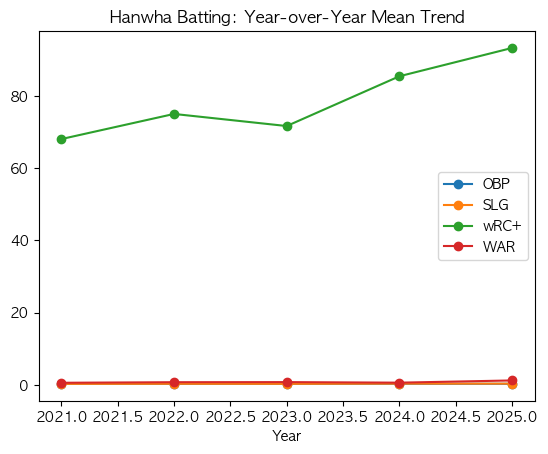

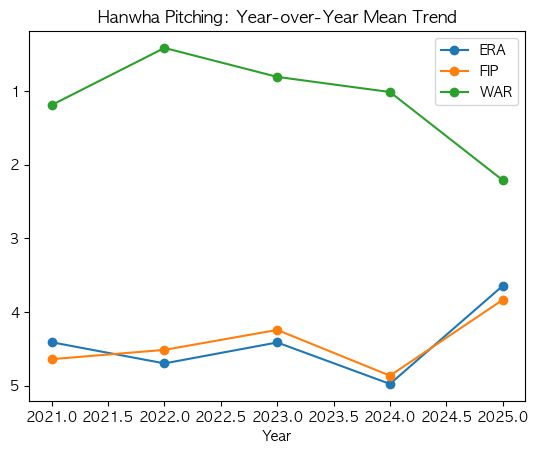

In [35]:
# 라인 차트: 연도별 평균 트렌드 확인
hanwha_bat_mean.plot(marker='o', title='Hanwha Batting: Year-over-Year Mean Trend')
plt.show()

hanwha_pitch_mean.plot(marker='o', title='Hanwha Pitching: Year-over-Year Mean Trend')
plt.gca().invert_yaxis()  # ERA/FIP는 낮을수록 좋음
plt.show()


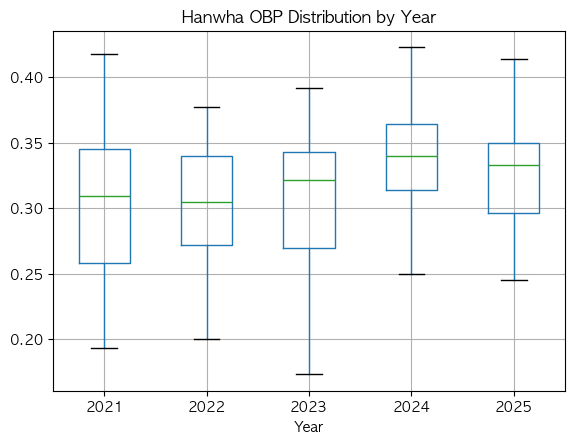

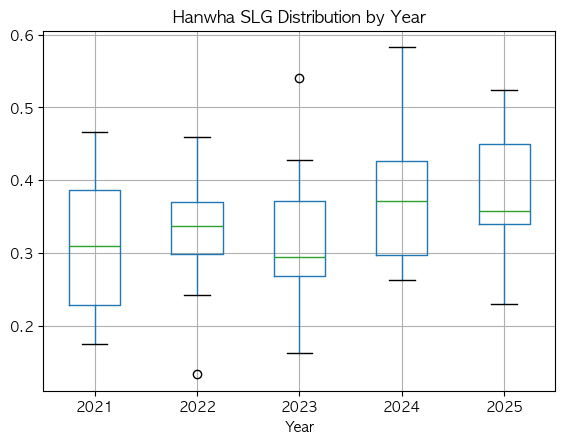

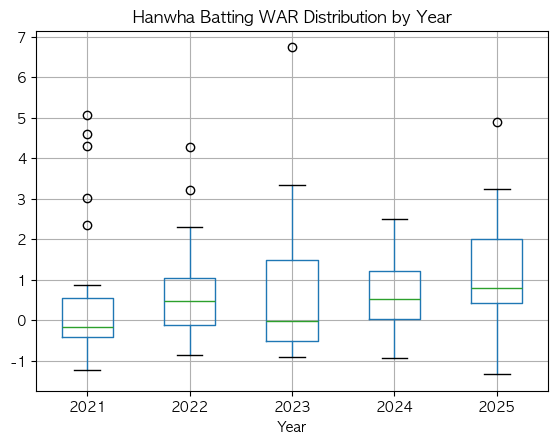

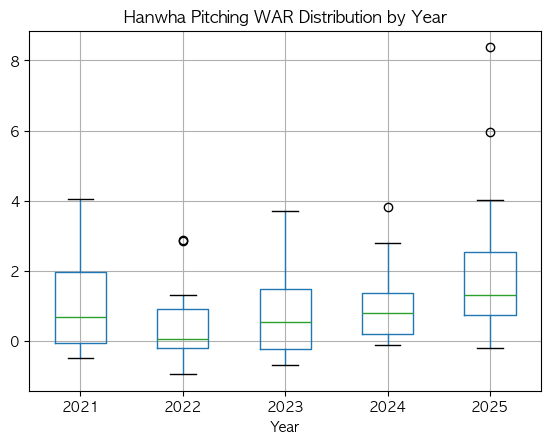

In [36]:
# 분포(연도별): 대표 지표만 남김 (너무 많으면 그래프가 과해짐)
def boxplot_by_year(df, col, title):
    df.boxplot(column=col, by='Year')
    plt.title(title)
    plt.suptitle('')
    plt.show()

boxplot_by_year(hanwha_bat, 'OBP', 'Hanwha OBP Distribution by Year')
boxplot_by_year(hanwha_bat, 'SLG', 'Hanwha SLG Distribution by Year')
boxplot_by_year(hanwha_bat, 'WAR', 'Hanwha Batting WAR Distribution by Year')

boxplot_by_year(hanwha_pitch, 'WAR', 'Hanwha Pitching WAR Distribution by Year')


In [37]:
YEAR = 2025
bat_2025 = bat[bat['Year'] == YEAR].copy()

team_mean_2025 = bat_2025.groupby('Team')[['OBP','SLG','wRC+']].mean().sort_index()
team_mean_2025


OBP       SLG        wRC+
Team                                
KIA   0.318609  0.362261   88.669565
KT    0.329667  0.355905   88.733333
LG    0.345062  0.393062  107.637500
NC    0.332450  0.364750   91.960000
SSG   0.305409  0.351091   75.886364
두산    0.331100  0.380400   98.105000
롯데    0.333550  0.353100   88.150000
삼성    0.337471  0.385353   94.088235
키움    0.296714  0.334714   76.619048
한화    0.329529  0.375941   93.294118

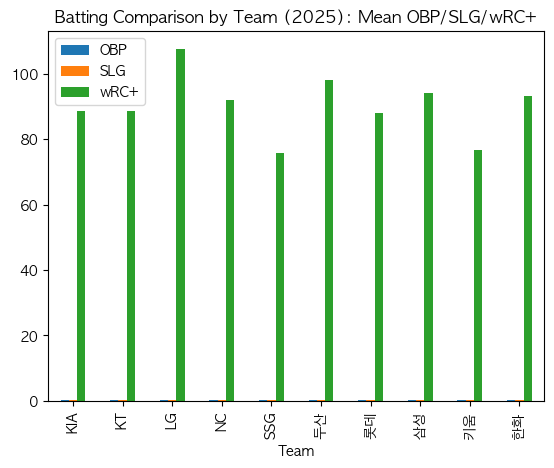

In [38]:
# 2025 팀 비교 막대그래프(한 번에)
team_mean_2025.plot(kind='bar', title='Batting Comparison by Team (2025): Mean OBP/SLG/wRC+')
plt.show()


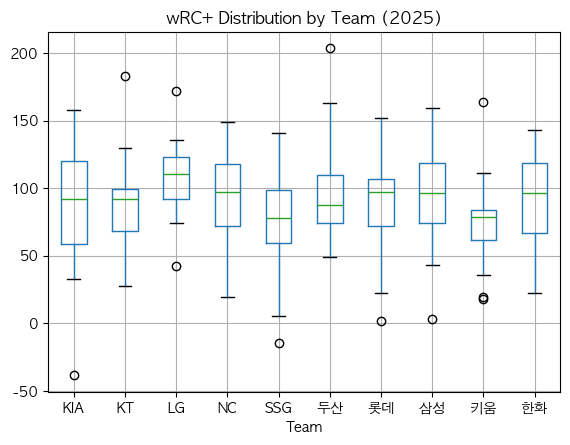

In [39]:
bat_2025.boxplot(column='wRC+', by='Team')
plt.title('wRC+ Distribution by Team (2025)')
plt.suptitle('')
plt.show()


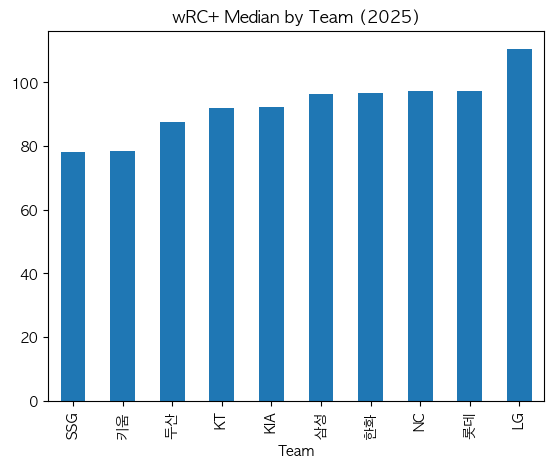

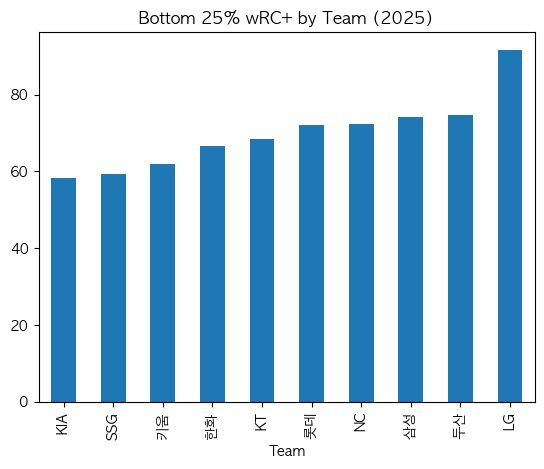

In [40]:
bat_2025.groupby('Team')['wRC+'].median().sort_values().plot(
    kind='bar', title='wRC+ Median by Team (2025)'
)
plt.show()

bat_2025.groupby('Team')['wRC+'].quantile(0.25).sort_values().plot(
    kind='bar', title='Bottom 25% wRC+ by Team (2025)'
)
plt.show()


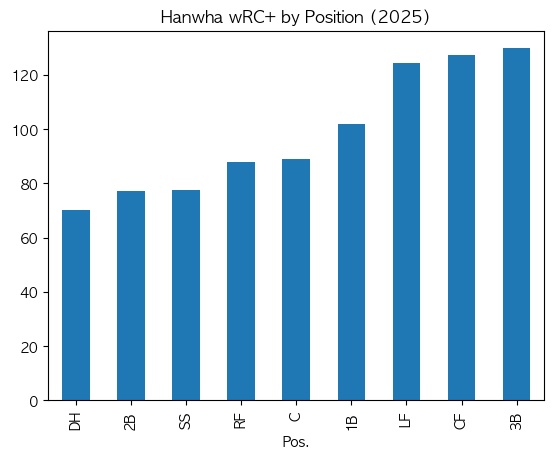

In [41]:
hanwha_2025 = hanwha_bat[hanwha_bat['Year'] == YEAR].copy()

hanwha_2025.groupby('Pos.')['wRC+'].mean().sort_values().plot(
    kind='bar', title='Hanwha wRC+ by Position (2025)'
)
plt.show()


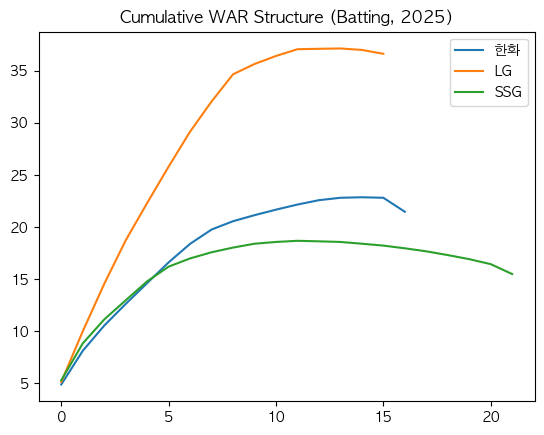

In [42]:
def plot_cum_war(df, team):
    temp = df[df['Team'] == team].sort_values('WAR', ascending=False).copy()
    temp['cum_WAR'] = temp['WAR'].cumsum()
    plt.plot(temp['cum_WAR'].values, label=team)

for t in ['한화', 'LG', 'SSG']:
    plot_cum_war(bat_2025, t)

plt.legend()
plt.title('Cumulative WAR Structure (Batting, 2025)')
plt.show()


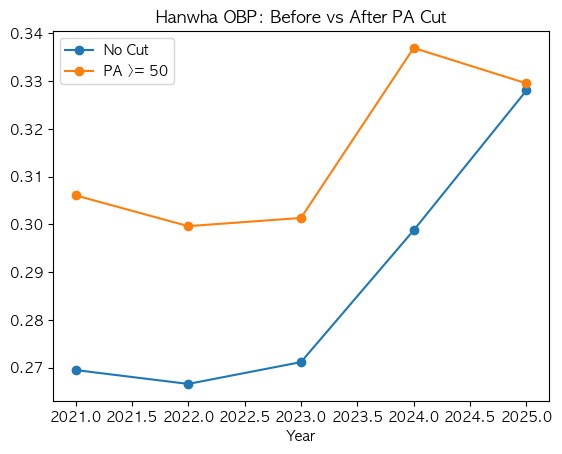

In [43]:
# 컷 적용 전후 비교 (OBP 예시)
hanwha_raw = bat_raw[(bat_raw['Team'] == TEAM) & (bat_raw['Year'].isin(years))].copy()

# 전: 컷 없음
hanwha_raw.groupby('Year')['OBP'].mean().plot(marker='o', label='No Cut')

# 후: 컷 적용(PA >= BAT_PA_CUT)
hanwha_bat.groupby('Year')['OBP'].mean().plot(marker='o', label=f'PA >= {BAT_PA_CUT}')

plt.legend()
plt.title('Hanwha OBP: Before vs After PA Cut')
plt.show()


---
### 03_team_EDA_best_season_key_metrics.ipynb
목적:
- 각 팀이 성과가 가장 좋았던 시즌(최고 성과 연도)에서
   어떤 지표들이 특히 높았는지(TOP 3~7)를 팀별로 정리하는 EDA

주의:
- 가설 설정/결론 도출/원인 규명은 이 파일에서 하지 않음
- "관찰 결과 공유" 목적의 정리용 노트북

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [45]:
# 분석 범위
teams = ['한화', 'LG', 'KIA', 'SSG']
years = [2023, 2024, 2025]

# 컷 기준(표본 안정성)
BAT_PA_CUT = 50
PITCH_IP_CUT = 30

# 전처리된 데이터 로드 (전처리 재현은 02에서 수행)
bat = pd.read_csv('../data/processed/bat_analysis_pa50_2023_2025.csv')
pitch = pd.read_csv('../data/processed/pitch_analysis_ip30_2023_2025.csv')

# 혹시 파일에 다른 팀/연도가 섞여 있을 경우를 대비해 한 번 더 필터링(안전장치)
bat = bat[bat['Team'].isin(teams) & bat['Year'].isin(years)].copy()
pitch = pitch[pitch['Team'].isin(teams) & pitch['Year'].isin(years)].copy()

print("bat:", bat.shape, "| pitch:", pitch.shape)


bat: (217, 39) | pitch: (180, 42)


In [46]:
# 팀 대표 컬러
TEAM_COLORS = {
    '한화': '#FC4E00',
    'LG': '#C30452',
    'KIA': '#EA0029',
    'SSG': '#CE0E2D'
}

# 단위/스케일이 다른 지표는 한 그래프에 섞지 않는 게 원칙
# - rate: 0~1 근처 (OBP 등)
# - count/scale: HR, WAR, wRC+ 등 스케일이 다름

bat_rate_cols = ['OBP', 'SLG']        # 비율
bat_scale_cols = ['wRC+', 'WAR']      # 스케일 다름

pit_run_cols = ['ERA', 'FIP']         # 낮을수록 좋음(방향 주의)
pit_scale_cols = ['WAR']              # 높을수록 좋음


In [47]:
def yearly_mean(df, team, cols):
    """특정 팀의 연도별 평균 테이블 반환"""
    return (df[df['Team'] == team]
            .groupby('Year')[cols]
            .mean())

def plot_yearly_lines(team, bat_year, pit_year):
    """팀별 연도 트렌드(타/투)를 과하지 않게 핵심만 시각화"""
    # Batting: OBP/SLG 같이(둘 다 rate), wRC+/WAR는 따로
    temp = bat_year.copy()
    temp.index = temp.index.astype(str)

    temp[bat_rate_cols].plot(marker='o', title=f'{team} Batting (Rate): OBP & SLG',
                             color=[TEAM_COLORS[team], '#999999'])
    plt.ylabel('Rate')
    plt.show()

    temp['wRC+'].plot(marker='o', title=f'{team} Batting: wRC+',
                      color=TEAM_COLORS[team])
    plt.ylabel('wRC+')
    plt.show()

    temp['WAR'].plot(marker='o', title=f'{team} Batting: WAR',
                     color=TEAM_COLORS[team])
    plt.ylabel('WAR')
    plt.show()

    # Pitching: ERA/FIP (낮을수록 좋음) 같이 그리고 y축 반전
    temp2 = pit_year.copy()
    temp2.index = temp2.index.astype(str)

    temp2[pit_run_cols].plot(marker='o', title=f'{team} Pitching: ERA & FIP',
                             color=[TEAM_COLORS[team], '#999999'])
    plt.gca().invert_yaxis()
    plt.ylabel('Runs (Lower is Better)')
    plt.show()

    temp2['WAR'].plot(marker='o', title=f'{team} Pitching: WAR',
                      color=TEAM_COLORS[team])
    plt.ylabel('WAR')
    plt.show()


In [48]:
def pick_best_year_by_war(bat_year, pit_year, w_bat=0.5, w_pit=0.5):
    """
    베스트 시즌 산정:
    - 타자 WAR(연도별 평균) + 투수 WAR(연도별 평균)의 가중 합이 최대인 연도 선택
    """
    score = (w_bat * bat_year['WAR']) + (w_pit * pit_year['WAR'])
    return int(score.idxmax())

def top_metrics_in_best_year(bat_year, pit_year, best_year, top_n=5):
    """
    베스트 시즌에서 '평균값이 가장 큰 지표' TOP N을 반환
    ※ ERA/FIP는 낮을수록 좋은 지표라 방향을 반대로 처리해야 함
    """
    # 타격: 값이 클수록 좋은 지표 기준(OBP/SLG/wRC+/WAR)
    bat_row = bat_year.loc[best_year, ['OBP','SLG','wRC+','WAR']]
    bat_top = bat_row.sort_values(ascending=False).head(top_n)

    # 투구: WAR는 클수록 좋지만, ERA/FIP는 작을수록 좋음
    pit_row = pit_year.loc[best_year, ['ERA','FIP','WAR']].copy()
    pit_rank_value = pit_row.copy()
    pit_rank_value[['ERA','FIP']] = -pit_rank_value[['ERA','FIP']]  # 낮을수록 좋으니 부호 반전
    pit_top = pit_rank_value.sort_values(ascending=False).head(top_n)

    # 보기 좋게 원래 값도 같이 반환
    pit_top_original = pit_row[pit_top.index]

    return bat_top, pit_top_original


OBP       SLG       wRC+       WAR
Year                                         
2023  0.301350  0.316850  71.675000  0.800500
2024  0.336952  0.373619  85.457143  0.646667
2025  0.329529  0.375941  93.294118  1.262353

ERA       FIP       WAR
Year                              
2023  4.414118  4.244118  0.811176
2024  4.976667  4.865000  1.016667
2025  3.646429  3.836429  2.212143

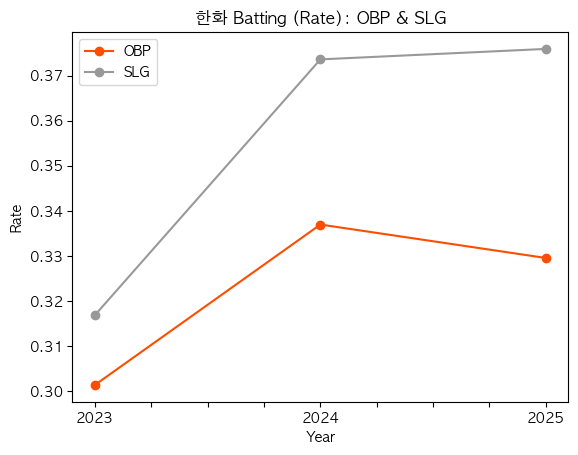

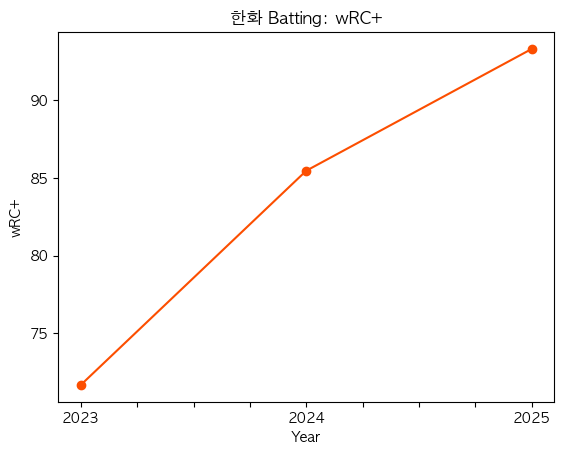

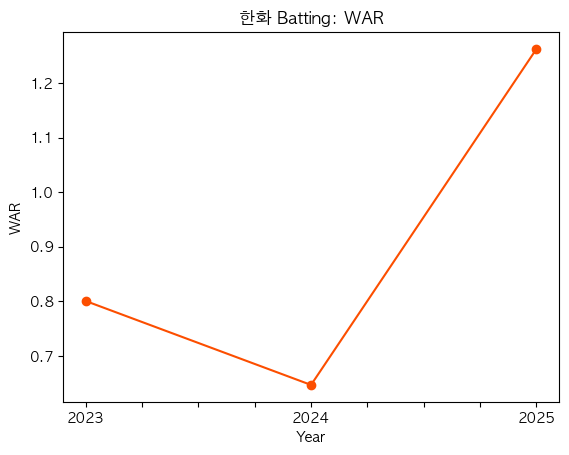

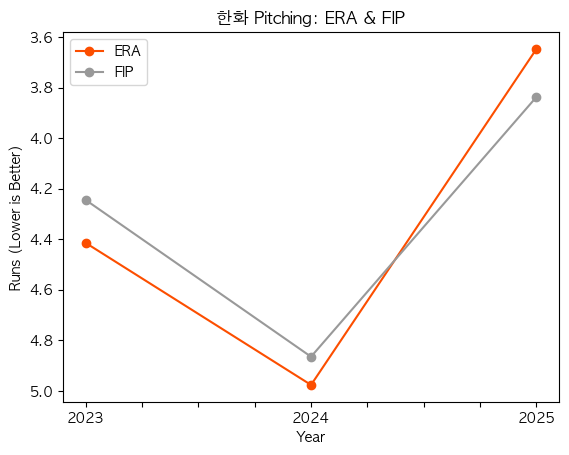

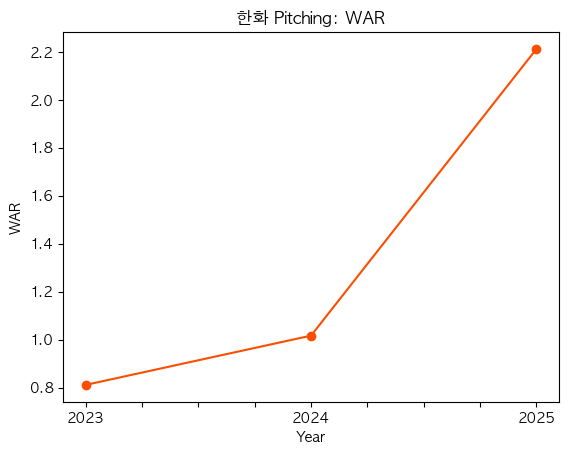

OBP       SLG        wRC+       WAR
Year                                          
2023  0.343643  0.376786  106.721429  2.548571
2024  0.346429  0.378286   93.500000  2.226429
2025  0.345062  0.393062  107.637500  2.288750

ERA       FIP       WAR
Year                              
2023  3.605625  3.924375  1.416250
2024  4.505833  4.584167  1.625833
2025  3.735714  4.025714  1.790714

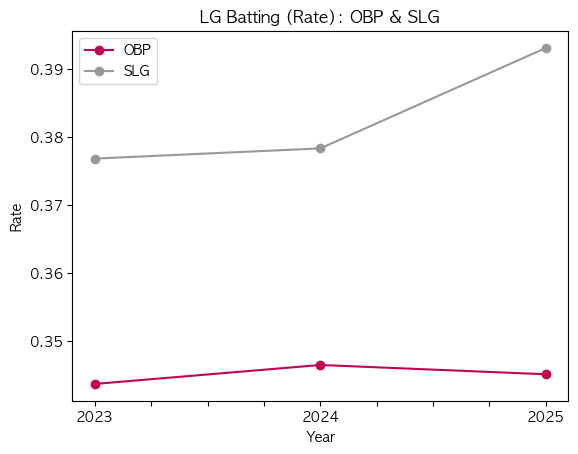

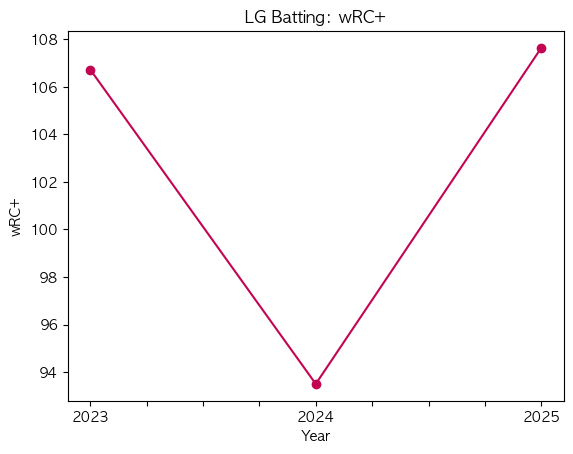

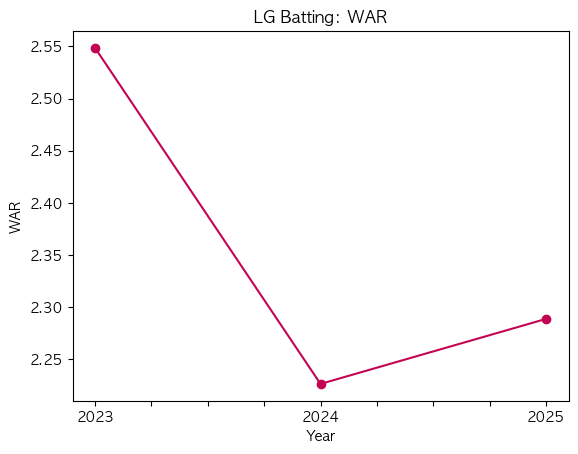

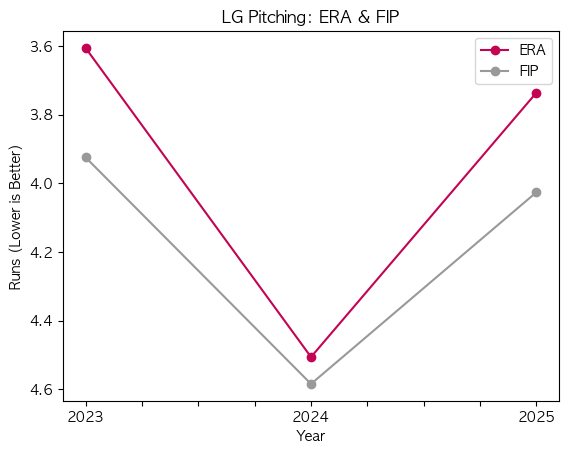

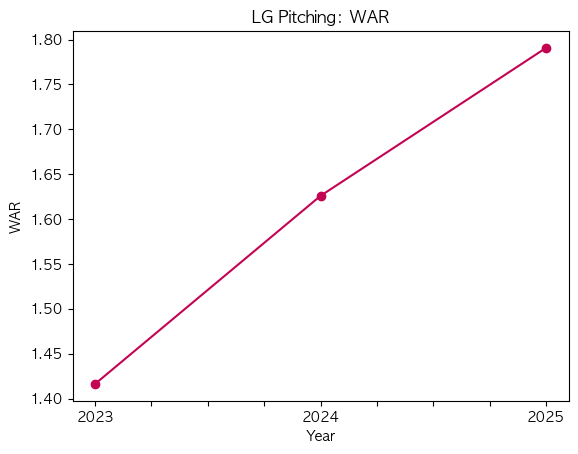

OBP       SLG        wRC+       WAR
Year                                          
2023  0.330316  0.367421   97.126316  1.404211
2024  0.360187  0.429063  105.581250  1.828750
2025  0.318609  0.362261   88.669565  0.930435

ERA       FIP       WAR
Year                              
2023  4.116250  4.420000  1.164375
2024  4.413529  4.735294  1.340588
2025  4.666429  4.432143  1.139286

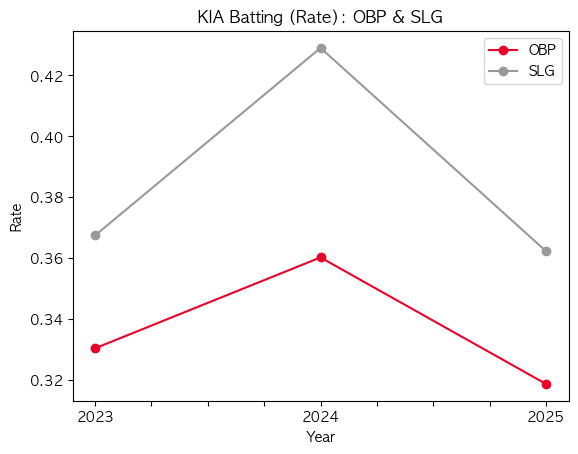

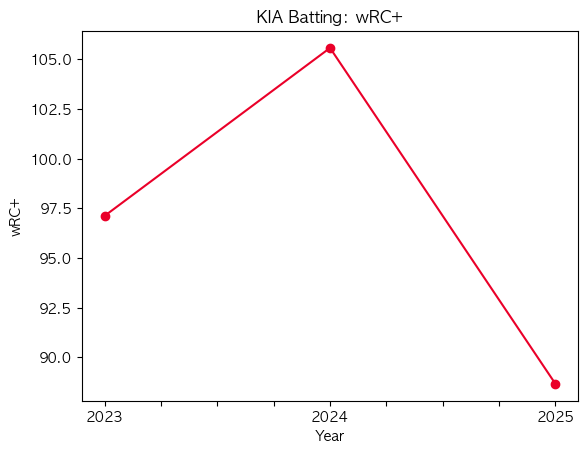

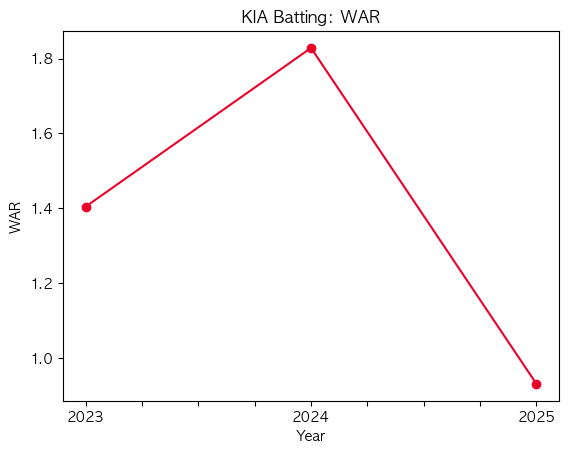

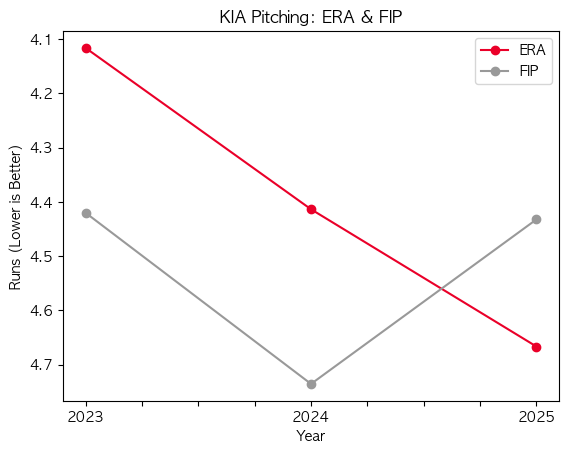

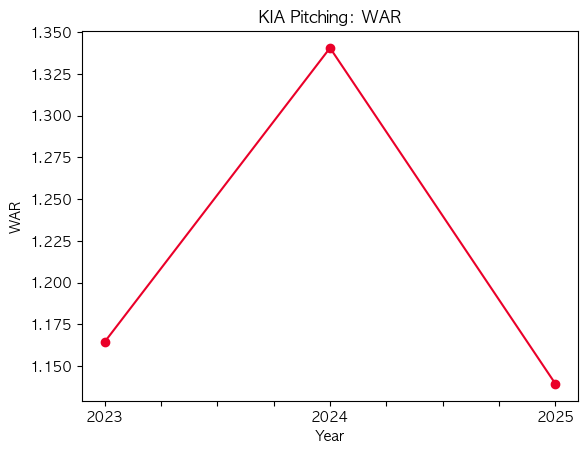

OBP       SLG       wRC+       WAR
Year                                         
2023  0.326389  0.370556  92.283333  1.294444
2024  0.322706  0.368941  75.335294  0.929412
2025  0.305409  0.351091  75.886364  0.703636

ERA       FIP       WAR
Year                              
2023  4.420667  4.523333  1.106000
2024  5.072308  5.059231  1.442308
2025  3.600000  4.075714  2.089286

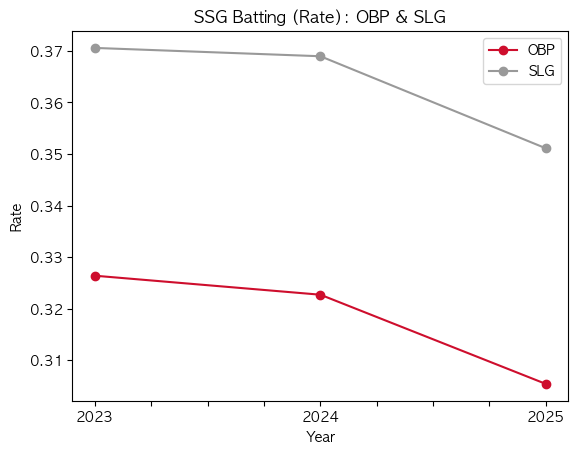

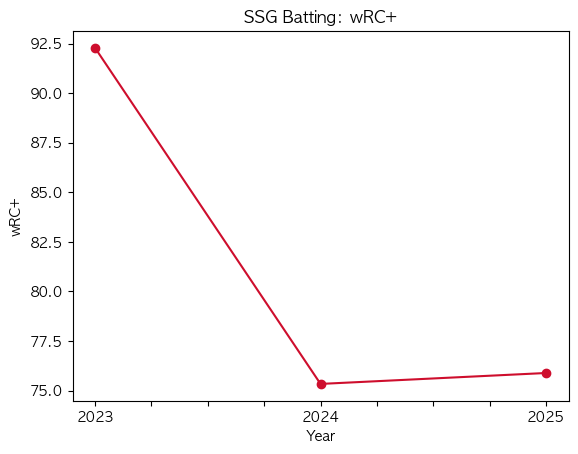

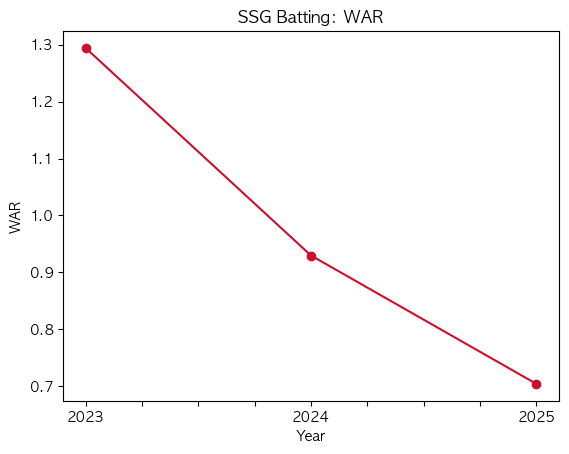

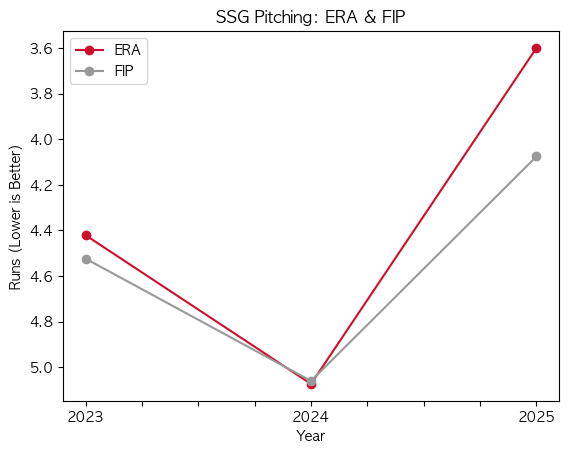

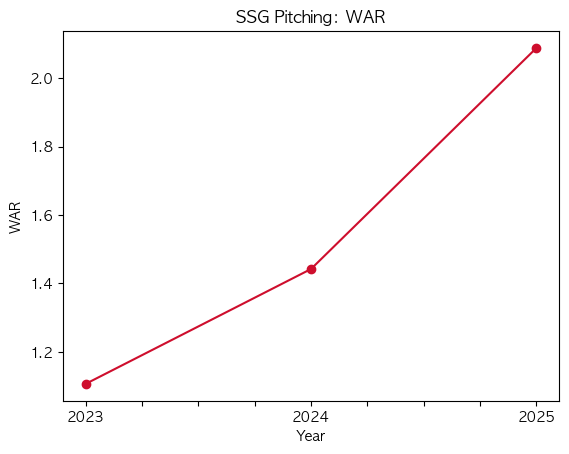

Team  BestYear   Batting_TopMetrics Pitching_TopMetrics
0   한화      2025  wRC+, WAR, SLG, OBP       WAR, ERA, FIP
1   LG      2025  wRC+, WAR, SLG, OBP       WAR, ERA, FIP
2  KIA      2024  wRC+, WAR, SLG, OBP       WAR, ERA, FIP
3  SSG      2025  wRC+, WAR, SLG, OBP       WAR, ERA, FIP

In [49]:
summary_rows = []

for team in teams:
    # 연도별 평균 테이블
    bat_year = yearly_mean(bat, team, ['OBP','SLG','wRC+','WAR'])
    pit_year = yearly_mean(pitch, team, ['ERA','FIP','WAR'])

    display(bat_year)
    display(pit_year)

    # 트렌드 그래프(팀별 반복을 함수로 처리)
    plot_yearly_lines(team, bat_year, pit_year)

    # 베스트 시즌 산정
    best_year = pick_best_year_by_war(bat_year, pit_year)

    # 베스트 시즌 TOP 지표
    bat_top, pit_top = top_metrics_in_best_year(bat_year, pit_year, best_year, top_n=7)

    # 요약(표 만들기)
    summary_rows.append({
        'Team': team,
        'BestYear': best_year,
        'Batting_TopMetrics': ', '.join(bat_top.index.tolist()),
        'Pitching_TopMetrics': ', '.join(pit_top.index.tolist())
    })

summary_df = pd.DataFrame(summary_rows)
summary_df


In [50]:
# 팀별 TopMetrics에서 자주 등장하는 지표를 집계(“공통 핵심지표 후보”)
from collections import Counter

bat_counter = Counter()
pit_counter = Counter()

for _, row in summary_df.iterrows():
    for m in row['Batting_TopMetrics'].split(', '):
        bat_counter[m] += 1
    for m in row['Pitching_TopMetrics'].split(', '):
        pit_counter[m] += 1

bat_counter, pit_counter


(Counter({'wRC+': 4, 'WAR': 4, 'SLG': 4, 'OBP': 4}),
 Counter({'WAR': 4, 'ERA': 4, 'FIP': 4}))

---
### 04_team_win_rate_2022_2025.ipynb
목적:
- KBO 공식 사이트에서 연도별 팀 순위/승률(정규시즌) 데이터를 Selenium으로 수집
- 2021~2025(또는 필요 범위) 데이터를 CSV로 저장해 이후 분석에 결합
- 저장 후 승률 변화 라인차트(4팀/10팀/특정팀 강조)로 빠르게 확인

In [51]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
import time
import os
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [52]:
URL = "https://www.koreabaseball.com/Record/TeamRank/TeamRank.aspx"

YEARS = [2021, 2022, 2023, 2024, 2025]

# 4팀만 볼지, 10팀 전부 저장할지 선택
FILTER_TEAMS = False
TARGET_TEAMS = ["한화", "LG", "KIA", "SSG"]

# 출력 경로 (10팀 저장이면 파일명도 10teams로)
OUTPUT_PATH = "../data/team_rank_2021_2025_10teams.csv"


In [53]:
driver = webdriver.Chrome()
driver.maximize_window()
driver.get(URL)

wait = WebDriverWait(driver, 10)


In [ ]:
def find_year_select(driver):
    """
    페이지의 <select> 중 YEARS가 옵션으로 들어있는 드롭다운을 찾아 반환.
    (id/name이 바뀌어도 최대한 잡히게 넓게 탐색)
    """
    selects = driver.find_elements(By.CSS_SELECTOR, "select")
    for el in selects:
        try:
            sel = Select(el)
            opts = [o.text.strip() for o in sel.options]
            if any(str(y) in opts for y in YEARS):
                return sel
        except Exception:
            pass
    raise RuntimeError("연도 선택(select) 요소를 찾지 못함. (페이지 구조 변경 가능)")


In [55]:
def scrape_one_year(year: int):
    # 1) 연도 변경
    year_select = find_year_select(driver)
    year_select.select_by_visible_text(str(year))

    # 2) 테이블 로딩 대기 (sleep만 쓰면 가끔 실패해서 wait를 같이 둠)
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody tr")))
    time.sleep(0.5)

    # 3) 테이블 행 수집
    rows = driver.find_elements(
        By.CSS_SELECTOR,
        "#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr"
    )

    data = []
    for r in rows:
        tds = r.find_elements(By.TAG_NAME, "td")
        if len(tds) < 12:
            continue

        team = tds[1].text.strip()

        # 옵션: 특정 팀만 수집
        if FILTER_TEAMS and team not in TARGET_TEAMS:
            continue

        data.append({
            "year": year,
            "순위": tds[0].text.strip(),
            "팀명": team,
            "경기": tds[2].text.strip(),
            "승": tds[3].text.strip(),
            "패": tds[4].text.strip(),
            "무": tds[5].text.strip(),
            "승률": tds[6].text.strip(),
            "게임차": tds[7].text.strip(),
            "최근10경기": tds[8].text.strip(),
            "연속": tds[9].text.strip(),
            "홈": tds[10].text.strip(),
            "방문": tds[11].text.strip(),
        })

    return data


In [56]:
all_rows = []
for y in YEARS:
    yearly = scrape_one_year(y)
    print(f"{y} rows:", len(yearly))
    all_rows.extend(yearly)

df = pd.DataFrame(all_rows)

# 숫자형 변환 (분석 편의)
for c in ["순위", "경기", "승", "패", "무"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["승률"] = pd.to_numeric(df["승률"], errors="coerce")
df["게임차"] = pd.to_numeric(df["게임차"], errors="coerce")

df = df.sort_values(["year", "순위"]).reset_index(drop=True)

# 저장 폴더 생성
out_dir = os.path.dirname(OUTPUT_PATH)
if out_dir and not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)

df.to_csv(OUTPUT_PATH, encoding="utf-8-sig", index=False)
print("✅ 저장 완료:", OUTPUT_PATH)

display(df.head(20))


2021 rows: 10
2022 rows: 10
2023 rows: 10
2024 rows: 10
2025 rows: 10
✅ 저장 완료: ../data/team_rank_2021_2025_10teams.csv


year  순위   팀명   경기   승   패   무     승률   게임차  최근10경기  연속        홈        방문
0   2021   1   KT  144  76  59   9  0.563   0.0  3승1무6패  1승  41-7-24   35-2-35
1   2021   2   두산  144  71  65   8  0.522   5.5  5승2무3패  2승  35-6-31   36-2-34
2   2021   3   삼성  144  76  59   9  0.563   0.0  6승1무3패  1승  42-4-26   34-5-33
3   2021   4   LG  144  72  58  14  0.554   1.5  3승5무2패  1패  40-3-29  32-11-29
4   2021   5   키움  144  70  67   7  0.511   7.0  6승1무3패  3승  42-4-26   28-3-41
5   2021   6  SSG  144  66  64  14  0.508   7.5  4승2무4패  1패  37-8-27   29-6-37
6   2021   7   NC  144  67  68   9  0.496   9.0  4승1무5패  1패  36-2-34   31-7-34
7   2021   8   롯데  144  65  71   8  0.478  11.5  4승2무4패  1승  31-5-36   34-3-35
8   2021   9  KIA  144  58  76  10  0.433  17.5  5승0무5패  2패  31-4-37   27-6-39
9   2021  10   한화  144  49  83  12  0.371  25.5  2승2무6패  6패  25-7-40   24-5-43
10  2022   1  SSG  144  88  52   4  0.629   0.0  4승0무6패  4패  49-0-23   39-4-29
11  2022   2   키움  144  80  62   2  0.563   9.0  5승0무5패  1승  39-1-32   41-1-30
12  2022   3   LG  144  87  55   2  0.613   2.0  4승0무6패  1승  38-1-33   49-1-22
13  2022   4   KT  144  80  62   2  0.563   9.0  7승0무3패  1패  40-1-31   40-1-31
14  2022   5  KIA  144  70  73   1  0.490  19.5  7승0무3패  1패  31-0-41   39-1-32
15  2022   6   NC  144  67  74   3  0.475  21.5  6승0무4패  1패  35-3-34   32-0-40
16  2022   7   삼성  144  66  76   2  0.465  23.0  6승0무4패  2승  33-2-37   33-0-39
17  2022   8   롯데  144  64  76   4  0.457  24.0  5승0무5패  1승  27-3-42   37-1-34
18  2022   9   두산  144  60  82   2  0.423  29.0  4승0무6패  2패  29-1-42   31-1-40
19  2022  10   한화  144  46  96   2  0.324  43.0  3승0무7패  1패  28-0-44   18-2-52

In [57]:
driver.quit()

In [58]:
TEAM_COLORS = { 
    '한화': '#FC4E00', 
    'LG': '#C30452', 
    'KIA': '#EA0029', 
    'SSG': '#CE0E2D',
    '삼성':'#074CA1', 
    'NC':'#315288', 
    'KT':'#000000', 
    '롯데':'#041E42', 
    '두산':'#1A1748',
    '키움':'#570514'
}

PATH = OUTPUT_PATH  # 방금 저장한 경로 그대로 사용
PLOT_YEARS = [2022, 2023, 2024, 2025]  # 시각화 구간은 원하는 대로
FOCUS_TEAMS = ["한화", "LG", "KIA", "SSG"]

df_plot = pd.read_csv(PATH, encoding="utf-8-sig")
df_plot["year"] = pd.to_numeric(df_plot["year"], errors="coerce")
df_plot["승률"] = pd.to_numeric(df_plot["승률"], errors="coerce")

df_plot = df_plot[df_plot["year"].isin(PLOT_YEARS)].copy()


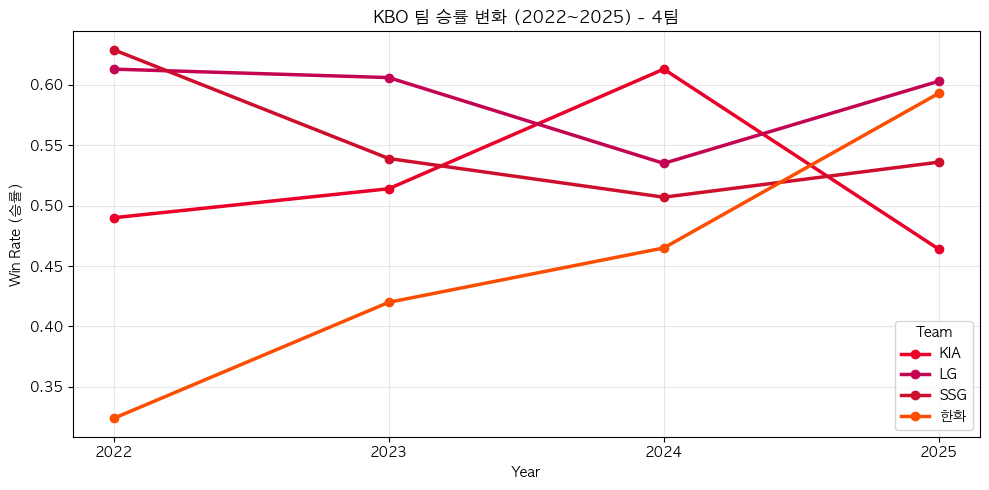

In [59]:
df_4 = df_plot[df_plot["팀명"].isin(FOCUS_TEAMS)].copy()

plt.figure(figsize=(10, 5))
for team, g in df_4.groupby("팀명"):
    g = g.sort_values("year")
    plt.plot(
        g["year"], g["승률"],
        marker="o",
        linewidth=2.5,
        label=team,
        color=TEAM_COLORS.get(team, None)
    )

plt.title("KBO 팀 승률 변화 (2022~2025) - 4팀")
plt.xlabel("Year")
plt.ylabel("Win Rate (승률)")
plt.xticks(PLOT_YEARS)
plt.grid(True, alpha=0.3)
plt.legend(title="Team")
plt.tight_layout()
plt.show()


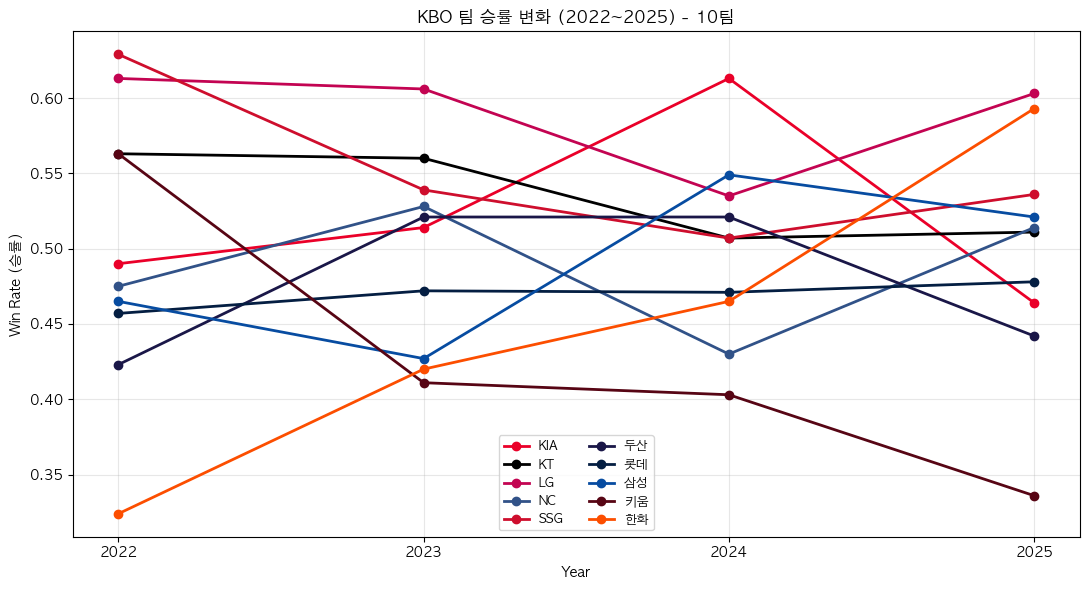

In [60]:
plt.figure(figsize=(11, 6))
for team, g in df_plot.groupby("팀명"):
    g = g.sort_values("year")
    plt.plot(
        g["year"], g["승률"],
        marker="o",
        linewidth=2,
        label=team,
        color=TEAM_COLORS.get(team, None)
    )

plt.title("KBO 팀 승률 변화 (2022~2025) - 10팀")
plt.xlabel("Year")
plt.ylabel("Win Rate (승률)")
plt.xticks(PLOT_YEARS)
plt.grid(True, alpha=0.3)
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()


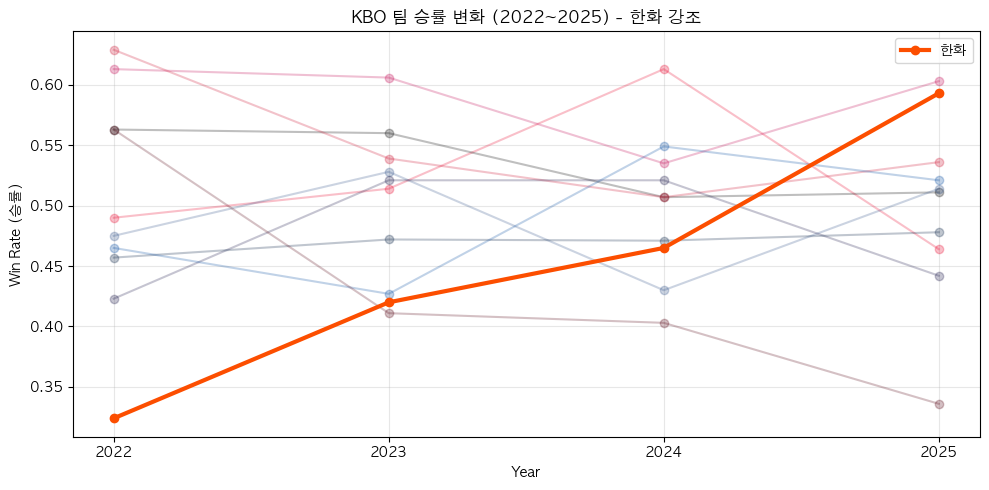

In [61]:
focus = "한화"

plt.figure(figsize=(10, 5))
for team, g in df_plot.groupby("팀명"):
    g = g.sort_values("year")
    is_focus = (team == focus)

    plt.plot(
        g["year"], g["승률"],
        marker="o",
        linewidth=3 if is_focus else 1.5,
        alpha=1.0 if is_focus else 0.25,
        label=team if is_focus else None,
        color=TEAM_COLORS.get(team, None)
    )

plt.title(f"KBO 팀 승률 변화 (2022~2025) - {focus} 강조")
plt.xlabel("Year")
plt.ylabel("Win Rate (승률)")
plt.xticks(PLOT_YEARS)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


---
### 05_hypothesis_test_win_rate.ipynb
목적:
- 팀 지표(타격/투구)가 팀 승률(win_rate)과 어떤 관계가 있는지 검증(상관 + 단순회귀)
- 가설(6개):
   1) OBP ↑  -> win_rate ↑
   2) SLG ↑  -> win_rate ↑
   3) wRC+ ↑ -> win_rate ↑
   4) WAR_total ↑ -> win_rate ↑
   5) ERA ↓ -> win_rate ↑
   6) FIP ↓ -> win_rate ↑

주의:
- 본 데이터는 "선수 시즌 데이터"를 팀-연도(team-year)로 집계한 값임
- OBP/SLG/wRC+는 평균(mean), WAR은 합(sum)으로 집계(프로젝트 합의 방식)
- 이후 필요 시 팀 공식값(재계산/가중평균)으로 개선 가능

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [63]:
BAT_PATH = "../data/processed/bat_analysis_pa50_2021_2025.csv"
PITCH_PATH = "../data/processed/pitch_analysis_ip30_2021_2025.csv"

# ⚠️ win_rate 파일은 저장한 이름이 여러 개라 헷갈릴 수 있음
# - 여기서는 "team, year, win_rate" 컬럼이 있는 파일을 사용한다고 가정
WIN_PATH = "../data/team_win_rate_2022_2025.csv"

bat = pd.read_csv(BAT_PATH)
pitch = pd.read_csv(PITCH_PATH)
win = pd.read_csv(WIN_PATH)

print("bat:", bat.shape, "pitch:", pitch.shape, "win:", win.shape)

bat: (370, 39) pitch: (300, 42) win: (16, 3)


In [64]:
# -----------------------------
# (1) 타격 팀 지표
# -----------------------------
bat_team = (
    bat.groupby(["Year", "Team"], as_index=False)
       .agg(
           OBP=("OBP", "mean"),
           SLG=("SLG", "mean"),
           wRC_plus=("wRC+", "mean"),
           WAR_bat=("WAR", "sum"),
       )
)

# -----------------------------
# (2) 투구 팀 지표
# -----------------------------
pitch_team = (
    pitch.groupby(["Year", "Team"], as_index=False)
         .agg(
             ERA=("ERA", "mean"),
             FIP=("FIP", "mean"),
             WAR_pitch=("WAR", "sum"),
         )
)

# -----------------------------
# (3) 타/투 병합
# -----------------------------
team_metric = bat_team.merge(pitch_team, on=["Year", "Team"], how="inner")

# 컬럼명 통일
team_metric = team_metric.rename(columns={"Year": "year", "Team": "team"})

# 총 WAR
team_metric["WAR_total"] = team_metric["WAR_bat"].fillna(0) + team_metric["WAR_pitch"].fillna(0)

team_metric.head()


year team       OBP       SLG    wRC_plus  WAR_bat       ERA       FIP  \
0  2021  KIA  0.336222  0.310778   81.494444    12.41  5.104118  5.012353   
1  2021   LG  0.323889  0.353333   89.272222    23.71  3.403750  3.914375   
2  2021  SSG  0.339474  0.409632  100.600000    29.08  4.560667  4.774667   
3  2021   한화  0.306080  0.308800   68.064000    15.40  4.411538  4.640769   
4  2022  KIA  0.328412  0.371765   97.470588    30.72  4.008462  4.010000   

   WAR_pitch  WAR_total  
0      13.24      25.65  
1      24.90      48.61  
2      15.71      44.79  
3      15.50      30.90  
4      18.65      49.37

In [65]:
# win 데이터 컬럼명이 다를 수 있어 안전하게 맞춤
# (예: year/team/win_rate 형태로 통일)
rename_map = {}
if "Year" in win.columns: rename_map["Year"] = "year"
if "Team" in win.columns: rename_map["Team"] = "team"
win = win.rename(columns=rename_map)

# win_rate 컬럼명도 케이스 대응
# (승률, win_rate 등)
if "승률" in win.columns and "win_rate" not in win.columns:
    win = win.rename(columns={"승률": "win_rate"})

df = team_metric.merge(win[["year", "team", "win_rate"]], on=["year", "team"], how="inner")

print("merged df:", df.shape)
df.head()


merged df: (16, 11)


year team       OBP       SLG   wRC_plus  WAR_bat       ERA       FIP  \
0  2022  KIA  0.328412  0.371765  97.470588    30.72  4.008462  4.010000   
1  2022   LG  0.321526  0.371211  98.678947    32.43  3.137500  3.750000   
2  2022  SSG  0.320833  0.377444  92.461111    29.31  3.923846  4.166154   
3  2022   한화  0.299632  0.330737  75.021053    14.70  4.698235  4.514706   
4  2023  KIA  0.330316  0.367421  97.126316    26.68  4.116250  4.420000   

   WAR_pitch  WAR_total  win_rate  
0      18.65      49.37     0.490  
1      26.66      59.09     0.613  
2      25.32      54.63     0.629  
3       7.11      21.81     0.324  
4      18.63      45.31     0.514

In [66]:
# 결측치 확인
df.isna().sum().sort_values(ascending=False)

year         0
team         0
OBP          0
SLG          0
wRC_plus     0
WAR_bat      0
ERA          0
FIP          0
WAR_pitch    0
WAR_total    0
win_rate     0
dtype: int64

In [67]:
# team-year 개수 확인(보통 10팀 * 연도수)
df[["year", "team"]].drop_duplicates().shape

(16, 2)

In [68]:
hyp_cols = ["OBP", "SLG", "wRC_plus", "WAR_total", "ERA", "FIP"]
target = "win_rate"

# (1) 상관계수
corr_series = (
    df[[target] + hyp_cols]
    .corr(numeric_only=True)[target]
    .drop(target)
    .sort_values(ascending=False)
)
corr_series


WAR_total    0.909901
SLG          0.731321
wRC_plus     0.716202
OBP          0.607661
FIP         -0.397196
ERA         -0.625989
Name: win_rate, dtype: float64

In [69]:
# (2) 단순회귀: win_rate = a + b * metric
results = []
for xcol in hyp_cols:
    temp = df[[target, xcol]].dropna()

    X = sm.add_constant(temp[xcol].astype(float))
    y = temp[target].astype(float)

    model = sm.OLS(y, X).fit()

    results.append({
        "metric": xcol,
        "n": len(temp),
        "coef": float(model.params[xcol]),
        "p_value": float(model.pvalues[xcol]),
        "r2": float(model.rsquared),
    })

reg_result = pd.DataFrame(results).sort_values("p_value")
reg_result["support"] = reg_result["p_value"].apply(lambda p: "지지(유의)" if p < 0.05 else "미지지/약함")
reg_result


metric   n      coef   p_value        r2 support
3  WAR_total  16  0.006507  0.000001  0.827920  지지(유의)
1        SLG  16  2.484264  0.001285  0.534830  지지(유의)
2   wRC_plus  16  0.005134  0.001803  0.512945  지지(유의)
4        ERA  16 -0.094819  0.009485  0.391862  지지(유의)
0        OBP  16  3.016834  0.012528  0.369252  지지(유의)
5        FIP  16 -0.086966  0.127662  0.157765  미지지/약함

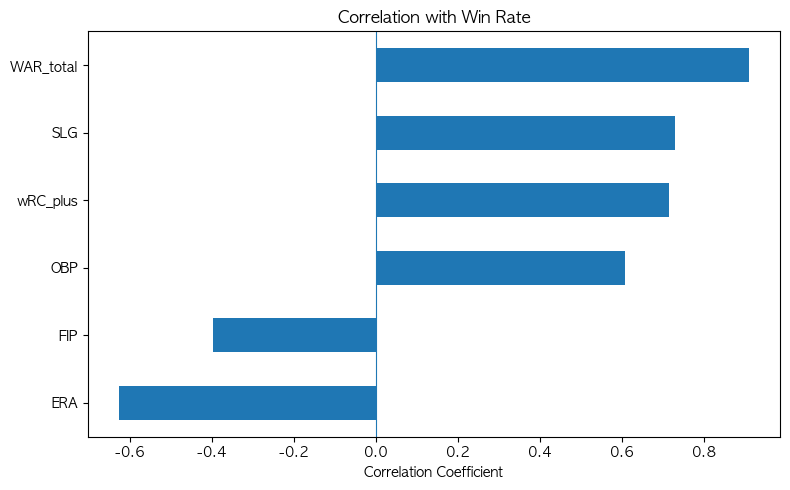

In [70]:
plt.figure(figsize=(8, 5))
corr_series.sort_values().plot(kind="barh")
plt.axvline(0, linewidth=0.8)
plt.title("Correlation with Win Rate")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


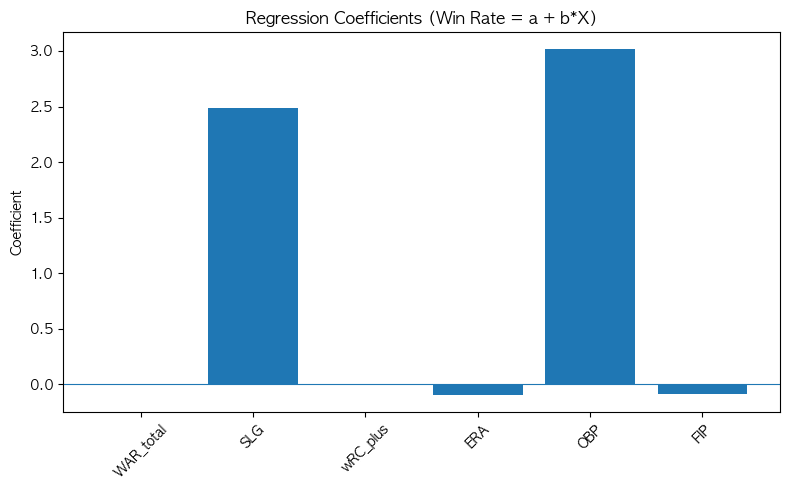

In [71]:
plt.figure(figsize=(8, 5))
plt.bar(reg_result["metric"], reg_result["coef"])
plt.axhline(0, linewidth=0.8)
plt.title("Regression Coefficients (Win Rate = a + b*X)")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [72]:
hanwha = df[df["team"] == "한화"].sort_values("year")
hanwha[["year", "win_rate"] + hyp_cols]

year  win_rate       OBP       SLG   wRC_plus  WAR_total       ERA  \
3   2022     0.324  0.299632  0.330737  75.021053      21.81  4.698235   
7   2023     0.420  0.301350  0.316850  71.675000      29.80  4.414118   
11  2024     0.465  0.336952  0.373619  85.457143      31.88  4.976667   
15  2025     0.593  0.329529  0.375941  93.294118      52.43  3.646429   

         FIP  
3   4.514706  
7   4.244118  
11  4.865000  
15  3.836429

In [73]:
def zscore(x):
    x = np.asarray(x, dtype=float)
    return (x - x.mean()) / x.std(ddof=0)

scaled_results = []
for col in hyp_cols:
    temp = df[[col, target]].dropna()

    X = zscore(temp[col])
    y = temp[target].astype(float)

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    scaled_results.append({
        "metric": col,
        "std_coef": float(model.params.iloc[1]),
        "p_value": float(model.pvalues.iloc[1]),
        "r2": float(model.rsquared),
    })

scaled_df = pd.DataFrame(scaled_results).sort_values("p_value")
scaled_df


metric  std_coef   p_value        r2
3  WAR_total  0.073445  0.000001  0.827920
1        SLG  0.059030  0.001285  0.534830
2   wRC_plus  0.057810  0.001803  0.512945
4        ERA -0.050528  0.009485  0.391862
0        OBP  0.049049  0.012528  0.369252
5        FIP -0.032061  0.127662  0.157765

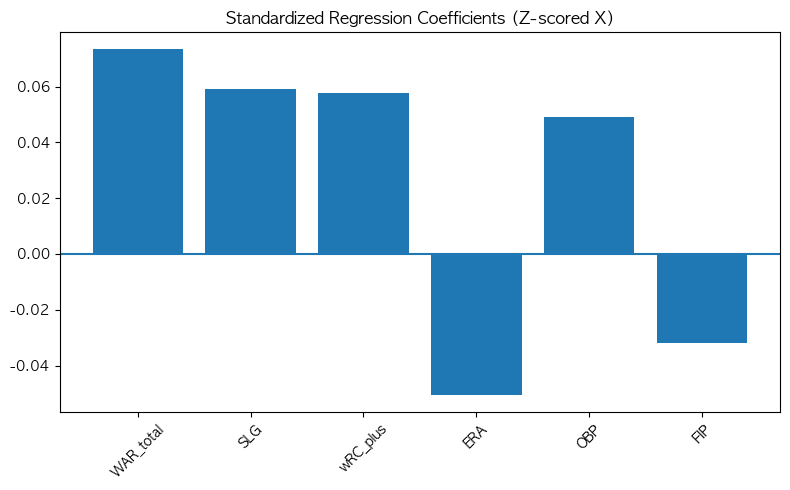

In [74]:
plt.figure(figsize=(8, 5))
plt.bar(scaled_df["metric"], scaled_df["std_coef"])
plt.axhline(0)
plt.title("Standardized Regression Coefficients (Z-scored X)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
### 06_strong_team_modeling_hanwha_comparison.ipynb
목적
- 최근 4개년(2022~2025) 기준 강팀(LG, SSG, KIA)의 공통 구조를 'Strong Team Model'로 정의
- 이를 한화와 비교해 2025 성과를 유지/강화하기 위한 시사점 도출 (컨설팅형 HOW)

분석 범위/원칙
- 선수 단위 분석 ❌
- 팀 단위(Team-Year) 대표값 기반 비교 ⭕️
- 타격: PA 가중평균(표본 가중) / 투구: TBF 가중평균(표본 가중) 권장
   * ERA/FIP/K-BB%도 가중평균 적용 가능(설명력/일관성 ↑)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [76]:
BAT_PATH = "../data/processed/bat_analysis_pa50_2022_2025.csv"
PITCH_PATH = "../data/processed/pitch_analysis_ip30_2022_2025.csv"

bat = pd.read_csv(BAT_PATH)
pitch = pd.read_csv(PITCH_PATH)

strong_teams = ["LG", "SSG", "KIA"]
target_team = "한화"
years = [2022, 2023, 2024, 2025]

print("bat:", bat.shape, "pitch:", pitch.shape)


bat: (290, 39) pitch: (239, 42)


In [ ]:
# -----------------------------
# Batting derived metrics
# -----------------------------
bat = bat[bat["PA"] > 0].copy()  # 안전장치

bat["BB_HBP_PA"] = (bat["BB"] + bat["HP"]) / bat["PA"]   # HP = HBP(사구)로 들어있음
bat["SO_PA"] = bat["SO"] / bat["PA"]
bat["ISO"] = bat["SLG"] - bat["AVG"]

# -----------------------------
# Pitching derived metrics
# -----------------------------
pitch = pitch[pitch["TBF"] > 0].copy()  # 안전장치

# ⚠️ 주의: 원본 코드가 (SO - BB - HP)/TBF 로 되어 있는데,
#         일반적인 K-BB%는 (SO - BB) / BF 형태가 많음.
pitch["K_BB_pct"] = (pitch["SO"] - pitch["BB"] - pitch["HP"]) / pitch["TBF"]


In [78]:
bat_use = bat[["Team", "Year", "PA", "OBP", "BB_HBP_PA", "SO_PA", "ISO"]].copy()

bat_team_year = (
    bat_use
    .assign(
        OBP_w = bat_use["OBP"] * bat_use["PA"],
        BB_HBP_PA_w = bat_use["BB_HBP_PA"] * bat_use["PA"],
        SO_PA_w = bat_use["SO_PA"] * bat_use["PA"],
        ISO_w = bat_use["ISO"] * bat_use["PA"],
    )
    .groupby(["Team", "Year"], as_index=False)
    .agg(
        PA=("PA", "sum"),
        OBP_w=("OBP_w", "sum"),
        BB_HBP_PA_w=("BB_HBP_PA_w", "sum"),
        SO_PA_w=("SO_PA_w", "sum"),
        ISO_w=("ISO_w", "sum"),
    )
    .assign(
        OBP=lambda x: x["OBP_w"] / x["PA"],
        BB_HBP_PA=lambda x: x["BB_HBP_PA_w"] / x["PA"],
        SO_PA=lambda x: x["SO_PA_w"] / x["PA"],
        ISO=lambda x: x["ISO_w"] / x["PA"],
    )
    [["Team", "Year", "OBP", "BB_HBP_PA", "SO_PA", "ISO", "PA"]]
)

bat_team_year.head()


Team  Year       OBP  BB_HBP_PA     SO_PA       ISO    PA
0  KIA  2022  0.350761   0.106375  0.170485  0.125904  5631
1  KIA  2023  0.348508   0.097960  0.167065  0.116948  5441
2  KIA  2024  0.369911   0.101644  0.155559  0.159096  5657
3  KIA  2025  0.337021   0.105465  0.214038  0.143344  5471
4   LG  2022  0.347170   0.107720  0.163914  0.128913  5570

In [79]:
pitch_use = pitch[["Team", "Year", "TBF", "ERA", "FIP", "K_BB_pct"]].copy()

pitch_team_year = (
    pitch_use
    .assign(
        ERA_w = pitch_use["ERA"] * pitch_use["TBF"],
        FIP_w = pitch_use["FIP"] * pitch_use["TBF"],
        K_BB_pct_w = pitch_use["K_BB_pct"] * pitch_use["TBF"],
    )
    .groupby(["Team", "Year"], as_index=False)
    .agg(
        TBF=("TBF", "sum"),
        ERA_w=("ERA_w", "sum"),
        FIP_w=("FIP_w", "sum"),
        K_BB_pct_w=("K_BB_pct_w", "sum"),
    )
    .assign(
        ERA=lambda x: x["ERA_w"] / x["TBF"],
        FIP=lambda x: x["FIP_w"] / x["TBF"],
        K_BB_pct=lambda x: x["K_BB_pct_w"] / x["TBF"],
    )
    [["Team", "Year", "ERA", "FIP", "K_BB_pct", "TBF"]]
)

pitch_team_year.head()


Team  Year       ERA       FIP  K_BB_pct   TBF
0  KIA  2022  3.895435  3.969966  0.098854  4714
1  KIA  2023  3.984242  4.188565  0.071270  4953
2  KIA  2024  4.184499  4.712682  0.096078  5048
3  KIA  2025  4.360843  4.166854  0.096312  4745
4   LG  2022  3.276723  3.712370  0.107404  4916

In [80]:
bat_strong = bat_team_year[
    (bat_team_year["Team"].isin(strong_teams)) &
    (bat_team_year["Year"].isin(years))
].copy()

# 3팀 각각의 4개년 평균
strong_team_off = (
    bat_strong
    .groupby("Team", as_index=True)[["OBP", "BB_HBP_PA", "SO_PA", "ISO"]]
    .mean()
)

# Strong Team Model = 강팀 3팀 평균
strong_off_model = strong_team_off.mean()
strong_off_model


OBP          0.350305
BB_HBP_PA    0.107239
SO_PA        0.174896
ISO          0.133368
dtype: float64

In [81]:
hanwha_off = (
    bat_team_year[
        (bat_team_year["Team"] == target_team) &
        (bat_team_year["Year"].isin(years))
    ][["OBP", "BB_HBP_PA", "SO_PA", "ISO"]]
    .mean()
)

hanwha_off


OBP          0.334252
BB_HBP_PA    0.104383
SO_PA        0.200106
ISO          0.119209
dtype: float64

In [82]:
compare_off = pd.DataFrame({
    "Strong_Team_Model": strong_off_model,
    "Hanwha": hanwha_off
})
compare_off["Difference(Hanwha-Model)"] = compare_off["Hanwha"] - compare_off["Strong_Team_Model"]

compare_off


Strong_Team_Model    Hanwha  Difference(Hanwha-Model)
OBP                 0.350305  0.334252                 -0.016054
BB_HBP_PA           0.107239  0.104383                 -0.002856
SO_PA               0.174896  0.200106                  0.025210
ISO                 0.133368  0.119209                 -0.014159

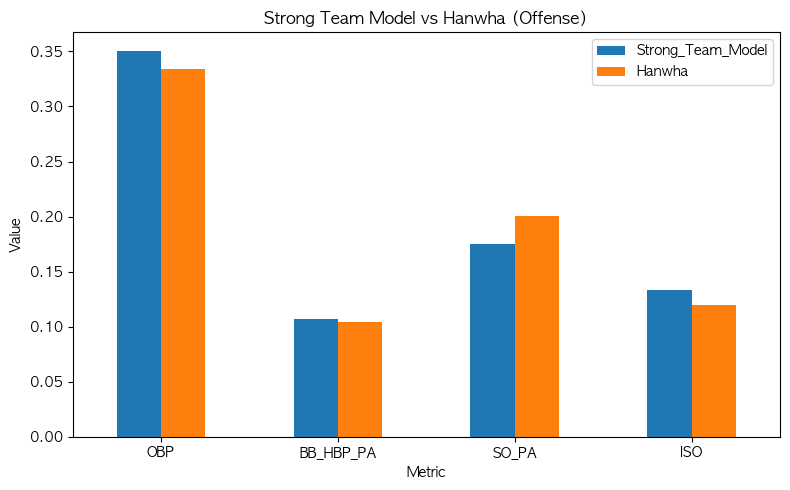

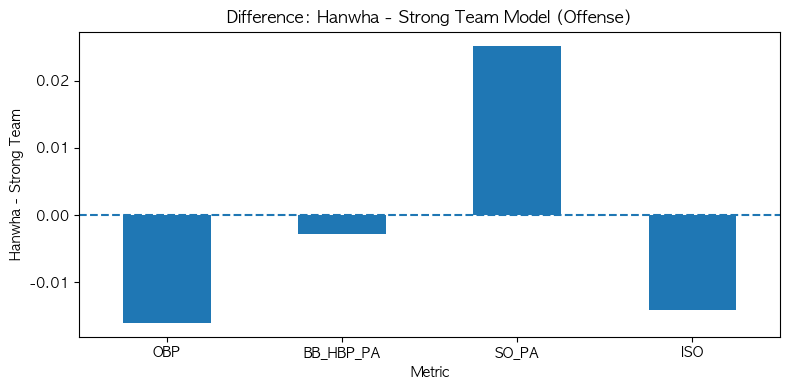

In [83]:
# (1) 모델 vs 한화
ax = compare_off[["Strong_Team_Model", "Hanwha"]].plot(kind="bar", figsize=(8, 5), rot=0)
ax.set_title("Strong Team Model vs Hanwha (Offense)")
ax.set_ylabel("Value")
ax.set_xlabel("Metric")
plt.tight_layout()
plt.show()

# (2) 차이(요약)
ax = compare_off["Difference(Hanwha-Model)"].plot(kind="bar", figsize=(8, 4), rot=0)
ax.axhline(0, linestyle="--")
ax.set_title("Difference: Hanwha - Strong Team Model (Offense)")
ax.set_ylabel("Hanwha - Strong Team")
ax.set_xlabel("Metric")
plt.tight_layout()
plt.show()


In [84]:
hanwha_year = (
    bat_team_year[
        (bat_team_year["Team"] == target_team) &
        (bat_team_year["Year"].isin(years))
    ][["Year", "OBP", "BB_HBP_PA", "SO_PA", "ISO"]]
    .sort_values("Year")
)

hanwha_year


Year       OBP  BB_HBP_PA     SO_PA       ISO
12  2022  0.322693   0.101730  0.224520  0.107269
13  2023  0.327517   0.111577  0.205105  0.110926
14  2024  0.348772   0.108132  0.187500  0.129251
15  2025  0.338025   0.096093  0.183299  0.129389

In [85]:
hanwha_year[["OBP", "BB_HBP_PA", "SO_PA", "ISO"]].corr()

OBP  BB_HBP_PA     SO_PA       ISO
OBP        1.000000   0.022473 -0.858268  0.922439
BB_HBP_PA  0.022473   1.000000  0.163090 -0.307757
SO_PA     -0.858268   0.163090  1.000000 -0.948943
ISO        0.922439  -0.307757 -0.948943  1.000000

- 첫 번째/두 번째 막대그래프(모델 vs 한화)는 같은 메시지다.
- 핵심: BB_HBP_PA는 유사, SO_PA는 한화가 더 높음(약점), ISO는 열세(장타 부족)
- 한 문장 결론:
    - “한화는 선구안 자체는 강팀과 큰 차이가 없지만, 삼진이 많고 장타력이 부족해 출루가 득점으로 연결되지 않는 공격 구조를 보인다.”

In [86]:
pitch_strong = pitch_team_year[
    (pitch_team_year["Team"].isin(strong_teams)) &
    (pitch_team_year["Year"].isin(years))
].copy()

strong_team_pitch = (
    pitch_strong
    .groupby("Team", as_index=True)[["ERA", "FIP", "K_BB_pct"]]
    .mean()
)

strong_pitch_model = strong_team_pitch.mean()
strong_pitch_model


ERA         3.957198
FIP         4.194655
K_BB_pct    0.095215
dtype: float64

In [87]:
hanwha_pitch = (
    pitch_team_year[
        (pitch_team_year["Team"] == target_team) &
        (pitch_team_year["Year"].isin(years))
    ][["ERA", "FIP", "K_BB_pct"]]
    .mean()
)

compare_pitch = pd.DataFrame({
    "Strong_Team_Model": strong_pitch_model,
    "Hanwha": hanwha_pitch
})
compare_pitch["Difference(Hanwha-Model)"] = compare_pitch["Hanwha"] - compare_pitch["Strong_Team_Model"]

compare_pitch


Strong_Team_Model    Hanwha  Difference(Hanwha-Model)
ERA                3.957198  4.310208                  0.353009
FIP                4.194655  4.216050                  0.021395
K_BB_pct           0.095215  0.095928                  0.000713

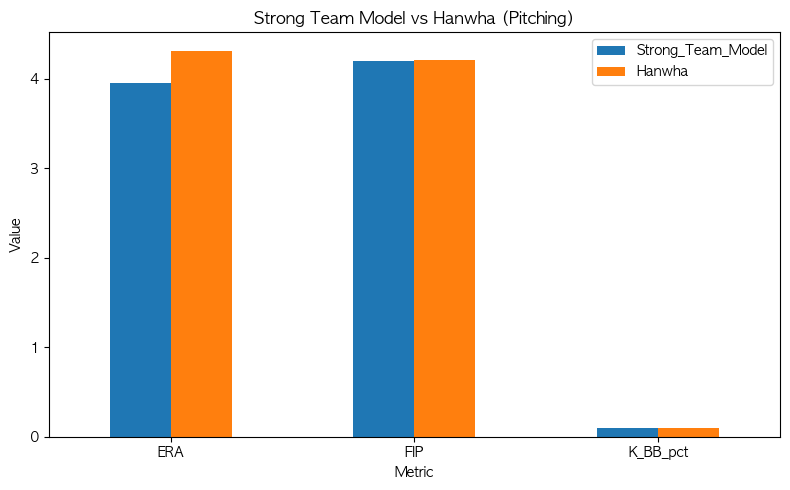

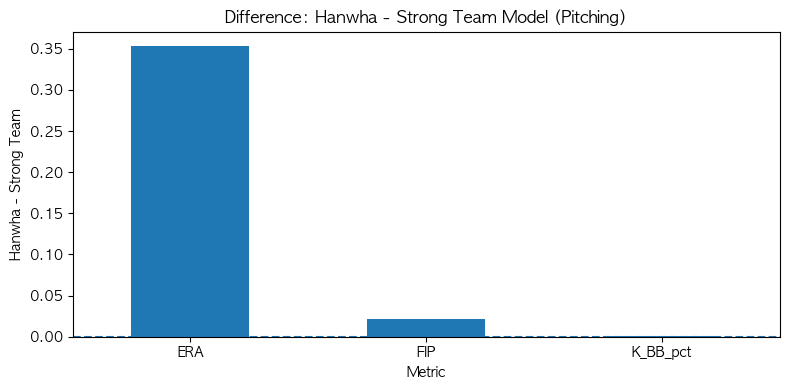

In [88]:
# (1) 모델 vs 한화
ax = compare_pitch[["Strong_Team_Model", "Hanwha"]].plot(kind="bar", figsize=(8, 5), rot=0)
ax.set_title("Strong Team Model vs Hanwha (Pitching)")
ax.set_ylabel("Value")
ax.set_xlabel("Metric")
plt.tight_layout()
plt.show()

# (2) 차이(요약)
ax = compare_pitch["Difference(Hanwha-Model)"].plot(kind="bar", figsize=(8, 4), rot=0)
ax.axhline(0, linestyle="--")
ax.set_title("Difference: Hanwha - Strong Team Model (Pitching)")
ax.set_ylabel("Hanwha - Strong Team")
ax.set_xlabel("Metric")
plt.tight_layout()
plt.show()


- ERA/FIP는 낮을수록 좋음
    - Difference가 음수면 한화가 강팀 대비 우위
    - Difference가 양수면 한화가 강팀 대비 열세
- K-BB%는 높을수록 좋음
    - 한화가 강팀 평균에 근접/상회한다면 → 지배력 기반 지속 가능성 근거
- 주의: K-BB% 정의를 보고서에 명시(본 분석은 (SO - BB - HBP) / TBF 사용)

In [118]:
# ============================================================
# 0) 라이브러리
# ============================================================
import pandas as pd
import numpy as np

import scipy.stats as st
import statsmodels.api as sm

import matplotlib.pyplot as plt

# ============================================================
# 1) 데이터 로드
# ============================================================
# (너가 업로드한 파일 경로 기준)
BAT_PATH = "../data/raw/kbo_batting_stats_by_season_1982-2025.csv"
bat = pd.read_csv(BAT_PATH)

# ------------------------------------------------------------
# 2) 최근 5개년 필터링 (2021~2025)
# ------------------------------------------------------------
YEARS = [2021, 2022, 2023, 2024, 2025]
bat5 = bat[bat["Year"].isin(YEARS)].copy()

# 수치형 변환(혹시 문자열로 읽힌 경우 대비)
num_cols = ["PA", "AB", "H", "BB", "HP", "SF", "SO", "wRC+", "TB", "HR"]
for c in num_cols:
    if c in bat5.columns:
        bat5[c] = pd.to_numeric(bat5[c], errors="coerce")

# ------------------------------------------------------------
# 3) 팀-연도 단위로 집계 (선수→팀 합산)
#    - OBP 등은 "팀 공식값"으로 재계산해야 함
# ------------------------------------------------------------
# wRC+는 선수별 지표라서 팀값은 PA가중평균(근사)로 계산
bat5["wRCxPA"] = bat5["wRC+"] * bat5["PA"]

team_year = (
    bat5.groupby(["Year", "Team"], as_index=False)
        .agg(
            PA=("PA", "sum"),
            AB=("AB", "sum"),
            H=("H", "sum"),
            BB=("BB", "sum"),
            HBP=("HP", "sum"),   # HP가 사구(HBP)로 들어있음
            SF=("SF", "sum"),
            SO=("SO", "sum"),
            wRCxPA=("wRCxPA", "sum"),
        )
)

# ------------------------------------------------------------
# 4) 가설 검증용 파생변수 생성
# ------------------------------------------------------------
# 팀 OBP 공식 재계산
team_year["OBP"] = (team_year["H"] + team_year["BB"] + team_year["HBP"]) / (
    team_year["AB"] + team_year["BB"] + team_year["HBP"] + team_year["SF"]
)

# 볼넷+사구 비율, 삼진 비율
team_year["BB_HBP_PA"] = (team_year["BB"] + team_year["HBP"]) / team_year["PA"]
team_year["SO_PA"] = team_year["SO"] / team_year["PA"]

# 팀 wRC+ (PA 가중평균)
team_year["wRC+_PAw"] = team_year["wRCxPA"] / team_year["PA"]

# ------------------------------------------------------------
# 5) (선택) 최근 5년 우승팀 마킹
#     - 한국시리즈 우승 기준으로 매핑(필요하면 수정 가능)
# ------------------------------------------------------------
champ_map = {
    2021: "KT",
    2022: "SSG",
    2023: "LG",
    2024: "KIA",
    2025: "LG",
}
team_year["is_champ"] = team_year.apply(
    lambda r: champ_map.get(int(r["Year"])) == r["Team"], axis=1
)

# ============================================================
# 6) 가설 검증 함수: Pearson r + p-value + 단순회귀(OLS) + R^2
# ============================================================
def corr_and_reg(df: pd.DataFrame, xcol: str, ycol: str) -> dict:
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())

    # Pearson correlation
    r, p_corr = st.pearsonr(x[mask], y[mask])

    # Simple OLS regression: y = a + b*x
    X = sm.add_constant(x[mask])
    model = sm.OLS(y[mask], X).fit()

    return {
        "n": int(mask.sum()),
        "pearson_r": float(r),
        "corr_p_value": float(p_corr),
        "reg_intercept": float(model.params.iloc[0]),
        "reg_coef": float(model.params.iloc[1]),
        "reg_p_value": float(model.pvalues.iloc[1]),
        "r2": float(model.rsquared),
    }

# ============================================================
# 7) 가설 3개 검증 (10개팀×5년 = 50개 team-year)
# ============================================================
results = []

# H1: (BB+HBP)/PA ↑ => OBP ↑
results.append({
    "Hypothesis": "H1: (BB+HBP)/PA ↑  =>  OBP ↑",
    **corr_and_reg(team_year, "BB_HBP_PA", "OBP")
})

# H2: SO/PA ↓ => OBP ↑  (상관계수는 음수로 나와야 정상)
results.append({
    "Hypothesis": "H2: SO/PA ↓  =>  OBP ↑",
    **corr_and_reg(team_year, "SO_PA", "OBP")
})

# H3: OBP ↑ => wRC+ ↑
results.append({
    "Hypothesis": "H3: OBP ↑  =>  wRC+ ↑",
    **corr_and_reg(team_year, "OBP", "wRC+_PAw")
})

tests_df = pd.DataFrame(results).round(6)
print(tests_df)

# ============================================================
# 8) (선택) 우승팀 5팀 vs 전체 평균 비교
# ============================================================
champ_df = team_year[team_year["is_champ"]].copy()

summary_df = pd.DataFrame({
    "Group": ["Champions (2021-2025)", "All teams (2021-2025)"],
    "n": [len(champ_df), len(team_year)],
    "OBP_mean": [champ_df["OBP"].mean(), team_year["OBP"].mean()],
    "BB+HBP/PA_mean": [champ_df["BB_HBP_PA"].mean(), team_year["BB_HBP_PA"].mean()],
    "SO/PA_mean": [champ_df["SO_PA"].mean(), team_year["SO_PA"].mean()],
    "wRC+_PAw_mean": [champ_df["wRC+_PAw"].mean(), team_year["wRC+_PAw"].mean()],
}).round(6)

print("\n--- Champions vs All Teams (Means) ---")
print(summary_df)

# ============================================================
# 9) 산점도 + 회귀직선 저장 (발표용)
#    (색 지정 안 함: 기본값)
# ============================================================
def save_scatter_with_fit(df, xcol, ycol, out_path, title):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())
    x = x[mask]; y = y[mask]

    # fit
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    xs = np.linspace(x.min(), x.max(), 100)
    ys = model.params.iloc[0] + model.params.iloc[1] * xs

    plt.figure()
    plt.scatter(x, y)
    plt.plot(xs, ys)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close()

save_scatter_with_fit(team_year, "BB_HBP_PA", "OBP",
                      "plot_H1_BB_HBP_PA_vs_OBP.png",
                      "H1: (BB+HBP)/PA vs OBP (2021-2025, team-year)")

save_scatter_with_fit(team_year, "SO_PA", "OBP",
                      "plot_H2_SO_PA_vs_OBP.png",
                      "H2: SO/PA vs OBP (2021-2025, team-year)")

save_scatter_with_fit(team_year, "OBP", "wRC+_PAw",
                      "plot_H3_OBP_vs_wRCplus.png",
                      "H3: OBP vs wRC+ (2021-2025, team-year)")

# ============================================================
# 10) 결과 CSV 저장 (팀-연도 데이터 / 가설검증 결과 / 요약)
# ============================================================
team_year.to_csv("kbo_team_year_2021_2025_processed.csv", index=False, encoding="utf-8-sig")
tests_df.to_csv("kbo_hypothesis_tests_2021_2025.csv", index=False, encoding="utf-8-sig")
summary_df.to_csv("kbo_champ_vs_all_summary_2021_2025.csv", index=False, encoding="utf-8-sig")

print("\n[Saved files]")
print("- kbo_team_year_2021_2025_processed.csv")
print("- kbo_hypothesis_tests_2021_2025.csv")
print("- kbo_champ_vs_all_summary_2021_2025.csv")
print("- plot_H1_BB_HBP_PA_vs_OBP.png")
print("- plot_H2_SO_PA_vs_OBP.png")
print("- plot_H3_OBP_vs_wRCplus.png")


                     Hypothesis   n  pearson_r  corr_p_value  reg_intercept  \
0  H1: (BB+HBP)/PA ↑  =>  OBP ↑  50   0.492420      0.000281       0.278408   
1        H2: SO/PA ↓  =>  OBP ↑  50  -0.530483      0.000074       0.404582   
2         H3: OBP ↑  =>  wRC+ ↑  50   0.717948      0.000000     -64.462034   

     reg_coef  reg_p_value        r2  
0    0.591122     0.000281  0.242478  
1   -0.337551     0.000074  0.281412  
2  481.865143     0.000000  0.515450  

--- Champions vs All Teams (Means) ---
                   Group   n  OBP_mean  BB+HBP/PA_mean  SO/PA_mean  \
0  Champions (2021-2025)   5   0.35668        0.113913    0.169233   
1  All teams (2021-2025)  50   0.34168        0.107038    0.186348   

   wRC+_PAw_mean  
0     111.413648  
1     100.181837  

[Saved files]
- kbo_team_year_2021_2025_processed.csv
- kbo_hypothesis_tests_2021_2025.csv
- kbo_champ_vs_all_summary_2021_2025.csv
- plot_H1_BB_HBP_PA_vs_OBP.png
- plot_H2_SO_PA_vs_OBP.png
- plot_H3_OBP_vs_wRCplus.png

In [119]:
# ============================================================
# 0) 라이브러리
# ============================================================
import pandas as pd
import numpy as np

import scipy.stats as st
import statsmodels.api as sm

import matplotlib.pyplot as plt

# ============================================================
# 1) 데이터 로드
# ============================================================
BAT_PATH = "../data/raw/kbo_batting_stats_by_season_1982-2025.csv"
bat = pd.read_csv(BAT_PATH)

# ============================================================
# 2) 최근 5개년 필터링 (2021~2025)
# ============================================================
YEARS = [2021, 2022, 2023, 2024, 2025]
bat5 = bat[bat["Year"].isin(YEARS)].copy()

# 수치형 컬럼 변환
num_cols = ["PA", "AB", "H", "BB", "HP", "SF", "SO", "wRC+", "TB", "HR"]
for c in num_cols:
    if c in bat5.columns:
        bat5[c] = pd.to_numeric(bat5[c], errors="coerce")

# ============================================================
# 3) 팀-연도(team-year) 단위로 집계
# ============================================================
# wRC+는 PA 가중평균으로 계산
bat5["wRCxPA"] = bat5["wRC+"] * bat5["PA"]

team_year = (
    bat5.groupby(["Year", "Team"], as_index=False)
        .agg(
            PA=("PA", "sum"),
            AB=("AB", "sum"),
            H=("H", "sum"),
            BB=("BB", "sum"),
            HBP=("HP", "sum"),
            SF=("SF", "sum"),
            SO=("SO", "sum"),
            wRCxPA=("wRCxPA", "sum"),
        )
)

# ============================================================
# 4) 가설 검증용 파생 변수
# ============================================================
# 팀 OBP (공식 재계산)
team_year["OBP"] = (team_year["H"] + team_year["BB"] + team_year["HBP"]) / (
    team_year["AB"] + team_year["BB"] + team_year["HBP"] + team_year["SF"]
)

# 비율 변수
team_year["BB_HBP_PA"] = (team_year["BB"] + team_year["HBP"]) / team_year["PA"]
team_year["SO_PA"] = team_year["SO"] / team_year["PA"]

# 팀 wRC+ (PA 가중평균)
team_year["wRC+_PAw"] = team_year["wRCxPA"] / team_year["PA"]

# ============================================================
# 5) (선택) 최근 5년 우승팀 마킹
# ============================================================
champ_map = {
    2021: "KT",
    2022: "SSG",
    2023: "LG",
    2024: "KIA",
    2025: "LG",
}
team_year["is_champ"] = team_year.apply(
    lambda r: champ_map.get(int(r["Year"])) == r["Team"], axis=1
)

# ============================================================
# 6) 가설 검증 함수
# ============================================================
def corr_and_reg(df, xcol, ycol):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())

    # 상관계수
    r, p_corr = st.pearsonr(x[mask], y[mask])

    # 단순회귀
    X = sm.add_constant(x[mask])
    model = sm.OLS(y[mask], X).fit()

    return {
        "n": int(mask.sum()),
        "pearson_r": round(r, 4),
        "corr_p_value": round(p_corr, 6),
        "reg_coef": round(model.params.iloc[1], 4),
        "reg_p_value": round(model.pvalues.iloc[1], 6),
        "r2": round(model.rsquared, 4),
    }

# ============================================================
# 7) 가설 검증 실행
# ============================================================
results = []

results.append({
    "Hypothesis": "H1: (BB+HBP)/PA ↑ → OBP ↑",
    **corr_and_reg(team_year, "BB_HBP_PA", "OBP")
})

results.append({
    "Hypothesis": "H2: SO/PA ↓ → OBP ↑",
    **corr_and_reg(team_year, "SO_PA", "OBP")
})

results.append({
    "Hypothesis": "H3: OBP ↑ → wRC+ ↑",
    **corr_and_reg(team_year, "OBP", "wRC+_PAw")
})

tests_df = pd.DataFrame(results)
print(tests_df)

# ============================================================
# 8) 우승팀 vs 전체 평균 비교
# ============================================================
champ_df = team_year[team_year["is_champ"]]

summary_df = pd.DataFrame({
    "Group": ["Champions (2021–2025)", "All Teams (2021–2025)"],
    "n": [len(champ_df), len(team_year)],
    "OBP_mean": [champ_df["OBP"].mean(), team_year["OBP"].mean()],
    "BB+HBP/PA_mean": [champ_df["BB_HBP_PA"].mean(), team_year["BB_HBP_PA"].mean()],
    "SO/PA_mean": [champ_df["SO_PA"].mean(), team_year["SO_PA"].mean()],
    "wRC+_mean": [champ_df["wRC+_PAw"].mean(), team_year["wRC+_PAw"].mean()],
}).round(4)

print("\n[Champions vs All Teams]")
print(summary_df)

# ============================================================
# 9) 산점도 + 회귀선 (점 작게 + 예쁜 색)
# ============================================================
def save_scatter_with_fit(df, xcol, ycol, out_path, title):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    # 회귀
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    xs = np.linspace(x.min(), x.max(), 100)
    ys = model.params.iloc[0] + model.params.iloc[1] * xs

    plt.figure(figsize=(6, 4))

    plt.scatter(
        x, y,
        s=30,                  # 점 크기 ↓
        color="#4C72B0",       # 파란톤
        alpha=0.7,
        edgecolors="none"
    )

    plt.plot(
        xs, ys,
        color="#333333",
        linewidth=2
    )

    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close()

# 그래프 생성
save_scatter_with_fit(
    team_year,
    "BB_HBP_PA",
    "OBP",
    "plot_H1_BB_HBP_PA_vs_OBP.png",
    "H1: (BB+HBP)/PA vs OBP (2021–2025)"
)

save_scatter_with_fit(
    team_year,
    "SO_PA",
    "OBP",
    "plot_H2_SO_PA_vs_OBP.png",
    "H2: SO/PA vs OBP (2021–2025)"
)

save_scatter_with_fit(
    team_year,
    "OBP",
    "wRC+_PAw",
    "plot_H3_OBP_vs_wRCplus.png",
    "H3: OBP vs wRC+ (2021–2025)"
)

# ============================================================
# 10) 결과 저장
# ============================================================
team_year.to_csv("kbo_team_year_2021_2025_processed.csv", index=False, encoding="utf-8-sig")
tests_df.to_csv("kbo_hypothesis_tests_2021_2025.csv", index=False, encoding="utf-8-sig")
summary_df.to_csv("kbo_champ_vs_all_summary_2021_2025.csv", index=False, encoding="utf-8-sig")

print("\n[Saved]")
print("- kbo_team_year_2021_2025_processed.csv")
print("- kbo_hypothesis_tests_2021_2025.csv")
print("- kbo_champ_vs_all_summary_2021_2025.csv")
print("- plot_H1_BB_HBP_PA_vs_OBP.png")
print("- plot_H2_SO_PA_vs_OBP.png")
print("- plot_H3_OBP_vs_wRCplus.png")


                  Hypothesis   n  pearson_r  corr_p_value  reg_coef  \
0  H1: (BB+HBP)/PA ↑ → OBP ↑  50     0.4924      0.000281    0.5911   
1        H2: SO/PA ↓ → OBP ↑  50    -0.5305      0.000074   -0.3376   
2         H3: OBP ↑ → wRC+ ↑  50     0.7179      0.000000  481.8651   

   reg_p_value      r2  
0     0.000281  0.2425  
1     0.000074  0.2814  
2     0.000000  0.5155  

[Champions vs All Teams]
                   Group   n  OBP_mean  BB+HBP/PA_mean  SO/PA_mean  wRC+_mean
0  Champions (2021–2025)   5    0.3567          0.1139      0.1692   111.4136
1  All Teams (2021–2025)  50    0.3417          0.1070      0.1863   100.1818

[Saved]
- kbo_team_year_2021_2025_processed.csv
- kbo_hypothesis_tests_2021_2025.csv
- kbo_champ_vs_all_summary_2021_2025.csv
- plot_H1_BB_HBP_PA_vs_OBP.png
- plot_H2_SO_PA_vs_OBP.png
- plot_H3_OBP_vs_wRCplus.png


In [120]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

def show_scatter_with_stats(df, xcol, ycol, title):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    # 상관계수
    r, p = st.pearsonr(x, y)

    # 회귀
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    r2 = model.rsquared

    xs = np.linspace(x.min(), x.max(), 100)
    ys = model.params.iloc[0] + model.params.iloc[1] * xs

    plt.figure(figsize=(6, 4))

    # 산점도
    plt.scatter(
        x, y,
        s=30,
        color="#4C72B0",
        alpha=0.7,
        edgecolors="none"
    )

    # 회귀선
    plt.plot(xs, ys, color="#333333", linewidth=2)

    # 텍스트 박스 (핵심!)
    text = (
        f"Pearson r = {r:.3f}\n"
        f"p-value = {p:.3e}\n"
        f"$R^2$ = {r2:.3f}"
    )

    plt.text(
        x.min(), y.max(),
        text,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9)
    )

    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [121]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

def hypothesis_table(df, xcol, ycol, name):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    # 상관계수
    r, p = st.pearsonr(x, y)

    # 회귀
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    return {
        "Hypothesis": name,
        "n": len(x),
        "Pearson_r": round(r, 4),
        "p_value": round(p, 6),
        "R_squared": round(model.rsquared, 4)
    }

results = []

results.append(
    hypothesis_table(
        team_year,
        "BB_HBP_PA",
        "OBP",
        "H1: (BB+HBP)/PA → OBP"
    )
)

results.append(
    hypothesis_table(
        team_year,
        "SO_PA",
        "OBP",
        "H2: SO/PA → OBP"
    )
)

results.append(
    hypothesis_table(
        team_year,
        "OBP",
        "wRC+_PAw",
        "H3: OBP → wRC+"
    )
)

stats_df = pd.DataFrame(results)
print(stats_df)


              Hypothesis   n  Pearson_r   p_value  R_squared
0  H1: (BB+HBP)/PA → OBP  50     0.4924  0.000281     0.2425
1        H2: SO/PA → OBP  50    -0.5305  0.000074     0.2814
2         H3: OBP → wRC+  50     0.7179  0.000000     0.5155


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def show_scatter_only(df, xcol, ycol, title):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    # 회귀
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    xs = np.linspace(x.min(), x.max(), 100)
    ys = model.params.iloc[0] + model.params.iloc[1] * xs

    plt.figure(figsize=(6, 4))

    # 산점도
    plt.scatter(
        x, y,
        s=30,
        color="#4C72B0",
        alpha=0.7,
        edgecolors="none"
    )

    # 회귀선
    plt.plot(xs, ys, color="#333333", linewidth=2)

    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def show_scatter_champ_highlight(df, xcol, ycol, title):
    # 전체 데이터
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)
    mask = ~(x.isna() | y.isna())
    df_plot = df[mask].copy()

    # 회귀선은 전체 기준
    X = sm.add_constant(df_plot[xcol])
    model = sm.OLS(df_plot[ycol], X).fit()

    xs = np.linspace(df_plot[xcol].min(), df_plot[xcol].max(), 100)
    ys = model.params.iloc[0] + model.params.iloc[1] * xs

    plt.figure(figsize=(6, 4))

    # 🔹 일반 팀
    normal = df_plot[~df_plot["is_champ"]]
    plt.scatter(
        normal[xcol],
        normal[ycol],
        s=30,
        color="#4C72B0",
        alpha=0.6,
        label="Non-champions",
        edgecolors="none"
    )

    # 🔸 우승팀
    champ = df_plot[df_plot["is_champ"]]
    plt.scatter(
        champ[xcol],
        champ[ycol],
        s=70,
        color="#DD8452",
        marker="*",
        label="Champions",
        edgecolors="none"
    )

    # 회귀선
    plt.plot(xs, ys, color="#333333", linewidth=2)

    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


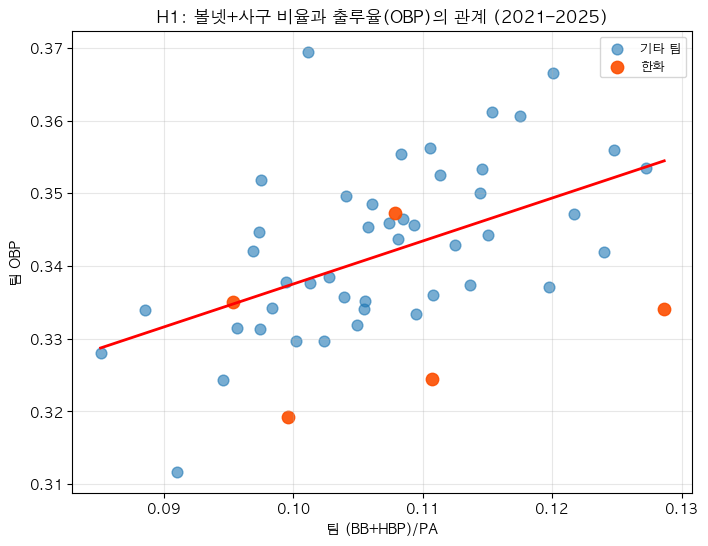

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# -----------------------------
# H1용 데이터 준비
# -----------------------------
df = team_year.copy()

# x: (BB+HBP)/PA, y: OBP
x = df["BB_HBP_PA"].astype(float)
y = df["OBP"].astype(float)

mask = ~(x.isna() | y.isna())
df = df[mask].copy()
x = x[mask]
y = y[mask]

# 한화 vs 기타 팀 분리
df_hanhwa = df[df["Team"] == "한화"]
df_others = df[df["Team"] != "한화"]

# -----------------------------
# 회귀선(전체 기준)
# -----------------------------
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

def reg_line(x_vals):
    # y = a + b*x
    return model.params.iloc[0] + model.params.iloc[1] * x_vals

# -----------------------------
# 그래프 (네 스타일로)
# -----------------------------
plt.figure(figsize=(8, 6))

# 기타 팀
plt.scatter(
    df_others["BB_HBP_PA"],
    df_others["OBP"],
    alpha=0.6,
    s=60,
    label="기타 팀"
)

# 한화 강조
plt.scatter(
    df_hanhwa["BB_HBP_PA"],
    df_hanhwa["OBP"],
    color="#FC4E00",
    s=80,
    alpha=0.9,
    label="한화"
)

# 회귀선
x_sorted = np.sort(df["BB_HBP_PA"].values)
plt.plot(
    x_sorted,
    reg_line(x_sorted),
    color="red",
    linewidth=2
)

plt.xlabel("팀 (BB+HBP)/PA")
plt.ylabel("팀 OBP")
plt.title("H1: 볼넷+사구 비율과 출루율(OBP)의 관계 (2021–2025)")

plt.legend(
    loc="upper right",
    fontsize=9,
    frameon=True
)

plt.grid(alpha=0.3)
plt.show()


In [125]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

def hypothesis_table_precise(df, xcol, ycol, name):
    x = df[xcol].astype(float)
    y = df[ycol].astype(float)

    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    # Pearson correlation
    r, p = st.pearsonr(x, y)

    # Regression
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    return {
        "Hypothesis": name,
        "n": len(x),
        "Pearson_r": r,                         # 반올림 ❌
        "p_value": p,                           # 원본 p-value
        "p_value_sci": f"{p:.12e}",             # 지수 표기
        "R_squared": model.rsquared             # 반올림 ❌
    }

results = []

results.append(
    hypothesis_table_precise(
        team_year,
        "BB_HBP_PA",
        "OBP",
        "H1: (BB+HBP)/PA → OBP"
    )
)

results.append(
    hypothesis_table_precise(
        team_year,
        "SO_PA",
        "OBP",
        "H2: SO/PA → OBP"
    )
)

results.append(
    hypothesis_table_precise(
        team_year,
        "OBP",
        "wRC+_PAw",
        "H3: OBP → wRC+"
    )
)

stats_df_precise = pd.DataFrame(results)
stats_df_precise


Hypothesis   n  Pearson_r       p_value         p_value_sci  \
0  H1: (BB+HBP)/PA → OBP  50   0.492420  2.807265e-04  2.807265341405e-04   
1        H2: SO/PA → OBP  50  -0.530483  7.412187e-05  7.412186741764e-05   
2         H3: OBP → wRC+  50   0.717948  4.398083e-09  4.398083192976e-09   

   R_squared  
0   0.242478  
1   0.281412  
2   0.515450

Hypothesis   n  Pearson_r       p_value         p_value_sci  \
0  H1: (BB+HBP)/PA → OBP  50   0.492926  2.760795e-04  2.760795275361e-04   
1        H2: SO/PA → OBP  50  -0.530346  7.449893e-05  7.449892909288e-05   
2         H3: OBP → wRC+  50   0.718129  4.341020e-09  4.341020039645e-09   

   R_squared  
0   0.242976  
1   0.281267  
2   0.515709

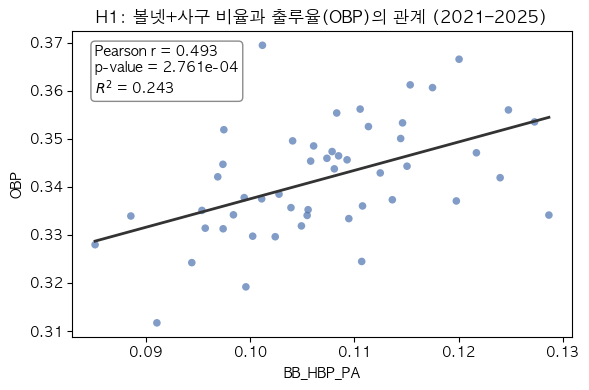

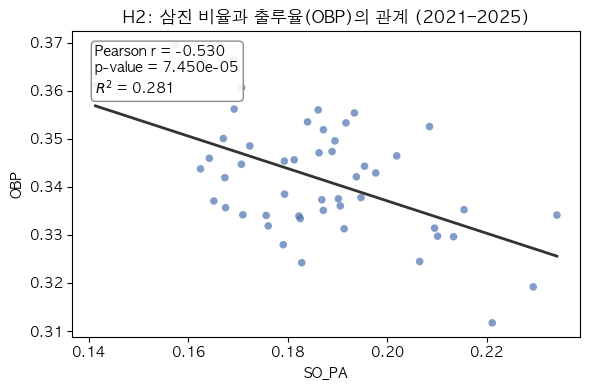

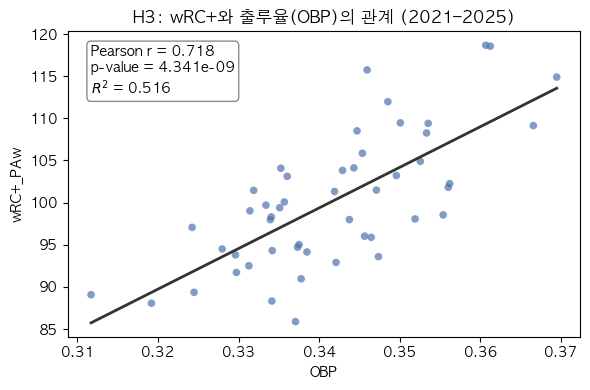

In [ ]:
# ============================================================
# 0) 라이브러리
# ============================================================
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

# ============================================================
# 1) 데이터 로드 + 최근 5개년 필터
# ============================================================
BAT_PATH = "../data/raw/kbo_batting_stats_by_season_1982-2025.csv"
YEARS = [2021, 2022, 2023, 2024, 2025]

bat = pd.read_csv(BAT_PATH)
bat5 = bat[bat["Year"].isin(YEARS)].copy()

# 수치형 변환(문자열 방지)
num_cols = ["PA", "AB", "H", "BB", "HP", "SF", "SO", "wRC+"]
for c in num_cols:
    if c in bat5.columns:
        bat5[c] = pd.to_numeric(bat5[c], errors="coerce")

# 결측/0 처리(안전장치)
bat5 = bat5.dropna(subset=["PA", "AB", "H", "BB", "HP", "SF", "SO", "wRC+"])
bat5 = bat5[(bat5["PA"] > 0) & (bat5["AB"] > 0)].copy()

# ============================================================
# 2) Team-Year 집계 + 파생변수 생성
# ============================================================
bat5["wRCxPA"] = bat5["wRC+"] * bat5["PA"]

team_year = (
    bat5.groupby(["Year", "Team"], as_index=False)
        .agg(
            PA=("PA", "sum"),
            AB=("AB", "sum"),
            H=("H", "sum"),
            BB=("BB", "sum"),
            HBP=("HP", "sum"),   # HP = HBP(사구)
            SF=("SF", "sum"),
            SO=("SO", "sum"),
            wRCxPA=("wRCxPA", "sum"),
        )
)

# OBP 공식 재계산(근사; 데이터 컬럼 구성 기준)
team_year["OBP"] = (team_year["H"] + team_year["BB"] + team_year["HBP"]) / (
    team_year["AB"] + team_year["BB"] + team_year["HBP"] + team_year["SF"]
)

team_year["BB_HBP_PA"] = (team_year["BB"] + team_year["HBP"]) / team_year["PA"]
team_year["SO_PA"] = team_year["SO"] / team_year["PA"]
team_year["wRC+_PAw"] = team_year["wRCxPA"] / team_year["PA"]

# ============================================================
# 3) 정밀 통계 테이블 (Pearson r / p-value / R²)
# ============================================================
def hypothesis_table_precise(df, xcol, ycol, name):
    x = pd.to_numeric(df[xcol], errors="coerce")
    y = pd.to_numeric(df[ycol], errors="coerce")
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    r, p = st.pearsonr(x, y)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    return {
        "Hypothesis": name,
        "n": int(len(x)),
        "Pearson_r": float(r),
        "p_value": float(p),
        "p_value_sci": f"{p:.12e}",
        "R_squared": float(model.rsquared),
    }

results = [
    hypothesis_table_precise(team_year, "BB_HBP_PA", "OBP", "H1: (BB+HBP)/PA → OBP"),
    hypothesis_table_precise(team_year, "SO_PA", "OBP", "H2: SO/PA → OBP"),
    hypothesis_table_precise(team_year, "OBP", "wRC+_PAw", "H3: OBP → wRC+"),
]

stats_df_precise = pd.DataFrame(results)
display(stats_df_precise)

# ============================================================
# 4) 산점도(회귀선 + r/p/R² 텍스트) 3개만 출력
# ============================================================
def show_scatter_with_stats(df, xcol, ycol, title):
    x = pd.to_numeric(df[xcol], errors="coerce")
    y = pd.to_numeric(df[ycol], errors="coerce")
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    r, p = st.pearsonr(x, y)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    r2 = model.rsquared

    xs = np.linspace(x.min(), x.max(), 100)
    ys = model.params.iloc[0] + model.params.iloc[1] * xs

    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, s=30, color="#4C72B0", alpha=0.7, edgecolors="none")
    plt.plot(xs, ys, color="#333333", linewidth=2)

    text = (
        f"Pearson r = {r:.3f}\n"
        f"p-value = {p:.3e}\n"
        f"$R^2$ = {r2:.3f}"
    )
    plt.text(
        x.min(), y.max(),
        text,
        fontsize=10,
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9)
    )

    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(title)
    plt.tight_layout()
    plt.show()

show_scatter_with_stats(team_year, "BB_HBP_PA", "OBP", "H1: 볼넷+사구 비율과 출루율(OBP)의 관계 (2021–2025)")
show_scatter_with_stats(team_year, "SO_PA", "OBP", "H2: 삼진 비율과 출루율(OBP)의 관계 (2021–2025)")
show_scatter_with_stats(team_year, "OBP", "wRC+_PAw", "H3: wRC+와 출루율(OBP)의 관계 (2021–2025)")


Hypothesis   n  Pearson_r       p_value         p_value_sci  \
0  H1: (BB+HBP)/PA → OBP  50   0.492926  2.760795e-04  2.760795275361e-04   
1        H2: SO/PA → OBP  50  -0.530346  7.449893e-05  7.449892909288e-05   
2         H3: OBP → wRC+  50   0.718129  4.341020e-09  4.341020039645e-09   

   R_squared  
0   0.242976  
1   0.281267  
2   0.515709

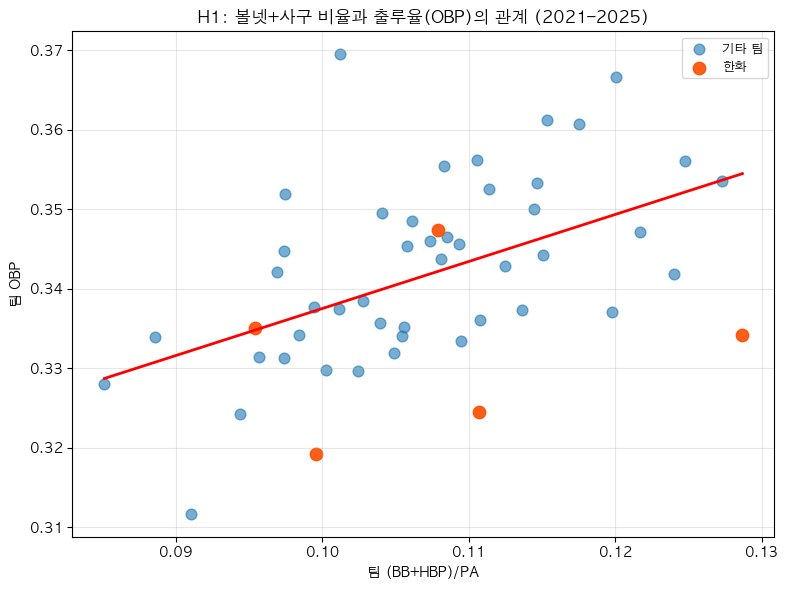

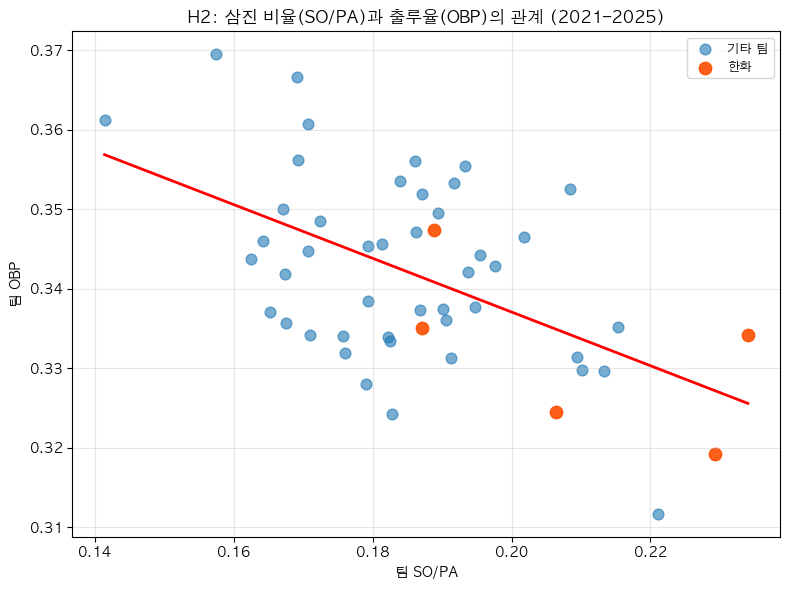

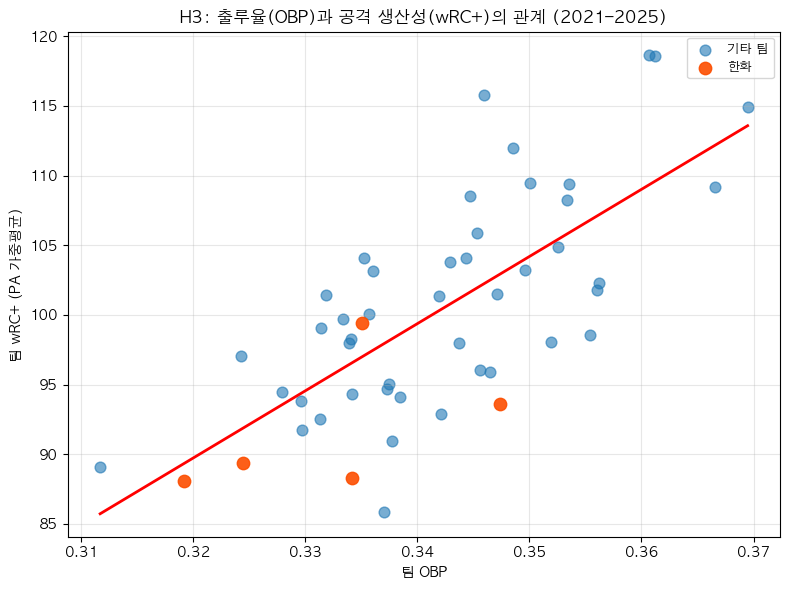

In [131]:
# ============================================================
# 05_hypothesis_tests_clean_unified_style.ipynb (복붙 즉시 실행용)
# - 표 1개(stats_df_precise)
# - 그래프 3개(H1~H3) : "네가 준 H1 스타일"로 통일
#   (기타 팀 기본 점 + 한화 강조 + 전체 회귀선 + grid + legend)
# ============================================================

# -----------------------------
# 0) 라이브러리
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

# -----------------------------
# 1) 데이터 로드 + 최근 5개년 필터
# -----------------------------
BAT_PATH = "../data/raw/kbo_batting_stats_by_season_1982-2025.csv"
YEARS = [2021, 2022, 2023, 2024, 2025]

bat = pd.read_csv(BAT_PATH)
bat5 = bat[bat["Year"].isin(YEARS)].copy()

# 필요한 컬럼 체크
required_cols = ["Year", "Team", "PA", "AB", "H", "BB", "HP", "SF", "SO", "wRC+"]
missing = [c for c in required_cols if c not in bat5.columns]
if missing:
    raise KeyError(f"필수 컬럼이 없습니다: {missing}")

# 수치형 변환
num_cols = ["PA", "AB", "H", "BB", "HP", "SF", "SO", "wRC+"]
for c in num_cols:
    bat5[c] = pd.to_numeric(bat5[c], errors="coerce")

# 결측/0 제거(안전장치)
bat5 = bat5.dropna(subset=num_cols)
bat5 = bat5[(bat5["PA"] > 0) & (bat5["AB"] > 0)].copy()

# -----------------------------
# 2) Team-Year 집계 + 파생 변수
# -----------------------------
bat5["wRCxPA"] = bat5["wRC+"] * bat5["PA"]

team_year = (
    bat5.groupby(["Year", "Team"], as_index=False)
        .agg(
            PA=("PA", "sum"),
            AB=("AB", "sum"),
            H=("H", "sum"),
            BB=("BB", "sum"),
            HBP=("HP", "sum"),  # HP=HBP(사구)
            SF=("SF", "sum"),
            SO=("SO", "sum"),
            wRCxPA=("wRCxPA", "sum"),
        )
)

# OBP 재계산(근사)
team_year["OBP"] = (team_year["H"] + team_year["BB"] + team_year["HBP"]) / (
    team_year["AB"] + team_year["BB"] + team_year["HBP"] + team_year["SF"]
)

team_year["BB_HBP_PA"] = (team_year["BB"] + team_year["HBP"]) / team_year["PA"]
team_year["SO_PA"] = team_year["SO"] / team_year["PA"]
team_year["wRC+_PAw"] = team_year["wRCxPA"] / team_year["PA"]

team_year = team_year.replace([np.inf, -np.inf], np.nan).dropna(
    subset=["OBP", "BB_HBP_PA", "SO_PA", "wRC+_PAw"]
).copy()

# -----------------------------
# 3) 정밀 통계 테이블
# -----------------------------
def hypothesis_table_precise(df, xcol, ycol, name):
    x = pd.to_numeric(df[xcol], errors="coerce")
    y = pd.to_numeric(df[ycol], errors="coerce")
    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]

    r, p = st.pearsonr(x, y)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    return {
        "Hypothesis": name,
        "n": int(len(x)),
        "Pearson_r": float(r),
        "p_value": float(p),
        "p_value_sci": f"{p:.12e}",
        "R_squared": float(model.rsquared),
    }

stats_df_precise = pd.DataFrame([
    hypothesis_table_precise(team_year, "BB_HBP_PA", "OBP", "H1: (BB+HBP)/PA → OBP"),
    hypothesis_table_precise(team_year, "SO_PA", "OBP", "H2: SO/PA → OBP"),
    hypothesis_table_precise(team_year, "OBP", "wRC+_PAw", "H3: OBP → wRC+"),
])

try:
    display(stats_df_precise)
except NameError:
    print(stats_df_precise)

# -----------------------------
# 4) 그래프(네가 준 H1 스타일로 통일)
# -----------------------------
def plot_h_style(df, xcol, ycol, title, xlabel, ylabel,
                 highlight_team="한화",
                 highlight_color="#FC4E00"):
    d = df.copy()

    x = pd.to_numeric(d[xcol], errors="coerce")
    y = pd.to_numeric(d[ycol], errors="coerce")
    mask = ~(x.isna() | y.isna())
    d = d[mask].copy()
    x = x[mask].astype(float)
    y = y[mask].astype(float)

    # 한화 vs 기타 팀
    d_h = d[d["Team"] == highlight_team]
    d_o = d[d["Team"] != highlight_team]

    # 회귀선(전체 기준)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    def reg_line(x_vals):
        return model.params.iloc[0] + model.params.iloc[1] * x_vals

    # Plot (너 스타일)
    plt.figure(figsize=(8, 6))

    # 기타 팀
    plt.scatter(
        d_o[xcol],
        d_o[ycol],
        alpha=0.6,
        s=60,
        label="기타 팀"
    )

    # 한화 강조
    plt.scatter(
        d_h[xcol],
        d_h[ycol],
        color=highlight_color,
        s=80,
        alpha=0.9,
        label=highlight_team
    )

    # 회귀선
    x_sorted = np.sort(d[xcol].values.astype(float))
    plt.plot(
        x_sorted,
        reg_line(x_sorted),
        color="red",
        linewidth=2
    )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend(
        loc="upper right",
        fontsize=9,
        frameon=True
    )

    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# H1
plot_h_style(
    team_year,
    xcol="BB_HBP_PA",
    ycol="OBP",
    title="H1: 볼넷+사구 비율과 출루율(OBP)의 관계 (2021–2025)",
    xlabel="팀 (BB+HBP)/PA",
    ylabel="팀 OBP",
    highlight_team="한화"
)

# H2
plot_h_style(
    team_year,
    xcol="SO_PA",
    ycol="OBP",
    title="H2: 삼진 비율(SO/PA)과 출루율(OBP)의 관계 (2021–2025)",
    xlabel="팀 SO/PA",
    ylabel="팀 OBP",
    highlight_team="한화"
)

# H3
plot_h_style(
    team_year,
    xcol="OBP",
    ycol="wRC+_PAw",
    title="H3: 출루율(OBP)과 공격 생산성(wRC+)의 관계 (2021–2025)",
    xlabel="팀 OBP",
    ylabel="팀 wRC+ (PA 가중평균)",
    highlight_team="한화"
)


---
### 07_presentation_figures_hanwha_2025

본 노트북은 **발표에 삽입할 그래프를 한 곳에서 생성/저장**하기 위한 “출력 전용” 파일이다.

- 분석/결론 도출 ❌  
- 그림 생성 및 스타일 통일 ⭕️  
- 파일 저장(이미지 export) ⭕️

구성:
A) 팀 성적(승률/순위)  
B) 득점·실점·득실차/피타고리안  
C) 타격 핵심지표(OBP, ISO, SO/PA, BBHBP/PA, wRC+)  
D) 투수 핵심지표(ERA, FIP, K-BB%, HR/9)  
E) 운영지표(선발 이닝, 불펜 등판/집중도)

In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

YEARS = [2021, 2022, 2023, 2024, 2025]
TARGET_4 = ["한화", "LG", "KIA", "SSG"]

TEAM_COLORS = { 
    '한화': '#FC4E00', 
    'LG': '#C30452', 
    'KIA': '#EA0029', 
    'SSG': '#CE0E2D',
    '삼성':'#074CA1', 
    'NC':'#315288', 
    'KT':'#000000', 
    '롯데':'#041E42', 
    '두산':'#1A1748',
    '키움':'#570514'
}

OUTDIR = "../outputs/figures"
os.makedirs(OUTDIR, exist_ok=True)

def savefig(name, dpi=200):
    """plt.show() 직전에 호출: 발표용 png 저장"""
    path = os.path.join(OUTDIR, f"{name}.png")
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    print("✅ saved:", path)


✅ saved: ../outputs/figures/A1_winrate_4teams.png


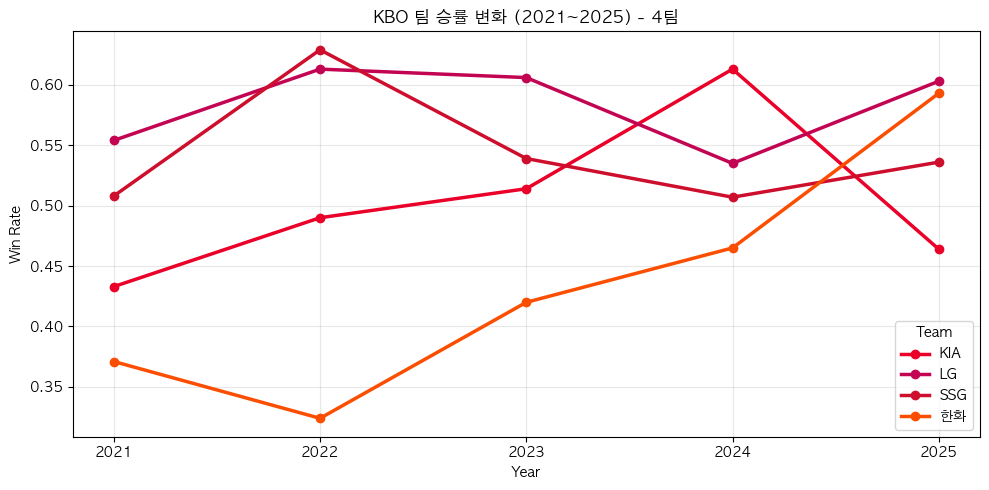

In [90]:
rank_path = "../data/team_rank_2021_2025_10teams.csv"
df = pd.read_csv(rank_path, encoding="utf-8-sig")

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["승률"] = pd.to_numeric(df["승률"], errors="coerce")
df = df[df["year"].isin(YEARS)].copy()

df_4 = df[df["팀명"].isin(TARGET_4)].copy()

plt.figure(figsize=(10, 5))
for team, g in df_4.groupby("팀명"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["승률"],
             marker="o", linewidth=2.5,
             label=team,
             color=TEAM_COLORS.get(team))
plt.title("KBO 팀 승률 변화 (2021~2025) - 4팀")
plt.xlabel("Year"); plt.ylabel("Win Rate")
plt.xticks(YEARS)
plt.grid(True, alpha=0.3)
plt.legend(title="Team")
plt.tight_layout()
savefig("A1_winrate_4teams")
plt.show()


✅ saved: ../outputs/figures/A2_winrate_10teams.png


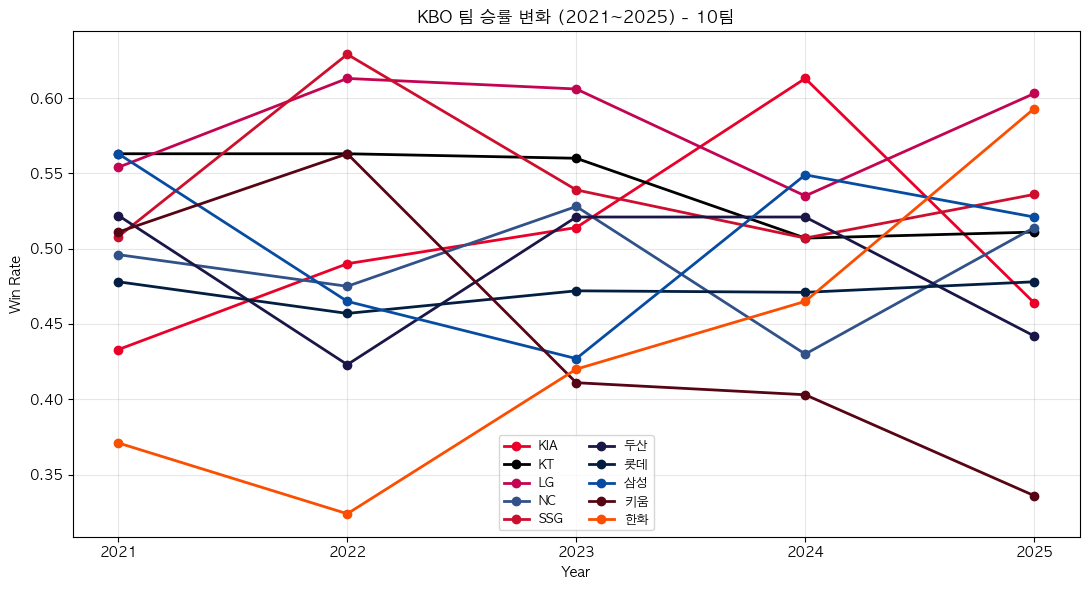

In [91]:
plt.figure(figsize=(11, 6))
for team, g in df.groupby("팀명"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["승률"],
             marker="o", linewidth=2,
             label=team,
             color=TEAM_COLORS.get(team))
plt.title("KBO 팀 승률 변화 (2021~2025) - 10팀")
plt.xlabel("Year"); plt.ylabel("Win Rate")
plt.xticks(YEARS)
plt.grid(True, alpha=0.3)
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
savefig("A2_winrate_10teams")
plt.show()


✅ saved: ../outputs/figures/A3_winrate_focus_한화.png


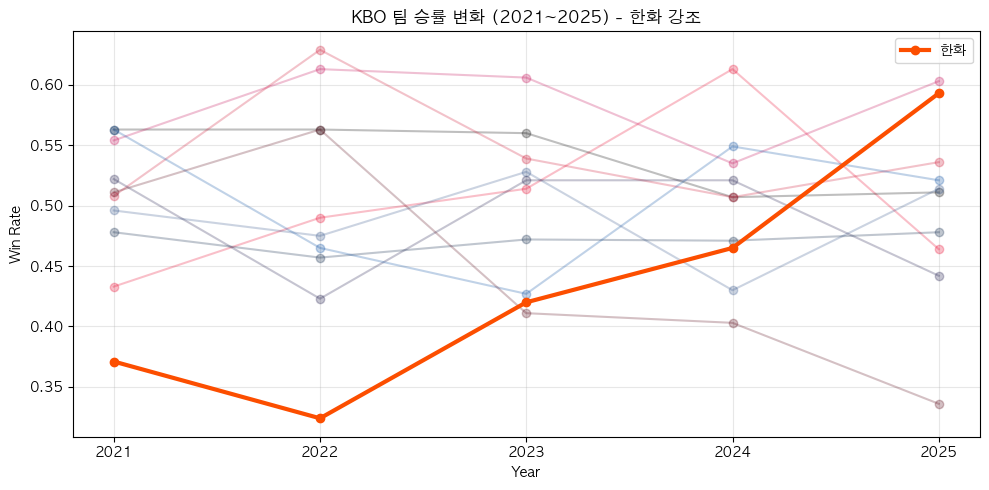

✅ saved: ../outputs/figures/A3_winrate_focus_LG.png


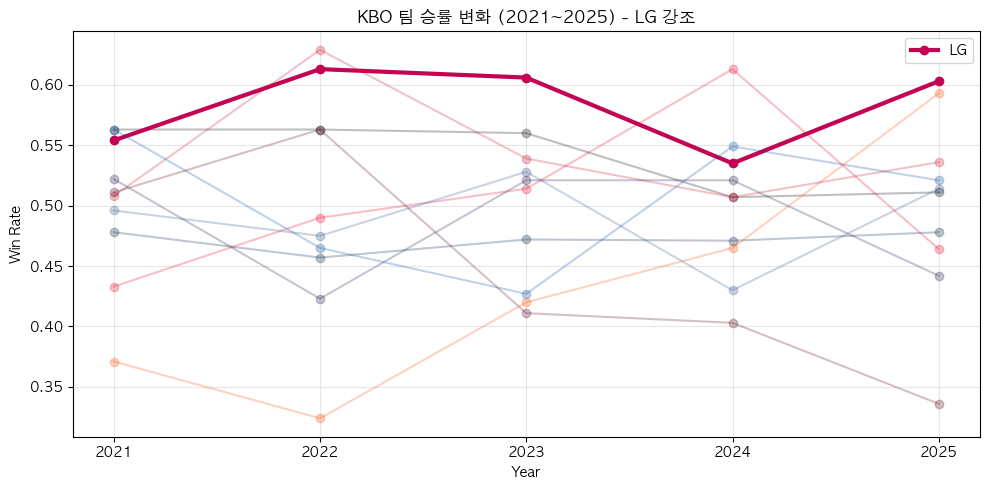

✅ saved: ../outputs/figures/A3_winrate_focus_SSG.png


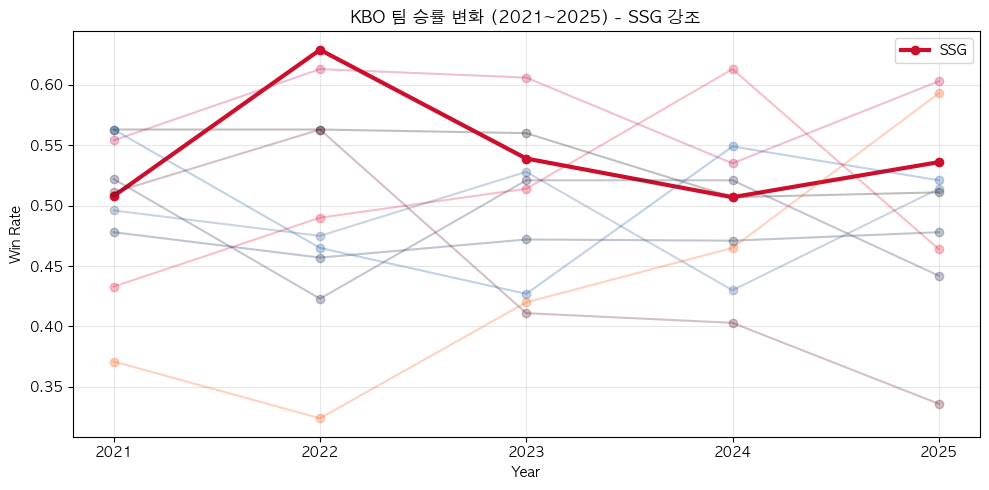

✅ saved: ../outputs/figures/A3_winrate_focus_KIA.png


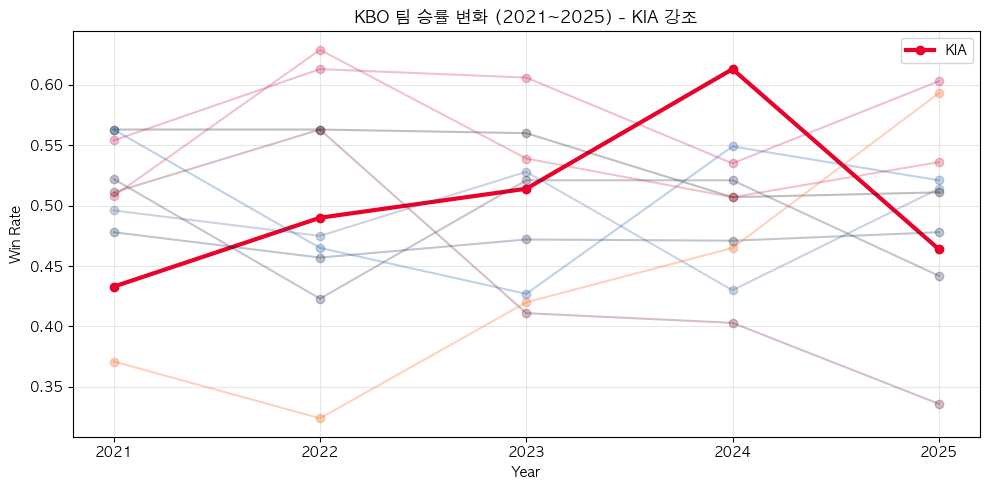

In [92]:
def plot_focus_team_winrate(df, focus):
    plt.figure(figsize=(10, 5))
    for team, g in df.groupby("팀명"):
        g = g.sort_values("year")
        is_focus = (team == focus)
        plt.plot(g["year"], g["승률"],
                 marker="o",
                 linewidth=3 if is_focus else 1.5,
                 alpha=1.0 if is_focus else 0.25,
                 label=team if is_focus else None,
                 color=TEAM_COLORS.get(team))
    plt.title(f"KBO 팀 승률 변화 (2021~2025) - {focus} 강조")
    plt.xlabel("Year"); plt.ylabel("Win Rate")
    plt.xticks(YEARS)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    savefig(f"A3_winrate_focus_{focus}")
    plt.show()

for focus in ["한화", "LG", "SSG", "KIA"]:
    plot_focus_team_winrate(df, focus)


✅ saved: ../outputs/figures/B1_hanwha_run_diff.png


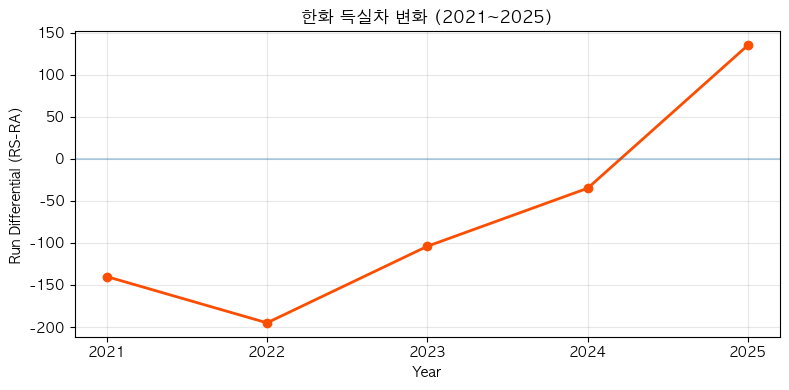

In [93]:
hit = pd.read_csv("../data/team_hitter_basic1_2021_2025.csv")   # R=득점
pit = pd.read_csv("../data/team_pitcher_basic1_2021_2025.csv")  # RA=실점

hit2 = hit.rename(columns={"R":"RS"})[["year","팀명","RS"]]
pit2 = pit[["year","팀명","RA"]]

run_df = hit2.merge(pit2, on=["year","팀명"], how="inner")
run_df["득실차"] = run_df["RS"] - run_df["RA"]

hanwha = run_df[run_df["팀명"]=="한화"].sort_values("year")

plt.figure(figsize=(8,4))
plt.plot(hanwha["year"], hanwha["득실차"],
         marker="o", linewidth=2,
         color=TEAM_COLORS["한화"])
plt.axhline(0, alpha=0.3)
plt.title("한화 득실차 변화 (2021~2025)")
plt.xlabel("Year"); plt.ylabel("Run Differential (RS-RA)")
plt.xticks(hanwha["year"])
plt.grid(True, alpha=0.3)
plt.tight_layout()
savefig("B1_hanwha_run_diff")
plt.show()


✅ saved: ../outputs/figures/B2_run_diff_2025_allteams.png


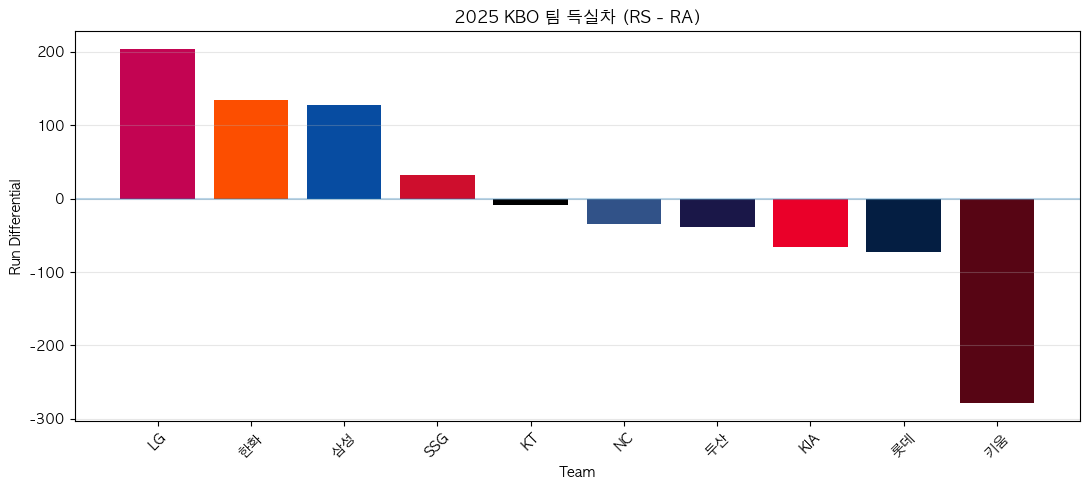

In [94]:
y = 2025
d2025 = run_df[run_df["year"] == y].sort_values("득실차", ascending=False)
colors = [TEAM_COLORS.get(t, "#999999") for t in d2025["팀명"]]

plt.figure(figsize=(11,5))
plt.bar(d2025["팀명"], d2025["득실차"], color=colors)
plt.axhline(0, alpha=0.3)
plt.title(f"{y} KBO 팀 득실차 (RS - RA)")
plt.xlabel("Team"); plt.ylabel("Run Differential")
plt.xticks(rotation=45)
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
savefig("B2_run_diff_2025_allteams")
plt.show()


✅ saved: ../outputs/figures/B3_hanwha_RS_RA.png


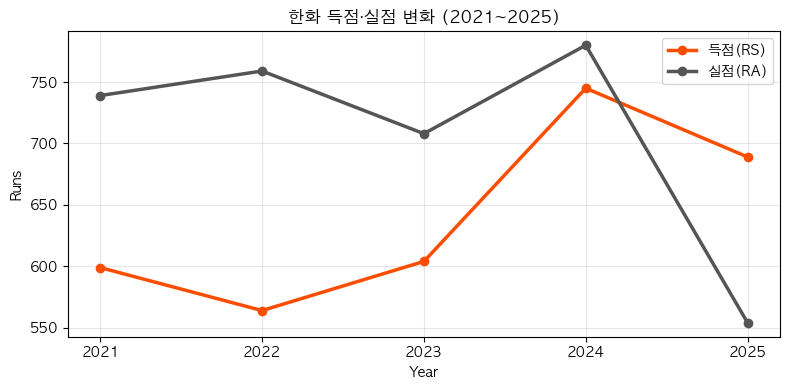

In [95]:
plt.figure(figsize=(8,4))
plt.plot(hanwha["year"], hanwha["RS"],
         marker="o", linewidth=2.5,
         label="득점(RS)", color=TEAM_COLORS["한화"])
plt.plot(hanwha["year"], hanwha["RA"],
         marker="o", linewidth=2.5,
         label="실점(RA)", color="#555555")
plt.title("한화 득점·실점 변화 (2021~2025)")
plt.xlabel("Year"); plt.ylabel("Runs")
plt.xticks(hanwha["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("B3_hanwha_RS_RA")
plt.show()


✅ saved: ../outputs/figures/B4_hanwha_rank.png


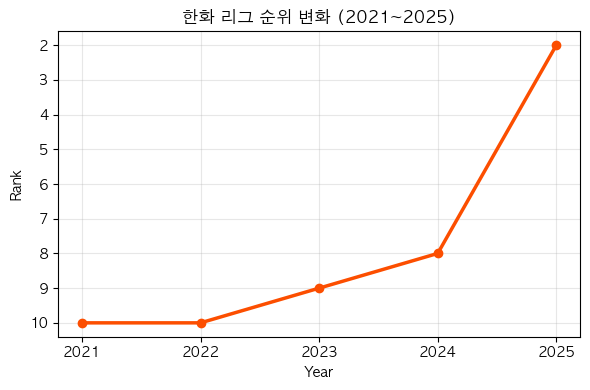

In [96]:
rank_df = df[df["팀명"]=="한화"].sort_values("year")

plt.figure(figsize=(6,4))
plt.plot(rank_df["year"], rank_df["순위"],
         marker="o", linewidth=2.5,
         color=TEAM_COLORS["한화"])
plt.gca().invert_yaxis()
plt.title("한화 리그 순위 변화 (2021~2025)")
plt.xlabel("Year"); plt.ylabel("Rank")
plt.xticks(rank_df["year"])
plt.grid(True, alpha=0.3)
plt.tight_layout()
savefig("B4_hanwha_rank")
plt.show()


✅ saved: ../outputs/figures/B5_hanwha_pythag_vs_actual.png


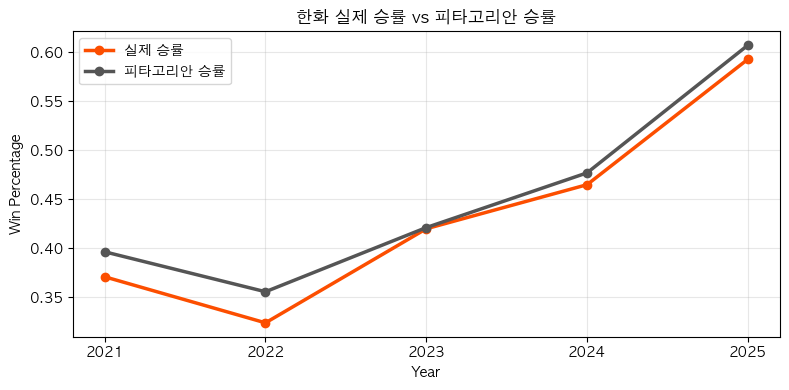

In [97]:
run_df["Pythag_WinPct"] = run_df["RS"]**2 / (run_df["RS"]**2 + run_df["RA"]**2)

win_df = df[df["팀명"]=="한화"][["year","승률"]]
cmp = win_df.merge(run_df[run_df["팀명"]=="한화"][["year","Pythag_WinPct"]],
                   on="year", how="inner").sort_values("year")

plt.figure(figsize=(8,4))
plt.plot(cmp["year"], cmp["승률"],
         marker="o", linewidth=2.5,
         label="실제 승률", color=TEAM_COLORS["한화"])
plt.plot(cmp["year"], cmp["Pythag_WinPct"],
         marker="o", linewidth=2.5,
         label="피타고리안 승률", color="#555555")
plt.title("한화 실제 승률 vs 피타고리안 승률")
plt.xlabel("Year"); plt.ylabel("Win Percentage")
plt.xticks(cmp["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("B5_hanwha_pythag_vs_actual")
plt.show()


In [98]:
team_off = pd.read_csv("../data/team_offense_2021_2025_pa50.csv")
hanwha_off = team_off[team_off["팀명"]=="한화"].sort_values("year")

✅ saved: ../outputs/figures/C1_hanwha_wRCplus.png


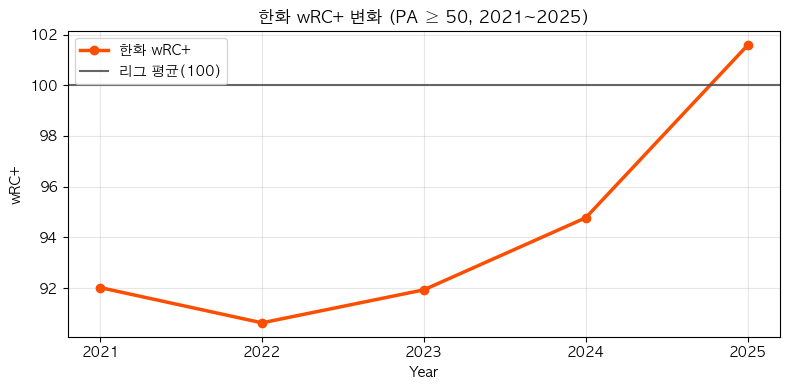

In [99]:
plt.figure(figsize=(8,4))
plt.plot(hanwha_off["year"], hanwha_off["wRC_plus"],
         marker="o", linewidth=2.5,
         color=TEAM_COLORS["한화"], label="한화 wRC+")
plt.axhline(100, color="#555555", linewidth=1.5, alpha=0.9, label="리그 평균(100)")
plt.title("한화 wRC+ 변화 (PA ≥ 50, 2021~2025)")
plt.xlabel("Year"); plt.ylabel("wRC+")
plt.xticks(hanwha_off["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("C1_hanwha_wRCplus")
plt.show()


✅ saved: ../outputs/figures/C_hanwha_OBP.png


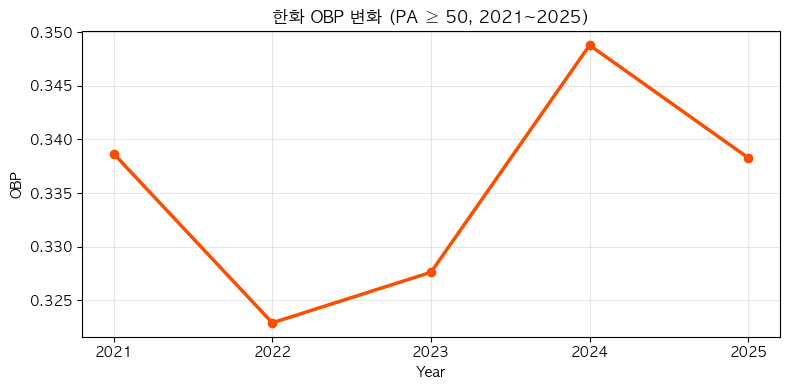

✅ saved: ../outputs/figures/C_hanwha_ISO.png


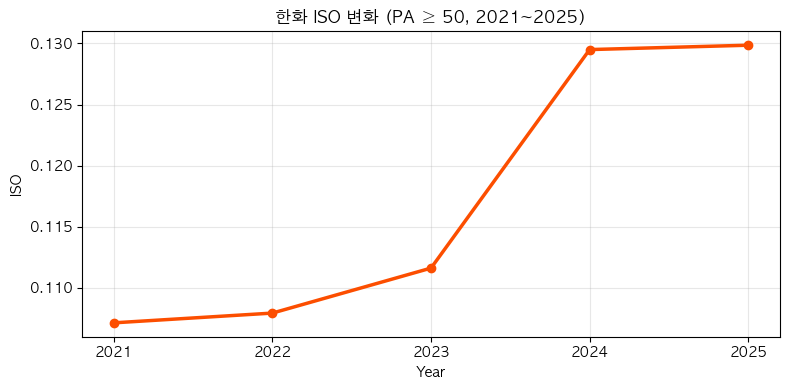

✅ saved: ../outputs/figures/C_hanwha_SO_PA.png


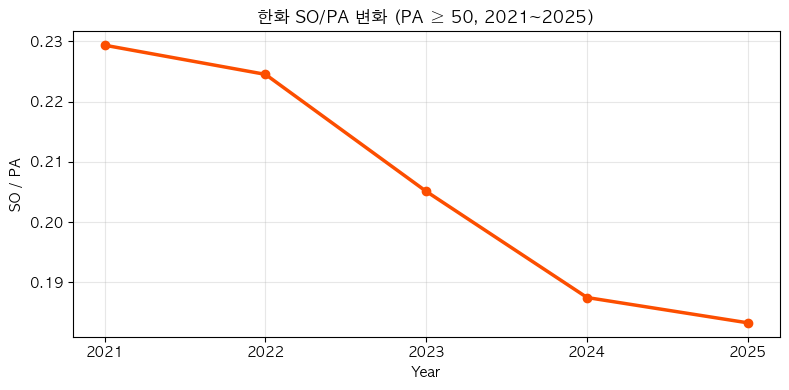

✅ saved: ../outputs/figures/C_hanwha_BBHBP_PA.png


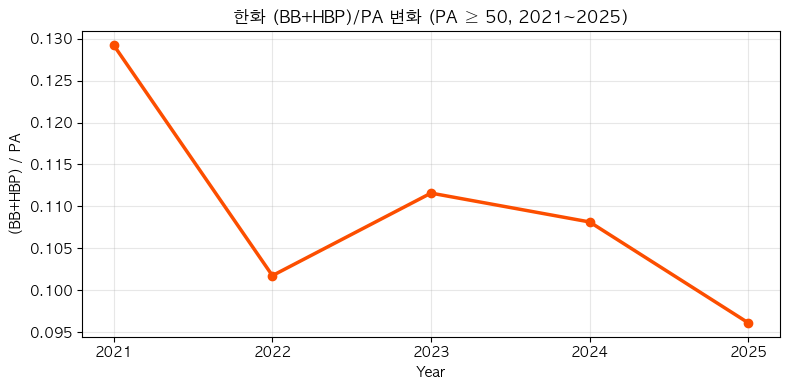

In [100]:
def plot_hanwha_off_metric(col, title, ylabel):
    plt.figure(figsize=(8,4))
    plt.plot(hanwha_off["year"], hanwha_off[col],
             marker="o", linewidth=2.5,
             color=TEAM_COLORS["한화"])
    plt.title(title)
    plt.xlabel("Year"); plt.ylabel(ylabel)
    plt.xticks(hanwha_off["year"])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    savefig(f"C_hanwha_{col}")
    plt.show()

plot_hanwha_off_metric("OBP", "한화 OBP 변화 (PA ≥ 50, 2021~2025)", "OBP")
plot_hanwha_off_metric("ISO", "한화 ISO 변화 (PA ≥ 50, 2021~2025)", "ISO")
plot_hanwha_off_metric("SO_PA", "한화 SO/PA 변화 (PA ≥ 50, 2021~2025)", "SO / PA")
plot_hanwha_off_metric("BBHBP_PA", "한화 (BB+HBP)/PA 변화 (PA ≥ 50, 2021~2025)", "(BB+HBP) / PA")


✅ saved: ../outputs/figures/D1_hanwha_ERA.png


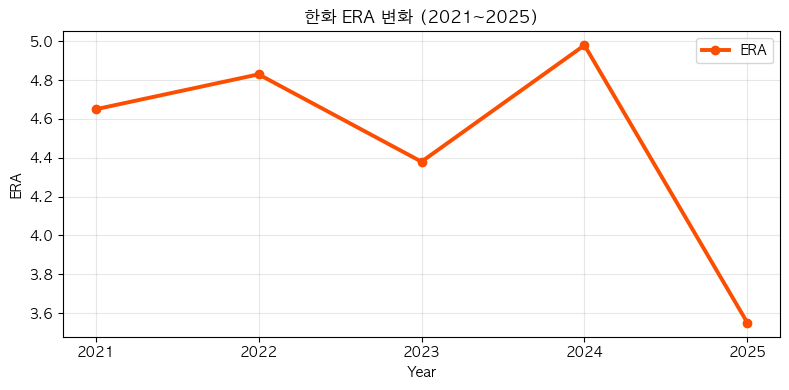

In [101]:
pit_basic = pd.read_csv("../data/team_pitcher_basic1_2021_2025.csv")
hanwha_pit_basic = pit_basic[pit_basic["팀명"]=="한화"].sort_values("year")

plt.figure(figsize=(8,4))
plt.plot(hanwha_pit_basic["year"], hanwha_pit_basic["ERA"],
         marker="o", linewidth=2.8,
         color=TEAM_COLORS["한화"], label="ERA")
plt.title("한화 ERA 변화 (2021~2025)")
plt.xlabel("Year"); plt.ylabel("ERA")
plt.xticks(hanwha_pit_basic["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("D1_hanwha_ERA")
plt.show()


In [102]:
pit_adv = pd.read_csv("../data/team_pitcher_advanced_2021_2025_ip30.csv")
hanwha_pit = pit_adv[pit_adv["팀명"]=="한화"].sort_values("year")

✅ saved: ../outputs/figures/D2_hanwha_FIP.png


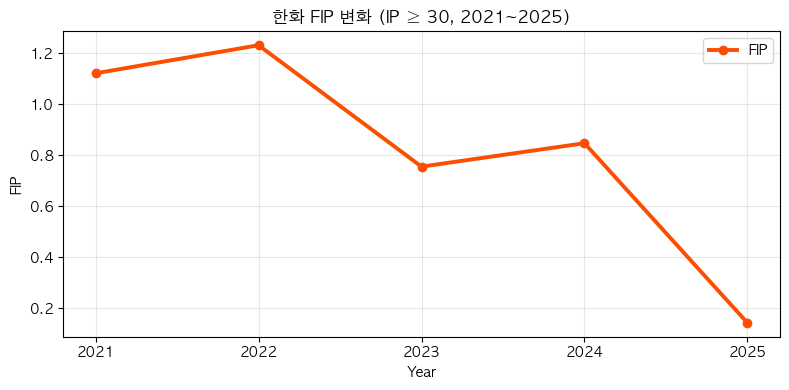

In [103]:
# FIP
plt.figure(figsize=(8,4))
plt.plot(hanwha_pit["year"], hanwha_pit["FIP"],
         marker="o", linewidth=2.8,
         color=TEAM_COLORS["한화"], label="FIP")
plt.title("한화 FIP 변화 (IP ≥ 30, 2021~2025)")
plt.xlabel("Year"); plt.ylabel("FIP")
plt.xticks(hanwha_pit["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("D2_hanwha_FIP")
plt.show()


✅ saved: ../outputs/figures/D3_hanwha_ERA_vs_FIP.png


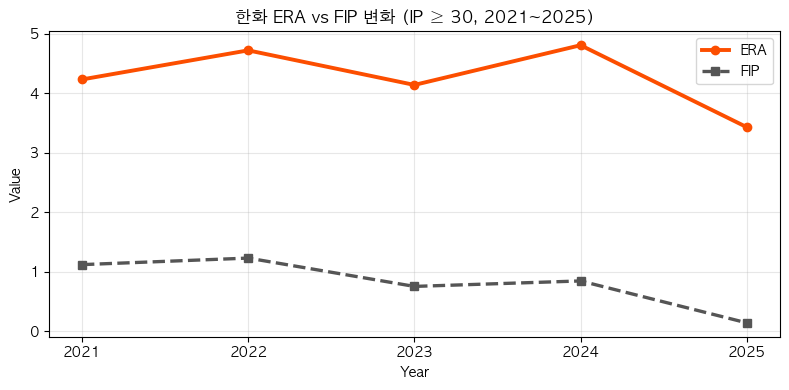

In [104]:
# ERA vs FIP
plt.figure(figsize=(8,4))
plt.plot(hanwha_pit["year"], hanwha_pit["ERA"],
         marker="o", linewidth=2.8,
         color=TEAM_COLORS["한화"], label="ERA")
plt.plot(hanwha_pit["year"], hanwha_pit["FIP"],
         marker="s", linewidth=2.4, linestyle="--",
         color="#555555", label="FIP")
plt.title("한화 ERA vs FIP 변화 (IP ≥ 30, 2021~2025)")
plt.xlabel("Year"); plt.ylabel("Value")
plt.xticks(hanwha_pit["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("D3_hanwha_ERA_vs_FIP")
plt.show()


✅ saved: ../outputs/figures/D4_hanwha_KBBpct.png


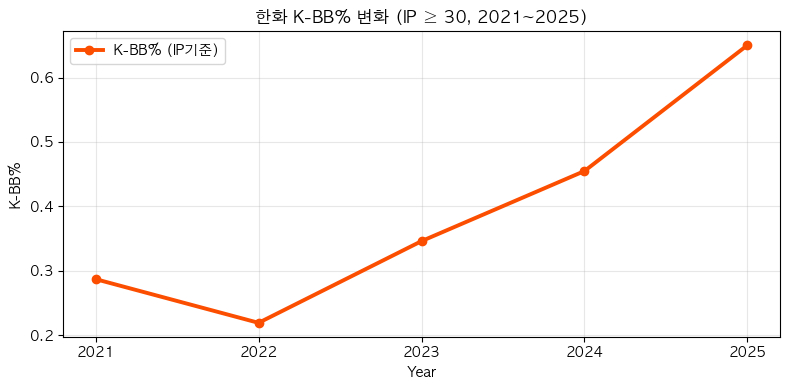

In [105]:
# K-BB% (정의 유지: (SO - (BB+HBP)) / IP)
hanwha_pit["K_BB_pct"] = (hanwha_pit["SO"] - (hanwha_pit["BB"] + hanwha_pit["HBP"])) / hanwha_pit["IP"]

plt.figure(figsize=(8,4))
plt.plot(hanwha_pit["year"], hanwha_pit["K_BB_pct"],
         marker="o", linewidth=2.8,
         color=TEAM_COLORS["한화"], label="K-BB% (IP기준)")
plt.title("한화 K-BB% 변화 (IP ≥ 30, 2021~2025)")
plt.xlabel("Year"); plt.ylabel("K-BB%")
plt.xticks(hanwha_pit["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("D4_hanwha_KBBpct")
plt.show()


✅ saved: ../outputs/figures/D5_hanwha_HR9.png


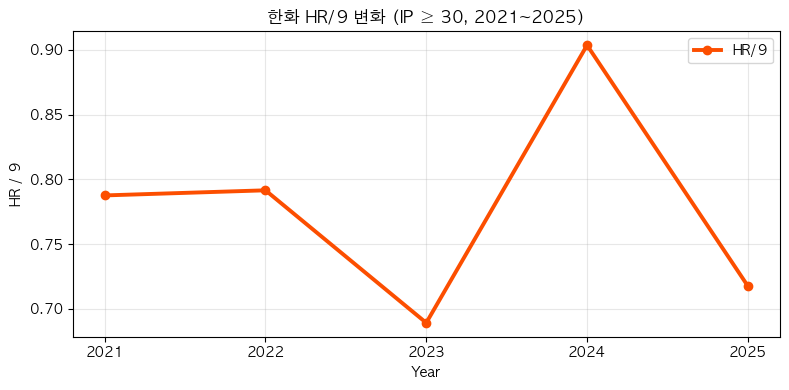

In [106]:
# HR/9
hanwha_pit["HR_per_9"] = hanwha_pit["HR"] * 9 / hanwha_pit["IP"]

plt.figure(figsize=(8,4))
plt.plot(hanwha_pit["year"], hanwha_pit["HR_per_9"],
         marker="o", linewidth=2.8,
         color=TEAM_COLORS["한화"], label="HR/9")
plt.title("한화 HR/9 변화 (IP ≥ 30, 2021~2025)")
plt.xlabel("Year"); plt.ylabel("HR / 9")
plt.xticks(hanwha_pit["year"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
savefig("D5_hanwha_HR9")
plt.show()


✅ saved: ../outputs/figures/E30_sp_avg_innings.png


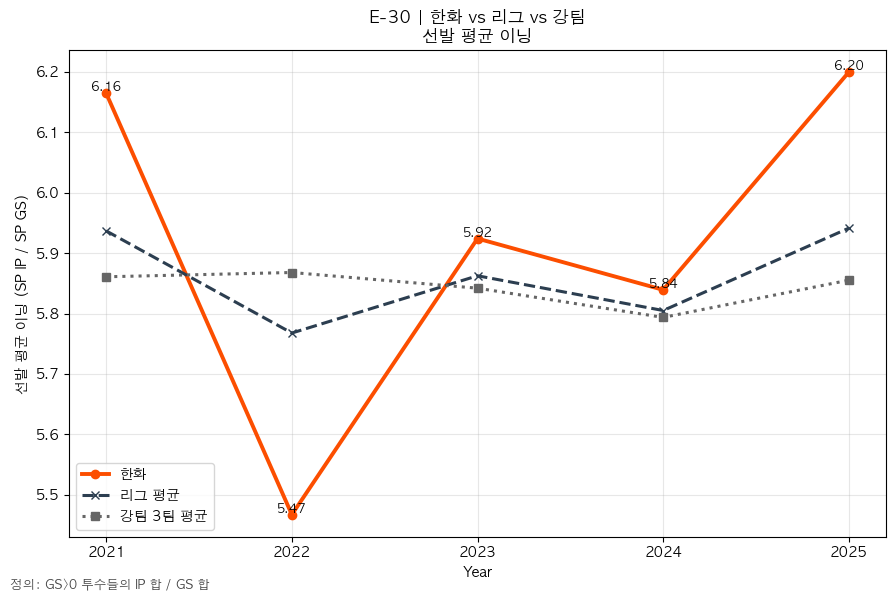

✅ saved: ../outputs/figures/E31_sp_innings_share.png


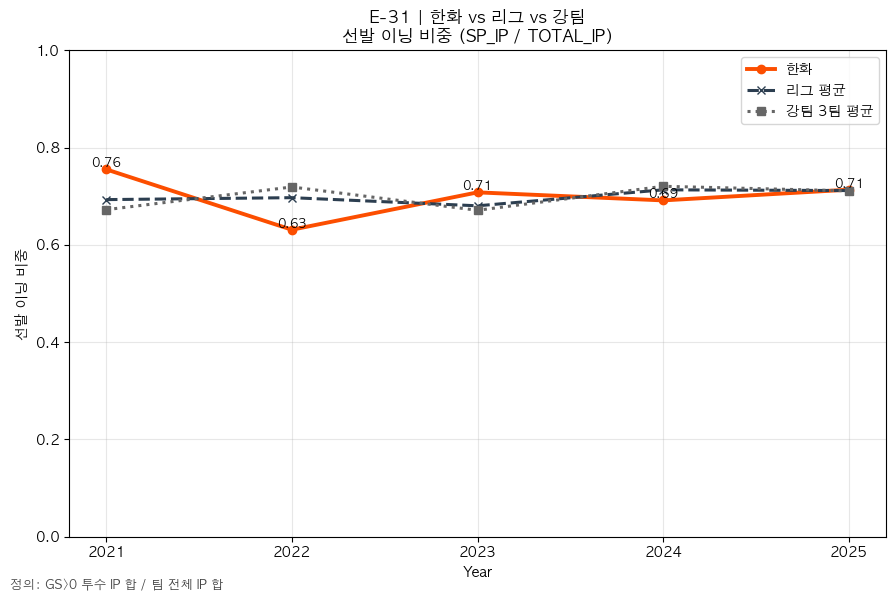

✅ saved: ../outputs/figures/E32_bullpen_apps_per_game.png


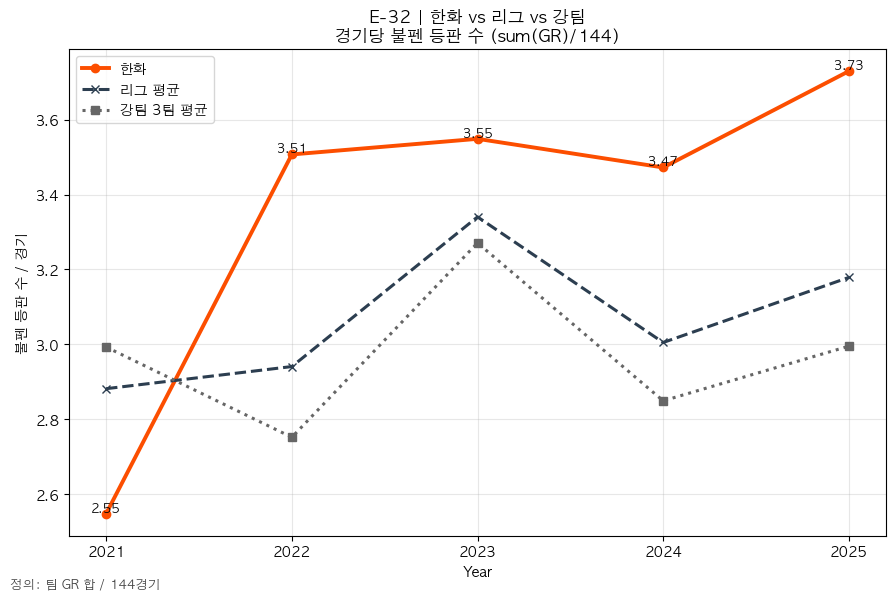

✅ saved: ../outputs/figures/E33_bullpen_top3_share.png


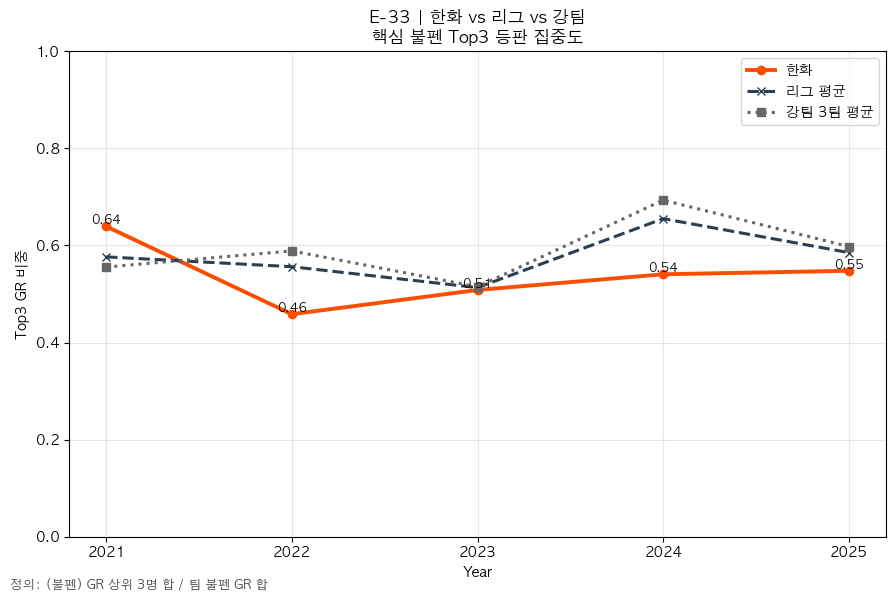

In [107]:
# ============================================================
# E) 운영지표: 선발/불펜 구조 (발표용)
# - 입력: ../data/processed/pitch_analysis_ip30_2021_2025.csv
# - 출력: ../outputs/figures/*.png
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

PATH = "../data/processed/pitch_analysis_ip30_2021_2025.csv"
df = pd.read_csv(PATH)

TARGET_TEAM = "한화"
STRONG_TEAMS = ["LG", "KIA", "SSG"]
YEARS = [2021, 2022, 2023, 2024, 2025]
TEAM_GAMES = {y: 144 for y in YEARS}

HANWHA_SUBCOLOR = "#2C3E50"  # 서브색(짙은 톤)
NEUTRAL = "#666666"

# -----------------------------
# 공통 전처리
# -----------------------------
df = df[df["Year"].isin(YEARS)].copy()
df = df.dropna(subset=["Year", "Team"])
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df[df["Year"].notna()].copy()

# ============================================================
# E-30) 선발 평균 이닝 (가능하면 IP/GS, 없으면 팀 IP/경기수 프록시)
# ============================================================

cols = set(df.columns)
has_gs = "GS" in cols
has_ip = "IP" in cols

if has_ip:
    df["IP"] = pd.to_numeric(df["IP"], errors="coerce")
if has_gs:
    df["GS"] = pd.to_numeric(df["GS"], errors="coerce")

if has_gs and has_ip:
    sp = df[(df["GS"].notna()) & (df["GS"] > 0) & (df["IP"].notna())].copy()

    team_year = (
        sp.groupby(["Year", "Team"], as_index=False)
          .agg(SP_IP=("IP", "sum"), SP_GS=("GS", "sum"))
    )
    team_year["metric"] = team_year["SP_IP"] / team_year["SP_GS"]
    metric_col = "metric"
    y_label = "선발 평균 이닝 (SP IP / SP GS)"
    footnote = "정의: GS>0 투수들의 IP 합 / GS 합"
    title_suffix = "선발 평균 이닝"
else:
    # GS가 없으면 프록시: 팀 총 IP / 경기수(144)
    if not has_ip:
        raise RuntimeError("pitch_analysis 파일에 IP 컬럼이 없어 E-30 계산이 불가해.")
    team_year = (
        df[df["IP"].notna()]
        .groupby(["Year", "Team"], as_index=False)
        .agg(TOTAL_IP=("IP", "sum"))
    )
    team_year["games"] = team_year["Year"].map(TEAM_GAMES)
    team_year["metric"] = team_year["TOTAL_IP"] / team_year["games"]
    metric_col = "metric"
    y_label = "경기당 평균 투구 이닝 (팀 IP / 경기수)"
    footnote = "정의(프록시): 팀 총 IP / 144경기"
    title_suffix = "선발 평균 이닝(프록시)"

hanwha = (
    team_year[team_year["Team"] == TARGET_TEAM]
    .set_index("Year")[[metric_col]]
    .rename(columns={metric_col: "Hanwha"})
)

league_avg = (
    team_year.groupby("Year")[metric_col].mean()
    .to_frame("League_Avg")
)

strong_avg = (
    team_year[team_year["Team"].isin(STRONG_TEAMS)]
    .groupby("Year")[metric_col].mean()
    .to_frame("Strong3_Avg")
)

compare_df = hanwha.join(league_avg).join(strong_avg)

plt.figure(figsize=(9, 6))
plt.plot(compare_df.index, compare_df["Hanwha"],
         marker="o", linewidth=2.8, label="한화",
         color=TEAM_COLORS["한화"])
plt.plot(compare_df.index, compare_df["League_Avg"],
         marker="x", linestyle="--", linewidth=2.2, label="리그 평균",
         color=HANWHA_SUBCOLOR)
plt.plot(compare_df.index, compare_df["Strong3_Avg"],
         marker="s", linestyle=":", linewidth=2.2, label="강팀 3팀 평균",
         color=NEUTRAL)

for y in compare_df.index:
    plt.text(y, compare_df.loc[y, "Hanwha"], f"{compare_df.loc[y, 'Hanwha']:.2f}",
             ha="center", va="bottom", fontsize=9)

plt.title(f"E-30 | 한화 vs 리그 vs 강팀\n{title_suffix}")
plt.xlabel("Year")
plt.ylabel(y_label)
plt.xticks(compare_df.index)
plt.grid(alpha=0.3)
plt.legend()
plt.figtext(0.01, 0.01, footnote, ha="left", fontsize=9, color="#444444")
plt.tight_layout()
savefig("E30_sp_avg_innings")
plt.show()

# ============================================================
# E-31) 선발 이닝 비중 (SP_IP / TOTAL_IP)
# - GS/IP 둘 다 있어야 계산 가능
# ============================================================

cols = set(df.columns)
has_gs = "GS" in cols
has_ip = "IP" in cols

if not (has_gs and has_ip):
    print("⚠️ E-31 스킵: pitch_analysis 파일에 GS 또는 IP 컬럼이 없어 선발 이닝 비중 계산 불가")
else:
    _df = df.copy()
    _df["GS"] = pd.to_numeric(_df["GS"], errors="coerce")
    _df["IP"] = pd.to_numeric(_df["IP"], errors="coerce")

    team_year_total = (
        _df[_df["IP"].notna()]
        .groupby(["Year", "Team"], as_index=False)
        .agg(TOTAL_IP=("IP", "sum"))
    )

    sp = _df[(_df["GS"].notna()) & (_df["GS"] > 0) & (_df["IP"].notna())].copy()
    team_year_sp = (
        sp.groupby(["Year", "Team"], as_index=False)
          .agg(SP_IP=("IP", "sum"))
    )

    team_year2 = team_year_total.merge(team_year_sp, on=["Year", "Team"], how="left")
    team_year2["SP_IP"] = team_year2["SP_IP"].fillna(0)
    team_year2["SP_share"] = team_year2["SP_IP"] / team_year2["TOTAL_IP"]

    hanwha2 = (
        team_year2[team_year2["Team"] == TARGET_TEAM]
        .set_index("Year")[["SP_share"]]
        .rename(columns={"SP_share": "Hanwha"})
    )
    league_avg2 = (
        team_year2.groupby("Year")["SP_share"].mean()
        .to_frame("League_Avg")
    )
    strong_avg2 = (
        team_year2[team_year2["Team"].isin(STRONG_TEAMS)]
        .groupby("Year")["SP_share"].mean()
        .to_frame("Strong3_Avg")
    )

    compare_df2 = hanwha2.join(league_avg2).join(strong_avg2)

    plt.figure(figsize=(9, 6))
    plt.plot(compare_df2.index, compare_df2["Hanwha"],
             marker="o", linewidth=2.8, label="한화",
             color=TEAM_COLORS["한화"])
    plt.plot(compare_df2.index, compare_df2["League_Avg"],
             marker="x", linestyle="--", linewidth=2.2, label="리그 평균",
             color=HANWHA_SUBCOLOR)
    plt.plot(compare_df2.index, compare_df2["Strong3_Avg"],
             marker="s", linestyle=":", linewidth=2.2, label="강팀 3팀 평균",
             color=NEUTRAL)

    for y in compare_df2.index:
        plt.text(y, compare_df2.loc[y, "Hanwha"], f"{compare_df2.loc[y, 'Hanwha']:.2f}",
                 ha="center", va="bottom", fontsize=9)

    plt.title("E-31 | 한화 vs 리그 vs 강팀\n선발 이닝 비중 (SP_IP / TOTAL_IP)")
    plt.xlabel("Year")
    plt.ylabel("선발 이닝 비중")
    plt.xticks(compare_df2.index)
    plt.ylim(0, 1)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.figtext(0.01, 0.01, "정의: GS>0 투수 IP 합 / 팀 전체 IP 합", ha="left", fontsize=9, color="#444444")
    plt.tight_layout()
    savefig("E31_sp_innings_share")
    plt.show()

# ============================================================
# E-32) 경기당 불펜 등판 수 (bp_per_game = sum(GR)/144)
# ============================================================

if "GR" not in df.columns:
    print("⚠️ E-32 스킵: pitch_analysis 파일에 GR 컬럼이 없어 불펜 등판 수 계산 불가")
else:
    _df = df.dropna(subset=["GR"]).copy()
    _df["GR"] = pd.to_numeric(_df["GR"], errors="coerce")
    _df = _df[_df["GR"].notna() & (_df["GR"] >= 0)].copy()

    team_year3 = (
        _df.groupby(["Year", "Team"], as_index=False)
           .agg(bullpen_appearances=("GR", "sum"))
    )
    team_year3["games"] = team_year3["Year"].map(TEAM_GAMES)
    team_year3["bp_per_game"] = team_year3["bullpen_appearances"] / team_year3["games"]

    hanwha3 = (
        team_year3[team_year3["Team"] == TARGET_TEAM]
        .set_index("Year")[["bp_per_game"]]
        .rename(columns={"bp_per_game": "Hanwha"})
    )
    league_avg3 = (
        team_year3.groupby("Year")["bp_per_game"].mean()
        .to_frame("League_Avg")
    )
    strong_avg3 = (
        team_year3[team_year3["Team"].isin(STRONG_TEAMS)]
        .groupby("Year")["bp_per_game"].mean()
        .to_frame("Strong3_Avg")
    )

    compare_df3 = hanwha3.join(league_avg3).join(strong_avg3)

    plt.figure(figsize=(9, 6))
    plt.plot(compare_df3.index, compare_df3["Hanwha"],
             marker="o", linewidth=2.8, color=TEAM_COLORS["한화"], label="한화")
    plt.plot(compare_df3.index, compare_df3["League_Avg"],
             marker="x", linestyle="--", linewidth=2.2, color=HANWHA_SUBCOLOR, label="리그 평균")
    plt.plot(compare_df3.index, compare_df3["Strong3_Avg"],
             marker="s", linestyle=":", linewidth=2.2, color=NEUTRAL, label="강팀 3팀 평균")

    for y in compare_df3.index:
        plt.text(y, compare_df3.loc[y, "Hanwha"], f"{compare_df3.loc[y, 'Hanwha']:.2f}",
                 ha="center", va="bottom", fontsize=9)

    plt.title("E-32 | 한화 vs 리그 vs 강팀\n경기당 불펜 등판 수 (sum(GR)/144)")
    plt.xlabel("Year")
    plt.ylabel("불펜 등판 수 / 경기")
    plt.xticks(compare_df3.index)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.figtext(0.01, 0.01, "정의: 팀 GR 합 / 144경기", ha="left", fontsize=9, color="#444444")
    plt.tight_layout()
    savefig("E32_bullpen_apps_per_game")
    plt.show()

# ============================================================
# E-33) 핵심 불펜 Top3 등판 집중도
# - 불펜만 보려면 GS==0 필터 가능(있으면 적용)
# ============================================================

if "GR" not in df.columns:
    print("⚠️ E-33 스킵: pitch_analysis 파일에 GR 컬럼이 없어 집중도 계산 불가")
else:
    _df = df.dropna(subset=["GR"]).copy()
    _df["GR"] = pd.to_numeric(_df["GR"], errors="coerce")
    _df = _df[_df["GR"].notna() & (_df["GR"] >= 0)].copy()

    # 선발 제외(가능하면)
    if "GS" in _df.columns:
        _df["GS"] = pd.to_numeric(_df["GS"], errors="coerce")
        _df = _df[_df["GS"].fillna(0) == 0].copy()

    records = []
    for (year, team), g in _df.groupby(["Year", "Team"]):
        total_gr = g["GR"].sum()
        if total_gr <= 0:
            continue
        top3_gr = g.sort_values("GR", ascending=False).head(3)["GR"].sum()
        records.append({"Year": year, "Team": team, "Top3_Share": top3_gr / total_gr})

    focus_df = pd.DataFrame(records)

    hanwha4 = (
        focus_df[focus_df["Team"] == TARGET_TEAM]
        .set_index("Year")[["Top3_Share"]]
        .rename(columns={"Top3_Share": "Hanwha"})
    )
    league_avg4 = (
        focus_df.groupby("Year")["Top3_Share"].mean()
        .to_frame("League_Avg")
    )
    strong_avg4 = (
        focus_df[focus_df["Team"].isin(STRONG_TEAMS)]
        .groupby("Year")["Top3_Share"].mean()
        .to_frame("Strong3_Avg")
    )

    compare_df4 = hanwha4.join(league_avg4).join(strong_avg4)

    plt.figure(figsize=(9, 6))
    plt.plot(compare_df4.index, compare_df4["Hanwha"],
             marker="o", linewidth=2.8, color=TEAM_COLORS["한화"], label="한화")
    plt.plot(compare_df4.index, compare_df4["League_Avg"],
             marker="x", linestyle="--", linewidth=2.2, color=HANWHA_SUBCOLOR, label="리그 평균")
    plt.plot(compare_df4.index, compare_df4["Strong3_Avg"],
             marker="s", linestyle=":", linewidth=2.2, color=NEUTRAL, label="강팀 3팀 평균")

    for y in compare_df4.index:
        plt.text(y, compare_df4.loc[y, "Hanwha"], f"{compare_df4.loc[y, 'Hanwha']:.2f}",
                 ha="center", va="bottom", fontsize=9)

    plt.title("E-33 | 한화 vs 리그 vs 강팀\n핵심 불펜 Top3 등판 집중도")
    plt.xlabel("Year")
    plt.ylabel("Top3 GR 비중")
    plt.xticks(compare_df4.index)
    plt.ylim(0, 1)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.figtext(0.01, 0.01, "정의: (불펜) GR 상위 3명 합 / 팀 불펜 GR 합", ha="left", fontsize=9, color="#444444")
    plt.tight_layout()
    savefig("E33_bullpen_top3_share")
    plt.show()


---
### 08_team_validation.ipynb
목적:
 1) 2025 팀 ERA/FIP 계산 방식 통일 검증 (합산/가중 vs 단순평균)
 2) 불펜 사용량 지표 정의 통일 (GR/144)

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [110]:
# -------------------------------
# 0) Load
# -------------------------------
PATH = "../data/processed/pitch_analysis_ip30_all_2021_2025.csv"
df = pd.read_csv(PATH)

YEAR = 2025
TEAM_GAMES = 144  # ✅ 정규시즌 고정(검증 기준)

# -------------------------------
# 1) 2025 필터 + 필수 컬럼 정리
# -------------------------------
need_cols = ["Year","Team","IP","ER","FIP","ERA","G","GS","GR","R","Id"]
for c in need_cols:
    if c not in df.columns:
        # 없는 컬럼은 그냥 넘어가되, 뒤에서 사용 시 조건처리
        pass

df_2025 = df[df["Year"] == YEAR].copy()

# 필수: 팀 ERA/FIP 검증에 치명적인 결측 제거
df_2025 = df_2025.dropna(subset=["Team","IP","ER","FIP"])
df_2025["IP"]  = pd.to_numeric(df_2025["IP"], errors="coerce")
df_2025["ER"]  = pd.to_numeric(df_2025["ER"], errors="coerce")
df_2025["FIP"] = pd.to_numeric(df_2025["FIP"], errors="coerce")
df_2025 = df_2025.dropna(subset=["IP","ER","FIP"])
df_2025 = df_2025[df_2025["IP"] > 0].copy()

print("Teams(2025):", sorted(df_2025["Team"].unique()))
print("N teams:", df_2025["Team"].nunique(), "| rows:", len(df_2025))


Teams(2025): ['KIA', 'KT', 'LG', 'NC', 'SSG', '두산', '롯데', '삼성', '키움', '한화']
N teams: 10 | rows: 137



[A] 2025 팀 ERA/FIP (통일 기준: 합산/가중) + 단순평균 비교
Team  IP_sum  ER_sum  ERA_team_calc  FIP_team_wavg  FIP_player_mean  n_pitchers
  한화  1216.5     464       3.432799       3.507041         3.836429          14
 SSG  1176.5     459       3.511262       3.873896         4.075714          14
  LG  1113.8     438       3.539235       3.818965         4.025714          14
  KT  1125.5     476       3.806308       3.883075         4.030000          13
  삼성  1139.6     501       3.956651       4.257820         4.268571          14
  두산  1049.3     470       4.031259       4.244571         4.308333          12
 KIA  1092.0     520       4.285714       4.116965         4.432143          14
  롯데  1064.5     532       4.497886       4.159850         4.218571          14
  NC  1064.7     535       4.522401       4.644770         4.907692          13
  키움  1067.3     588       4.958306       4.823150         4.944667          15


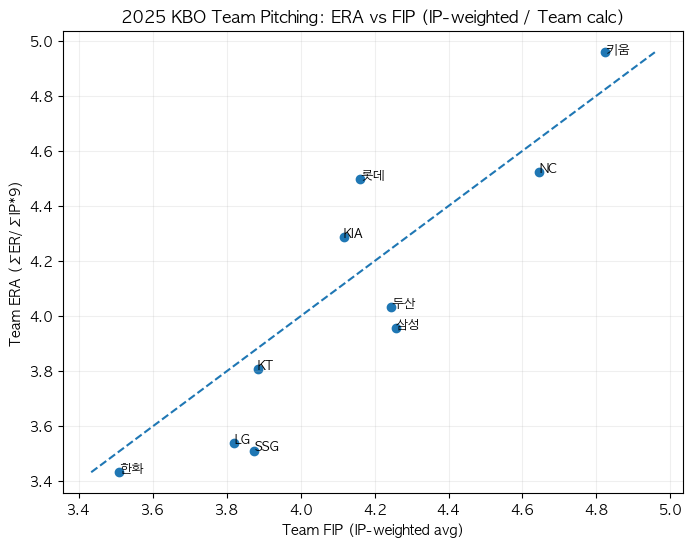


[A-보조] FIP 평균 방식 차이 (단순평균 - IP가중평균)
Team  FIP_player_mean  FIP_team_wavg  FIP_gap_mean_minus_wavg
  한화         3.836429       3.507041                 0.329388
 KIA         4.432143       4.116965                 0.315178
  NC         4.907692       4.644770                 0.262922
  LG         4.025714       3.818965                 0.206749
 SSG         4.075714       3.873896                 0.201818
  KT         4.030000       3.883075                 0.146925
  키움         4.944667       4.823150                 0.121517
  두산         4.308333       4.244571                 0.063763
  롯데         4.218571       4.159850                 0.058722
  삼성         4.268571       4.257820                 0.010751


In [111]:
# ============================================================
# A) 팀 ERA / 팀 FIP (통일 기준: 합산/가중)
# ============================================================
team_calc = (
    df_2025
    .assign(FIP_weighted=df_2025["FIP"] * df_2025["IP"])
    .groupby("Team", as_index=False)
    .agg(
        IP_sum=("IP","sum"),
        ER_sum=("ER","sum"),
        FIP_w_sum=("FIP_weighted","sum"),
        # 비교용(팀원 방식): 단순 평균도 같이 계산
        ERA_player_mean=("ERA","mean") if "ERA" in df_2025.columns else ("IP","count"),
        FIP_player_mean=("FIP","mean"),
        n_pitchers=("Id","count") if "Id" in df_2025.columns else ("IP","count"),
    )
)

team_calc["ERA_team_calc"] = team_calc["ER_sum"] / team_calc["IP_sum"] * 9
team_calc["FIP_team_wavg"] = team_calc["FIP_w_sum"] / team_calc["IP_sum"]

team_calc = team_calc.sort_values("ERA_team_calc").reset_index(drop=True)

show_cols = ["Team","IP_sum","ER_sum","ERA_team_calc","FIP_team_wavg","FIP_player_mean","n_pitchers"]
print("\n[A] 2025 팀 ERA/FIP (통일 기준: 합산/가중) + 단순평균 비교")
print(team_calc[show_cols].to_string(index=False))

# ---- 그래프: ERA vs FIP (통일 기준)
plt.figure(figsize=(8,6))
plt.scatter(team_calc["FIP_team_wavg"], team_calc["ERA_team_calc"])
for _, r in team_calc.iterrows():
    plt.text(r["FIP_team_wavg"], r["ERA_team_calc"], r["Team"], fontsize=9)

min_v = min(team_calc["FIP_team_wavg"].min(), team_calc["ERA_team_calc"].min())
max_v = max(team_calc["FIP_team_wavg"].max(), team_calc["ERA_team_calc"].max())
plt.plot([min_v, max_v], [min_v, max_v], linestyle="--")

plt.title("2025 KBO Team Pitching: ERA vs FIP (IP-weighted / Team calc)")
plt.xlabel("Team FIP (IP-weighted avg)")
plt.ylabel("Team ERA (ΣER/ΣIP*9)")
plt.grid(alpha=0.2)
plt.show()

# ---- 왜 달랐는지: 단순평균 - 가중평균 차이
team_calc["FIP_gap_mean_minus_wavg"] = team_calc["FIP_player_mean"] - team_calc["FIP_team_wavg"]
print("\n[A-보조] FIP 평균 방식 차이 (단순평균 - IP가중평균)")
print(team_calc[["Team","FIP_player_mean","FIP_team_wavg","FIP_gap_mean_minus_wavg"]].sort_values("FIP_gap_mean_minus_wavg", ascending=False).to_string(index=False))



[B] 2025 경기당 불펜 등판 수 (정의: ΣGR / 144)
Team  GR_sum  bp_per_game
  한화     537     3.729167
 SSG     484     3.361111
  NC     437     3.034722
  삼성     422     2.930556
 KIA     409     2.840278
  LG     401     2.784722
  롯데     383     2.659722
  KT     376     2.611111
  두산     355     2.465278
  키움     353     2.451389


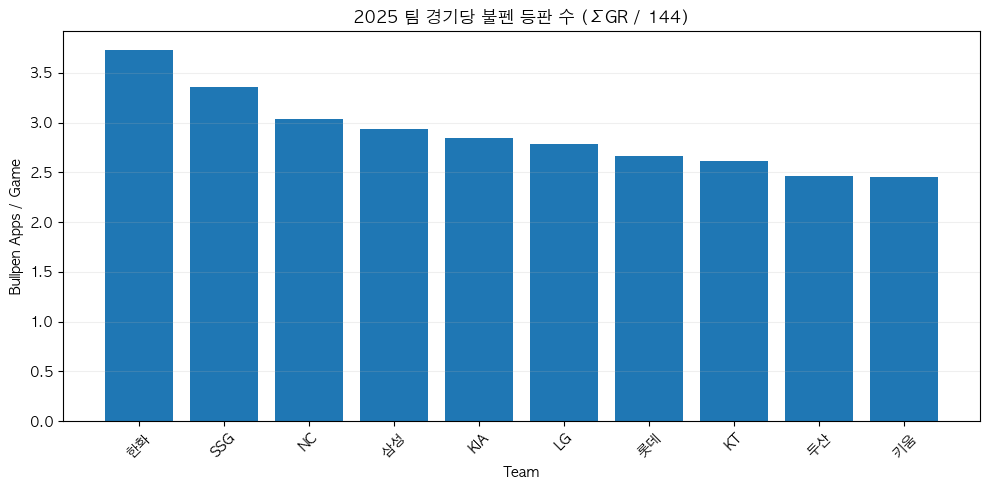

In [113]:
# ============================================================
# B) 불펜 사용량 지표 통일: GR 기반 (가능하면)
# ============================================================
if "GR" not in df_2025.columns:
    print("\n[B] ⚠️ GR 컬럼이 없어 불펜 등판 수(구원등판) 기반 지표를 만들 수 없음.")
else:
    bp = df_2025.dropna(subset=["GR"]).copy()
    bp["GR"] = pd.to_numeric(bp["GR"], errors="coerce")
    bp = bp.dropna(subset=["GR"])
    bp = bp[bp["GR"] >= 0].copy()

    team_bp = (
        bp.groupby("Team", as_index=False)
          .agg(GR_sum=("GR","sum"))
    )
    team_bp["bp_per_game"] = team_bp["GR_sum"] / TEAM_GAMES
    team_bp = team_bp.sort_values("bp_per_game", ascending=False).reset_index(drop=True)

    print("\n[B] 2025 경기당 불펜 등판 수 (정의: ΣGR / 144)")
    print(team_bp.to_string(index=False))

    plt.figure(figsize=(10,5))
    plt.bar(team_bp["Team"], team_bp["bp_per_game"])
    plt.title("2025 팀 경기당 불펜 등판 수 (ΣGR / 144)")
    plt.xlabel("Team"); plt.ylabel("Bullpen Apps / Game")
    plt.xticks(rotation=45)
    plt.grid(axis="y", alpha=0.2)
    plt.tight_layout()
    plt.show()

In [114]:
# ============================================================
# C) (참고용) 불펜 정의를 바꿨을 때 결과가 어떻게 흔들리는지
# - 메인 지표는 GR/144로 고정하고, 이건 '왜 값이 달랐나' 참고용
# ============================================================
if ("G" in df_2025.columns) and ("GS" in df_2025.columns):
    tmp = df_2025.dropna(subset=["G","GS"]).copy()
    tmp["G"]  = pd.to_numeric(tmp["G"], errors="coerce")
    tmp["GS"] = pd.to_numeric(tmp["GS"], errors="coerce")
    tmp = tmp.dropna(subset=["G","GS"])
    tmp = tmp[tmp["G"] > 0].copy()

    tmp["BP_G"] = tmp["G"] - tmp["GS"]

    # 불펜 위주 투수: BP_G > GS
    bp_major = tmp[tmp["BP_G"] > tmp["GS"]].copy()

    team_bp_major = (
        bp_major.groupby("Team", as_index=False)
                .agg(BP_G_sum=("BP_G","sum"))
    )
    team_bp_major["bp_per_game_est"] = team_bp_major["BP_G_sum"] / TEAM_GAMES
    team_bp_major = team_bp_major.sort_values("bp_per_game_est", ascending=False).reset_index(drop=True)

    print("\n[C-참고] 불펜 위주 투수 기준(BP_G>GS)으로 계산한 경기당 불펜 등판(추정)")
    print(team_bp_major.to_string(index=False))
else:
    print("\n[C] (참고) G/GS 컬럼이 부족해서 BP_G 기반 추정은 생략")


[C-참고] 불펜 위주 투수 기준(BP_G>GS)으로 계산한 경기당 불펜 등판(추정)
Team  BP_G_sum  bp_per_game_est
  한화       513         3.562500
 SSG       482         3.347222
  NC       430         2.986111
  삼성       417         2.895833
 KIA       409         2.840278
  LG       397         2.756944
  롯데       373         2.590278
  KT       363         2.520833
  두산       352         2.444444
  키움       352         2.444444
